In [2]:
#Crear la conección a Google Drive e importar la base de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [4]:
#Cargar la base de datos
imor = pd.read_excel("/content/drive/MyDrive/PROYECTO DE GRADO ELIANA - THOMY/BASE DE DATOS/base_datos_extendida.xlsx")
imor.head(10)

year         mes trimestre  var_pib_real  tasa_activa  tasa_pasiva  \
0  2007  Septiembre        T3      0.016396       0.1082       0.0561   
1  2007   Diciembre        T4      0.009231       0.1072       0.0564   
2  2008       Marzo        T1      0.026183       0.1043       0.0596   
3  2008       Junio        T2      0.013584       0.0959       0.0545   
4  2008  Septiembre        T3      0.016696       0.0931       0.0529   
5  2008   Diciembre        T4      0.010568       0.0914       0.0509   
6  2009       Marzo        T1     -0.001766       0.0924       0.0531   
7  2009       Junio        T2     -0.004575       0.0924       0.0563   
8  2009  Septiembre        T3     -0.004908       0.0915       0.0557   
9  2009   Diciembre        T4     -0.003637       0.0919       0.0524   

   desempleo  deuda_publica/pib  inflacion  liquidez_monetaria  \
0   0.070583             0.2948   0.012043        13120.844642   
1   0.060655             0.3049   0.012079        14318.343231   
2   0.068631             0.2180   0.036078        14586.299642   
3   0.063887             0.2120   0.033599        15440.572330   
4   0.070551             0.2100   0.014619        16239.899157   
5   0.073098             0.2220   0.001630        17461.111217   
6   0.085821             0.2270   0.022810        16450.974232   
7   0.083447             0.1600   0.005692        16642.075088   
8   0.090642             0.1680   0.002531        16871.393032   
9   0.078928             0.1640   0.011521        18988.978915   

   reservas_encaje  reservas_internacionales  balanza_comercial    imor  \
0       535.810000               3611.123821         421.406568  0.0168   
1       692.240000               3520.839814         -50.212382  0.0138   
2       671.149702               4143.540000         207.322440  0.0207   
3       724.400052               6103.122911         292.131890  0.0165   
4       634.303994               6511.445580        -218.685900  0.0181   
5      1239.022475               4472.809601        -555.294560  0.0163   
6       552.711737               3244.072594        -133.553894  0.0264   
7       746.288704               2675.015536         121.484485  0.0319   
8       806.450341               4624.709272         -46.804102  0.0359   
9      1702.566804               3792.050944          21.782750  0.0284   

      roe     roa  
0  0.0305  0.3237  
1  0.0209  0.2901  
2  0.0276  0.2935  
3  0.0217  0.2427  
4  0.0218  0.2516  
5  0.0140  0.1864  
6  0.0204  0.2146  
7  0.0169  0.1773  
8  0.0147  0.1567  
9  0.0121  0.1482

Las variables ROA y ROE no son relevantes para el estudio. Se procede a eliminarlas del Data_Set.

In [5]:
#Filtrar la base de datos (excluir al ROE y al ROA)
imor_filtrada = imor[[
    'year',
    'mes',
    'trimestre',
    'var_pib_real',
    'tasa_activa',
    'tasa_pasiva',
    'desempleo',
    'deuda_publica/pib',
    'inflacion',
    'liquidez_monetaria',
    'reservas_encaje',
    'reservas_internacionales',
    'balanza_comercial',
    'imor'
]].copy()

#Mostrar las 10 primeras filas.
imor_filtrada.head(10)

year         mes trimestre  var_pib_real  tasa_activa  tasa_pasiva  \
0  2007  Septiembre        T3      0.016396       0.1082       0.0561   
1  2007   Diciembre        T4      0.009231       0.1072       0.0564   
2  2008       Marzo        T1      0.026183       0.1043       0.0596   
3  2008       Junio        T2      0.013584       0.0959       0.0545   
4  2008  Septiembre        T3      0.016696       0.0931       0.0529   
5  2008   Diciembre        T4      0.010568       0.0914       0.0509   
6  2009       Marzo        T1     -0.001766       0.0924       0.0531   
7  2009       Junio        T2     -0.004575       0.0924       0.0563   
8  2009  Septiembre        T3     -0.004908       0.0915       0.0557   
9  2009   Diciembre        T4     -0.003637       0.0919       0.0524   

   desempleo  deuda_publica/pib  inflacion  liquidez_monetaria  \
0   0.070583             0.2948   0.012043        13120.844642   
1   0.060655             0.3049   0.012079        14318.343231   
2   0.068631             0.2180   0.036078        14586.299642   
3   0.063887             0.2120   0.033599        15440.572330   
4   0.070551             0.2100   0.014619        16239.899157   
5   0.073098             0.2220   0.001630        17461.111217   
6   0.085821             0.2270   0.022810        16450.974232   
7   0.083447             0.1600   0.005692        16642.075088   
8   0.090642             0.1680   0.002531        16871.393032   
9   0.078928             0.1640   0.011521        18988.978915   

   reservas_encaje  reservas_internacionales  balanza_comercial    imor  
0       535.810000               3611.123821         421.406568  0.0168  
1       692.240000               3520.839814         -50.212382  0.0138  
2       671.149702               4143.540000         207.322440  0.0207  
3       724.400052               6103.122911         292.131890  0.0165  
4       634.303994               6511.445580        -218.685900  0.0181  
5      1239.022475               4472.809601        -555.294560  0.0163  
6       552.711737               3244.072594        -133.553894  0.0264  
7       746.288704               2675.015536         121.484485  0.0319  
8       806.450341               4624.709272         -46.804102  0.0359  
9      1702.566804               3792.050944          21.782750  0.0284

Verificar tipo de datos, formatos y unidades de medida.

In [6]:
#Mostrar la información de la tabla filtrada
imor_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      70 non-null     int64  
 1   mes                       70 non-null     object 
 2   trimestre                 70 non-null     object 
 3   var_pib_real              69 non-null     float64
 4   tasa_activa               70 non-null     float64
 5   tasa_pasiva               70 non-null     float64
 6   desempleo                 69 non-null     float64
 7   deuda_publica/pib         70 non-null     float64
 8   inflacion                 70 non-null     float64
 9   liquidez_monetaria        70 non-null     float64
 10  reservas_encaje           70 non-null     float64
 11  reservas_internacionales  70 non-null     float64
 12  balanza_comercial         70 non-null     float64
 13  imor                      70 non-null     float64
dtypes: float64(1

La variable "year" es de tipo "int64", se procede a cambiar a tipo "object".

In [7]:
#Convertir year en formato "object"
imor_filtrada['year'] = imor_filtrada['year'].astype(str)

#Mostrar la información de la tabla filtrada.
imor_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      70 non-null     object 
 1   mes                       70 non-null     object 
 2   trimestre                 70 non-null     object 
 3   var_pib_real              69 non-null     float64
 4   tasa_activa               70 non-null     float64
 5   tasa_pasiva               70 non-null     float64
 6   desempleo                 69 non-null     float64
 7   deuda_publica/pib         70 non-null     float64
 8   inflacion                 70 non-null     float64
 9   liquidez_monetaria        70 non-null     float64
 10  reservas_encaje           70 non-null     float64
 11  reservas_internacionales  70 non-null     float64
 12  balanza_comercial         70 non-null     float64
 13  imor                      70 non-null     float64
dtypes: float64(1

Lo siguiente es calcular las estadísticas básicas de la base de datos imor_filtrada. Hasta este punto se hicieron los siguientes cambios:

- Eliminar las variables ROE y ROA
- Cambiar el tipo de dato de la variable "year" de "int64 a "object" para que se considerada como categórica.

In [8]:
# Describe transpuesto: filas = variables, columnas = estadísticos
descripcion_transpuesta = imor_filtrada.describe().transpose()

# Mostrar resultado
descripcion_transpuesta

count          mean           std           min  \
var_pib_real               69.0      0.007347      0.026267     -0.157266   
tasa_activa                70.0      0.086911      0.009506      0.071100   
tasa_pasiva                70.0      0.055310      0.009572      0.042500   
desempleo                  69.0      0.061520      0.017617      0.045416   
deuda_publica/pib          70.0      0.343615      0.132242      0.151000   
inflacion                  70.0      0.006477      0.008750     -0.014743   
liquidez_monetaria         70.0  44685.837703  21460.118392  13120.844642   
reservas_encaje            70.0   3870.482131   2186.751344    535.810000   
reservas_internacionales   70.0   4657.070175   1799.264031   1990.168458   
balanza_comercial          70.0     92.364558    251.892839   -602.767507   
imor                       70.0      0.035801      0.015811      0.013800   

                                   25%           50%           75%  \
var_pib_real                 -0.003400      0.009513      0.019418   
tasa_activa                   0.081700      0.085750      0.091150   
tasa_pasiva                   0.048750      0.054400      0.059450   
desempleo                     0.050252      0.056468      0.068631   
deuda_publica/pib             0.213500      0.352500      0.450750   
inflacion                     0.001195      0.005158      0.011913   
liquidez_monetaria        26804.442439  40863.216807  60218.233266   
reservas_encaje            1831.190556   3895.346810   5584.126306   
reservas_internacionales   3460.127782   4123.539737   5811.607165   
balanza_comercial           -74.992031     76.860191    239.661244   
imor                          0.024975      0.032600      0.040906   

                                   max  
var_pib_real                  0.083463  
tasa_activa                   0.116800  
tasa_pasiva                   0.084400  
desempleo                     0.168221  
deuda_publica/pib             0.585900  
inflacion                     0.036078  
liquidez_monetaria        88484.867770  
reservas_encaje            8620.400470  
reservas_internacionales   9226.323648  
balanza_comercial           738.756452  
imor                          0.079200

A continuación, se realiza un gráfico que muestra cómo cada una de las variables ha evolucionado a lo largo del tiempo, adicionalmente, se muestran las estadísticas básicas para cada variable.

Ahora, se calculan las estadísticas básicas para las variables categóricas.

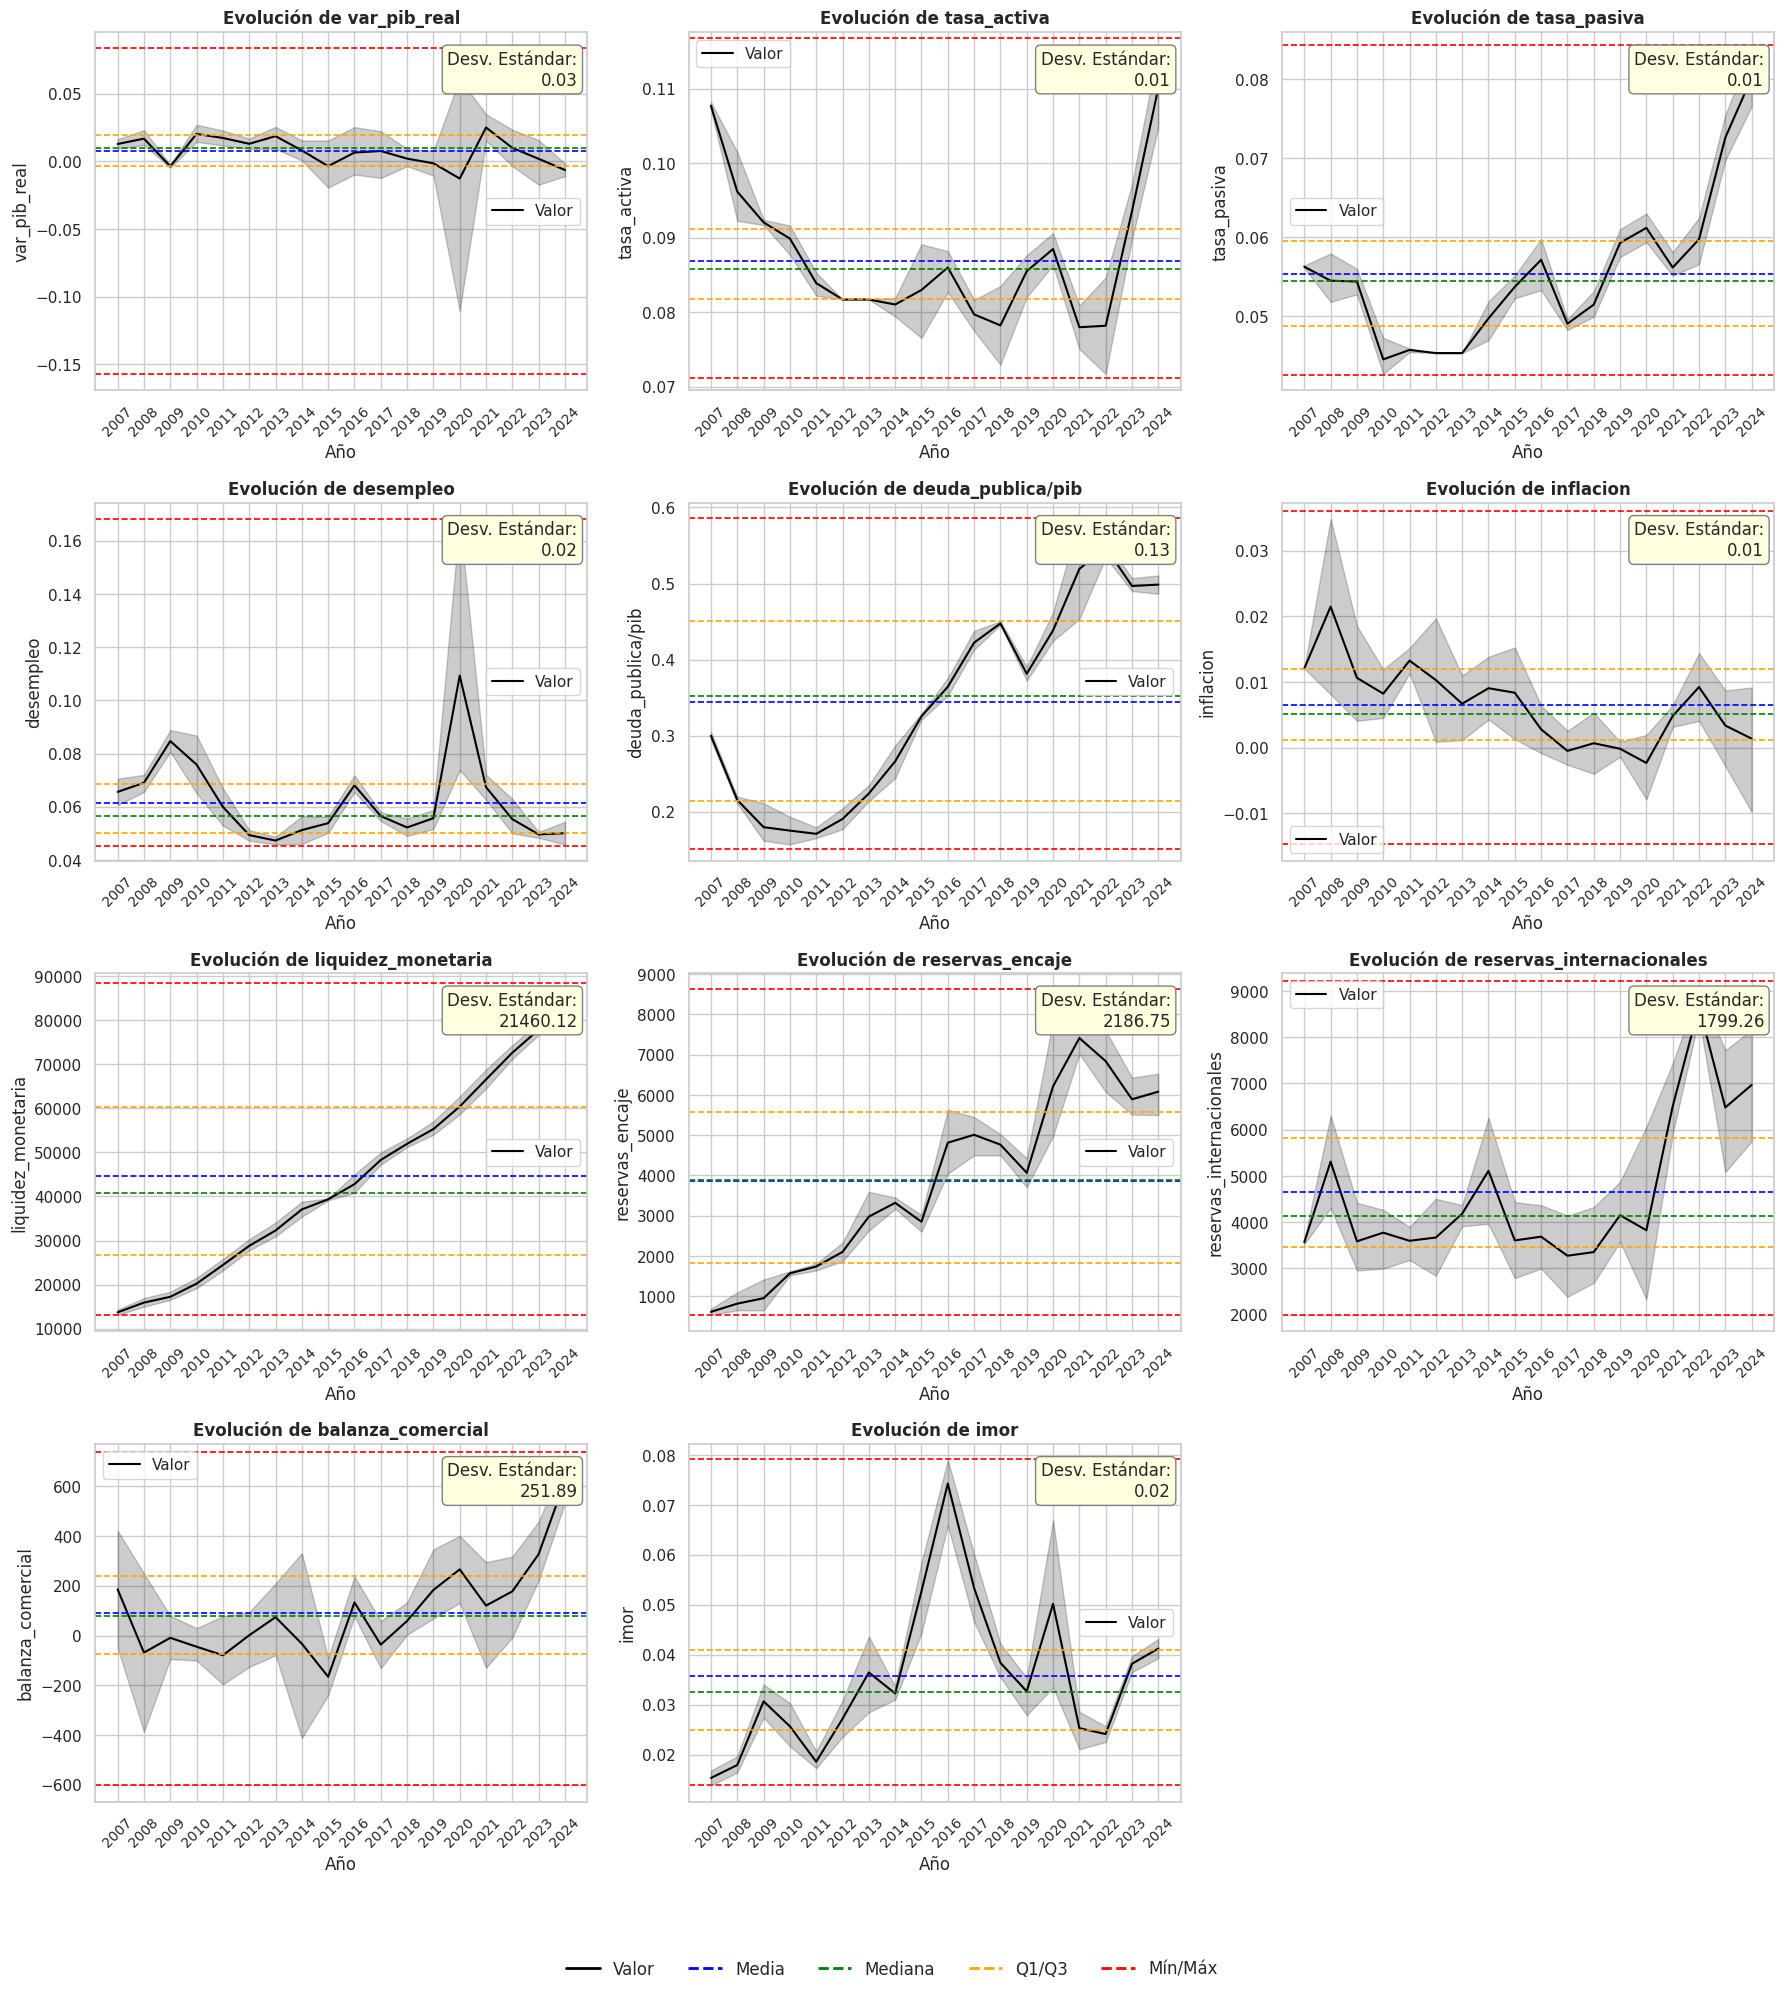

In [9]:
# Estilo estético y fuente
sns.set(style="whitegrid", font="DejaVu Sans", font_scale=1)

# Columnas numéricas
numerical_cols = ['var_pib_real', 'tasa_activa', 'tasa_pasiva', 'desempleo',
                  'deuda_publica/pib', 'inflacion', 'liquidez_monetaria',
                  'reservas_encaje', 'reservas_internacionales', 'balanza_comercial', 'imor']

# Configuración del grid
num_plots = len(numerical_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

# Colores de líneas por estadístico
line_colors = {
    'mean': 'blue',
    'median': 'green',
    'q1': 'orange',
    'q3': 'orange',
    'min': 'red',
    'max': 'red'
}

# Para evitar leyendas duplicadas
custom_lines = []

for i, col in enumerate(numerical_cols):
    ax = axes[i]

    # Línea temporal
    sns.lineplot(x='year', y=col, data=imor_filtrada, ax=ax, color='black', label='Valor')

    # Estadísticos
    data = imor_filtrada[col].dropna()
    stats = {
        'mean': data.mean(),
        'median': data.median(),
        'q1': data.quantile(0.25),
        'q3': data.quantile(0.75),
        'min': data.min(),
        'max': data.max(),
        'std': data.std()
    }

    for stat_name, value in stats.items():
        if stat_name != 'std':
            ax.axhline(value, linestyle='--', linewidth=1.2, color=line_colors[stat_name])

    # Texto con desviación estándar
    std_text = f"Desv. Estándar:\n{stats['std']:.2f}"
    ax.text(0.98, 0.95, std_text,
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray'),
            fontsize=12, fontname='DejaVu Sans')

    # Títulos y etiquetas
    ax.set_title(f'Evolución de {col}', fontsize=12, fontweight='bold', fontname='DejaVu Sans')
    ax.set_xlabel('Año', fontsize=12, fontname='DejaVu Sans')
    ax.set_ylabel(col, fontsize=12, fontname='DejaVu Sans')
    ax.tick_params(axis='x', rotation=45, labelsize=10)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Crear leyenda general
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='black', lw=2, label='Valor'),
    Line2D([0], [0], color='blue', linestyle='--', lw=2, label='Media'),
    Line2D([0], [0], color='green', linestyle='--', lw=2, label='Mediana'),
    Line2D([0], [0], color='orange', linestyle='--', lw=2, label='Q1/Q3'),
    Line2D([0], [0], color='red', linestyle='--', lw=2, label='Mín/Máx'),
]

fig.legend(handles=custom_lines, loc='lower center', ncol=5, fontsize=12, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Deja espacio para la leyenda abajo
plt.show()

In [10]:
#Análisis descriptivo variables categóricas
imor_filtrada.describe(include="object")

year        mes trimestre
count     70         70        70
unique    18          6         4
top     2008  Diciembre        T3
freq       4         18        18

Se detecta la presencia de irregularidades, específicamente, para la variable "mes", pues en los valores "unique" deberían reflejarse 4 valores en vez de 6 ya que cada trimestre está representado por un mes y un año tiene 4 trimestres, por lo tanto, tiene 4 meses de referencia.

In [11]:
#Se muestran los valores únicos almacenados en la columna mes.
print(imor_filtrada["mes"].unique())

['Septiembre' 'Diciembre' 'Marzo' 'Junio' 'Marzo ' 'September']


El resultado muestra la presencia de los registros "Marzo " (con un espacio al final) y "September" que debería ser "Septiembre". Por lo tanto, hay que corregir estos datos.

In [12]:
# Eliminar espacios extra
imor_filtrada['mes'] = imor_filtrada['mes'].str.strip()

# Reemplazar valores inconsistentes
imor_filtrada['mes'] = imor_filtrada['mes'].replace({
    'September': 'Septiembre'
})

# Asegurarse de que siga siendo categórica
imor_filtrada['mes'] = imor_filtrada['mes'].astype(str)

# Verifica los resultados
print(imor_filtrada['mes'].unique())

['Septiembre' 'Diciembre' 'Marzo' 'Junio']


Se ha solucionado el problema, a continuación se calculan las estadísticas descriptivas para las variables categóricas y, esta vez, deberían haber 4 registros únicos en la columna mes.

In [13]:
#Análisis descriptivo variables categóricas
imor_filtrada.describe(include="object")

year         mes trimestre
count     70          70        70
unique    18           4         4
top     2008  Septiembre        T3
freq       4          18        18

Lo siguiente es analizar los valores nulos. En el análisis descriptivo de las variables cuantitativas se encontró que var_pib_real y desempleo poseen valores nulos (1 registro para cada uno). A continuación, se consultan estos valores.

In [14]:
#Consultar valores nulos en las variables var_pib_real y desempleo.
print(imor_filtrada[['year', 'trimestre', 'var_pib_real', 'desempleo']][imor_filtrada[['var_pib_real', 'desempleo']].isnull().any(axis=1)])

    year trimestre  var_pib_real  desempleo
50  2020        T1     -0.005885        NaN
69  2024        T4           NaN   0.045685


Dado que la base de datos cuenta con 70 registros, eliminar filas no es una opción; por lo tanto, se imputan estos valores nulos en función del promedio anual para cada variable.

In [15]:
# Crear grupo por año
grupo_year = imor_filtrada.groupby(['year'])

# Imputar con la media del grupo (year)
for col in ['var_pib_real', 'desempleo']:
    imor_filtrada[col] = imor_filtrada.groupby('year')[col].transform(lambda x: x.fillna(x.mean()))

# Verificar la imputación
print(imor_filtrada[['var_pib_real', 'desempleo']].isnull().sum())

var_pib_real    0
desempleo       0
dtype: int64


Los valores nulos fueron reemplazados. A continuación, se muestran los valores imputados.

In [16]:
#Filtrar por los valores imputados.
filtro = imor_filtrada[
    ((imor_filtrada['year'] == "2020") & (imor_filtrada['trimestre'] == "T1")) |
    ((imor_filtrada['year'] == "2024") & (imor_filtrada['trimestre'] == 'T4'))
]

print(filtro[['year', 'trimestre', 'var_pib_real', 'desempleo']])

    year trimestre  var_pib_real  desempleo
50  2020        T1     -0.005885   0.109318
69  2024        T4     -0.006435   0.045685


Una vez corregidos los problemas de valores nulos, se procede a recalcular los estadísticos descriptivos de las variables numéricas.

In [17]:
# Describe transpuesto: filas = variables, columnas = estadísticos
descripcion_transpuesta = imor_filtrada.describe().transpose()

# Mostrar resultado
descripcion_transpuesta

count          mean           std           min  \
var_pib_real               70.0      0.007150      0.026128     -0.157266   
tasa_activa                70.0      0.086911      0.009506      0.071100   
tasa_pasiva                70.0      0.055310      0.009572      0.042500   
desempleo                  70.0      0.062203      0.018398      0.045416   
deuda_publica/pib          70.0      0.343615      0.132242      0.151000   
inflacion                  70.0      0.006477      0.008750     -0.014743   
liquidez_monetaria         70.0  44685.837703  21460.118392  13120.844642   
reservas_encaje            70.0   3870.482131   2186.751344    535.810000   
reservas_internacionales   70.0   4657.070175   1799.264031   1990.168458   
balanza_comercial          70.0     92.364558    251.892839   -602.767507   
imor                       70.0      0.035801      0.015811      0.013800   

                                   25%           50%           75%  \
var_pib_real                 -0.003490      0.009441      0.019223   
tasa_activa                   0.081700      0.085750      0.091150   
tasa_pasiva                   0.048750      0.054400      0.059450   
desempleo                     0.050356      0.056661      0.069227   
deuda_publica/pib             0.213500      0.352500      0.450750   
inflacion                     0.001195      0.005158      0.011913   
liquidez_monetaria        26804.442439  40863.216807  60218.233266   
reservas_encaje            1831.190556   3895.346810   5584.126306   
reservas_internacionales   3460.127782   4123.539737   5811.607165   
balanza_comercial           -74.992031     76.860191    239.661244   
imor                          0.024975      0.032600      0.040906   

                                   max  
var_pib_real                  0.083463  
tasa_activa                   0.116800  
tasa_pasiva                   0.084400  
desempleo                     0.168221  
deuda_publica/pib             0.585900  
inflacion                     0.036078  
liquidez_monetaria        88484.867770  
reservas_encaje            8620.400470  
reservas_internacionales   9226.323648  
balanza_comercial           738.756452  
imor                          0.079200

El siguiente paso es analizar la distribución de cada variable. Esto permitirá distinguir qué variables presentan una distribución normal, con sesgo positivo o con sesgo negativo.

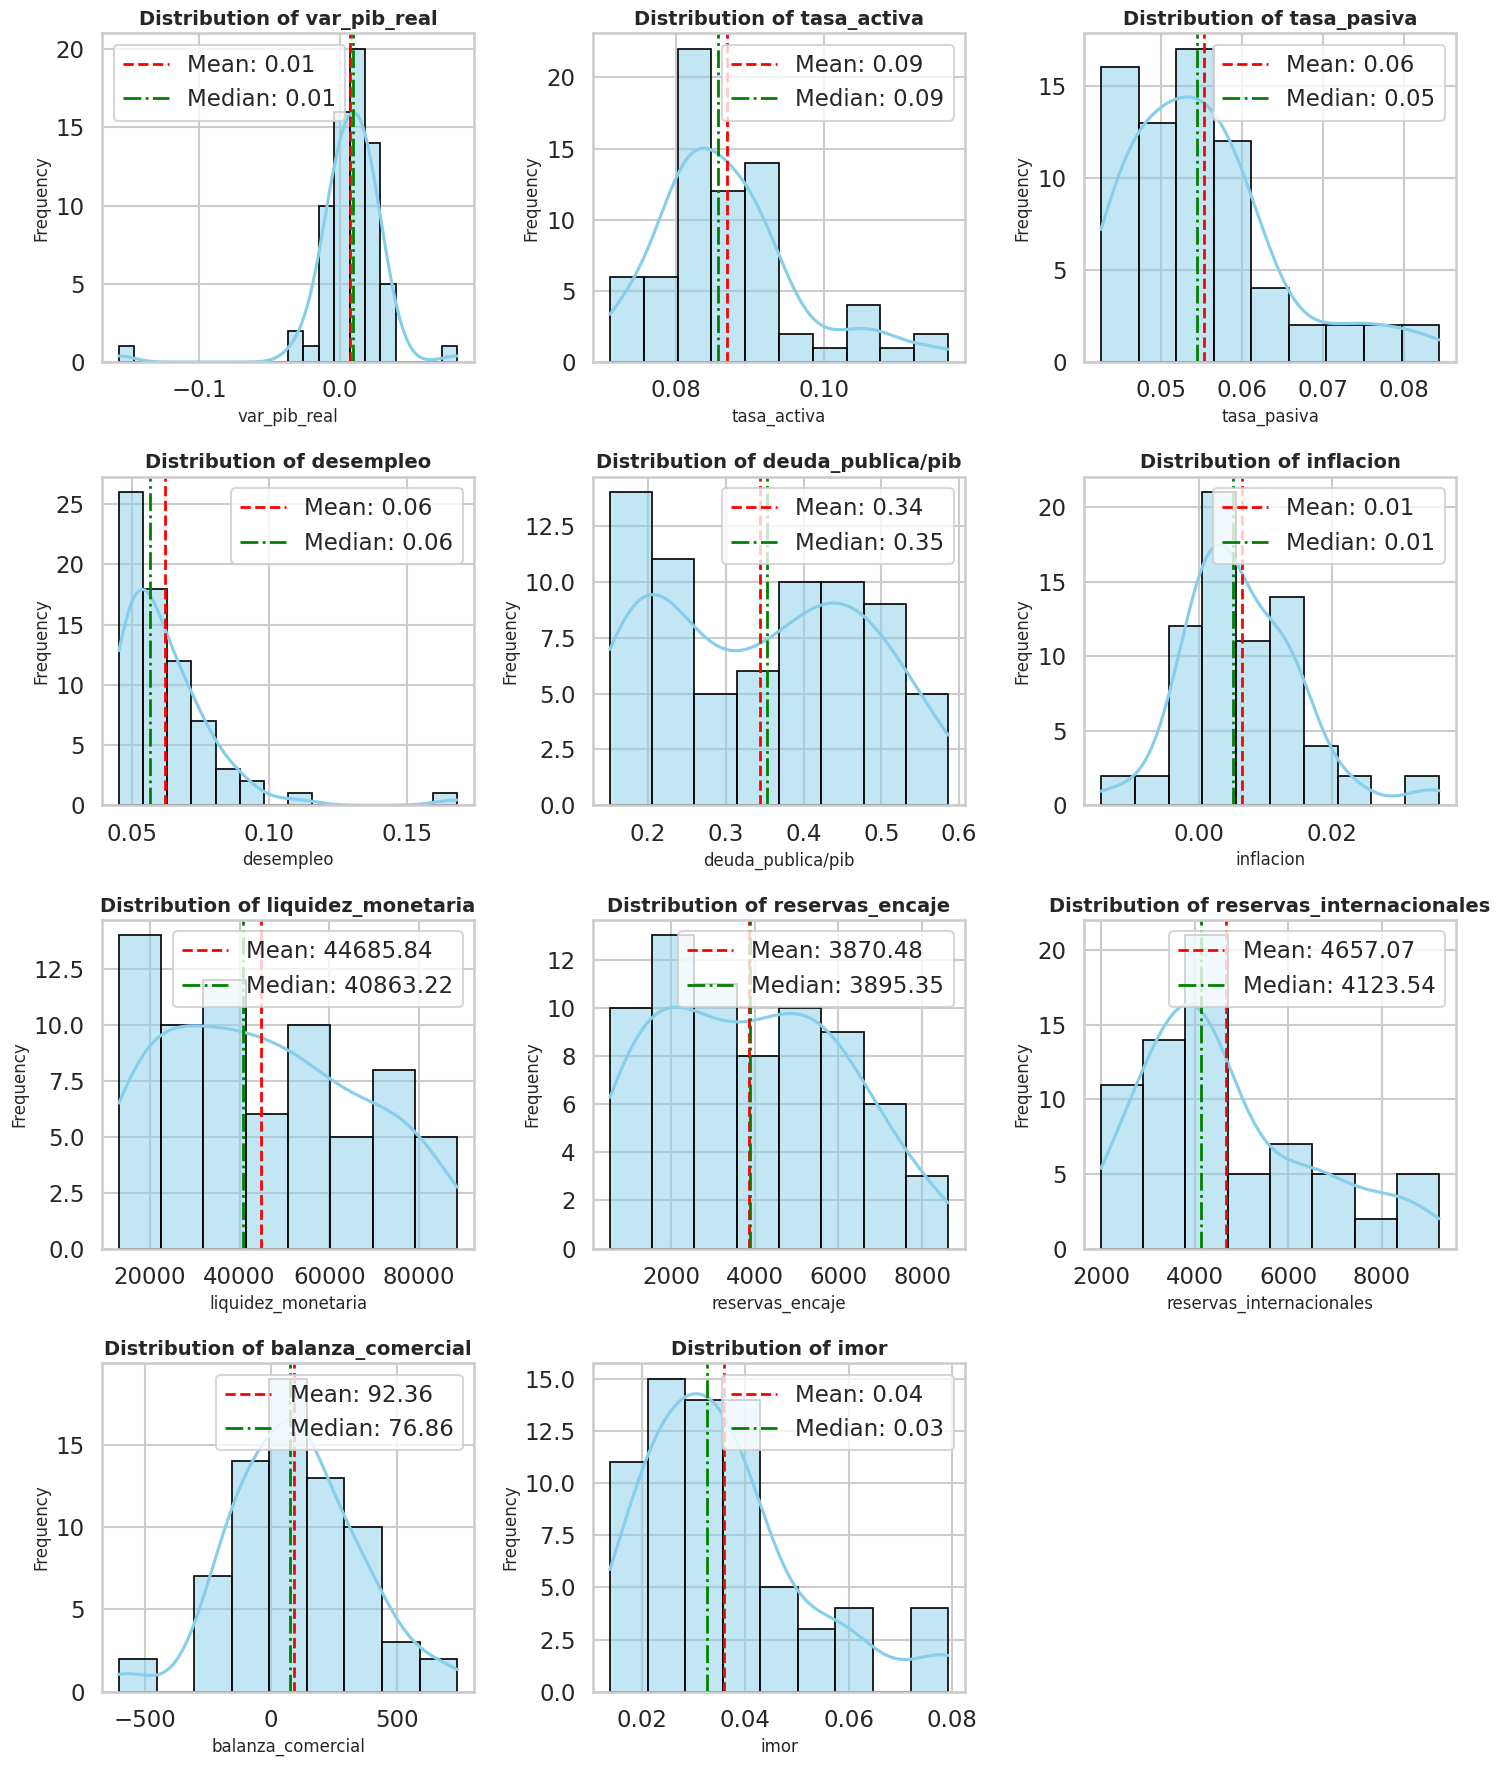

In [18]:
# Estilo más elegante
sns.set_style("whitegrid")
sns.set_context("talk")

# Seleccionar columnas numéricas
numerical_cols = imor_filtrada.select_dtypes(include=['number']).columns
num_cols = len(numerical_cols)

# Configurar tamaño de la cuadrícula
cols = 3  # columnas por fila
rows = (num_cols + cols - 1) // cols

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4.5 * rows))
axes = axes.flatten()

# Dibujar cada histograma con KDE, media y mediana
for i, col in enumerate(numerical_cols):
    data = imor_filtrada[col].dropna()
    mean = data.mean()
    median = data.median()

    sns.histplot(data, kde=True, ax=axes[i], color='skyblue', edgecolor='black', linewidth=1.2)

    # Media
    axes[i].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')

    # Mediana
    axes[i].axvline(median, color='green', linestyle='-.', linewidth=2, label=f'Median: {median:.2f}')

    axes[i].set_title(f'Distribution of {col}', fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].legend()

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

En líneas generales, pareciera que ninguna variable presenta una distribución normal. Afortunadamente, esto no es un problema, pues el estudio plantea el uso de algoritmos no paramétricos; por lo que la normalidad no es un requisito.

Lo que sí es requisito es tratar valores atípicos, pues estos algoritmos son sensibles a este tipo de datos. Se procede a realizar el gráfico de barras para identificar valores atípicos en función del rango IQR.

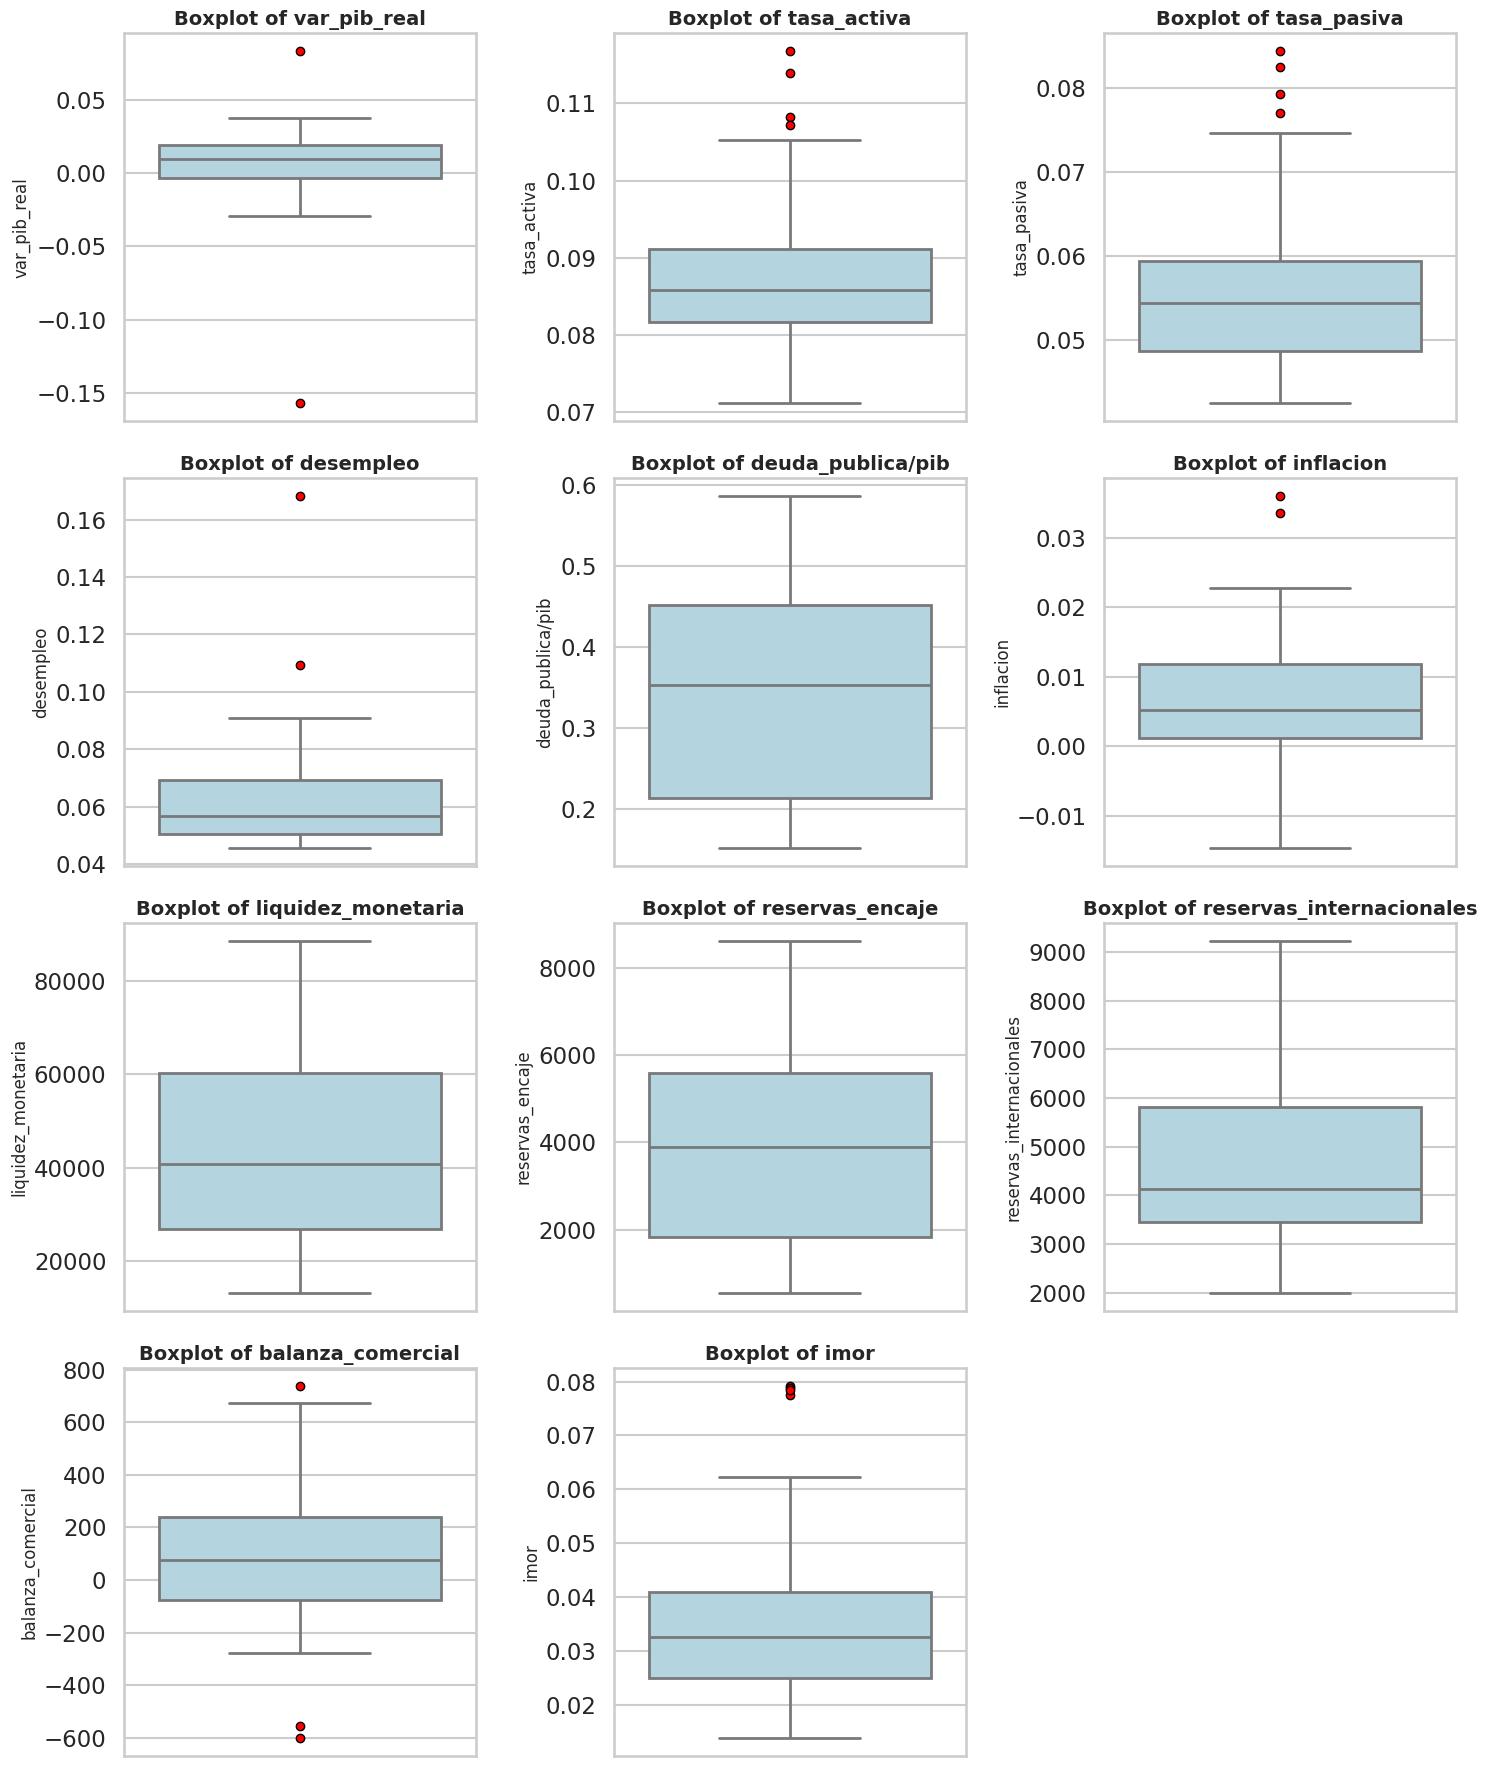

In [19]:
# Estilo más elegante
sns.set_style("whitegrid")
sns.set_context("talk")

# Seleccionar columnas numéricas
numerical_cols = imor_filtrada.select_dtypes(include=['number']).columns
num_cols = len(numerical_cols)

# Configurar tamaño de la cuadrícula
cols = 3  # columnas por fila
rows = (num_cols + cols - 1) // cols

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4.5 * rows))
axes = axes.flatten()

# Dibujar cada boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        y=imor_filtrada[col],
        ax=axes[i],
        color='lightblue',         # Color del boxplot
        flierprops={
            'marker': 'o',          # Tipo de marcador para outliers
            'markerfacecolor': 'red',  # Color de los outliers
            'markeredgecolor': 'black',
            'markersize': 6
        },
        linewidth=2
    )
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, weight='bold')
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xlabel('')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

El box plot muestra que sólo las variables deuda_publica/pib, liquidez_monetaria, reservas_encaje, reservas_internacionales no presentan valores atípicos. El resto de variables deben ser tratadas con "windsorización" basada en el rango IQR, pero antes de esto sería interesane ver qué porcentaje de cada varible presenta valores atípicos.

In [20]:
# Seleccionar columnas numéricas
numerical_cols = imor_filtrada.select_dtypes(include=['number']).columns

# Diccionario para guardar resultados
outlier_percentages = {}

# Calcular outliers por IQR
for col in numerical_cols:
    Q1 = imor_filtrada[col].quantile(0.25)
    Q3 = imor_filtrada[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = imor_filtrada[(imor_filtrada[col] < lower_bound) | (imor_filtrada[col] > upper_bound)]
    percentage = len(outliers) / len(imor_filtrada) * 100
    outlier_percentages[col] = round(percentage, 2)

# Mostrar resultados como DataFrame ordenado
outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['% de outliers'])
outlier_df = outlier_df.sort_values(by='% de outliers', ascending=False)
print(outlier_df)

                          % de outliers
tasa_activa                        5.71
tasa_pasiva                        5.71
imor                               5.71
balanza_comercial                  4.29
var_pib_real                       2.86
desempleo                          2.86
inflacion                          2.86
liquidez_monetaria                 0.00
deuda_publica/pib                  0.00
reservas_internacionales           0.00
reservas_encaje                    0.00


A continuación, se aplica la "Windsorización" en función del IQR.

In [21]:
# Variables a windsorizar
variables = [
    'tasa_activa', 'tasa_pasiva', 'imor',
    'balanza_comercial', 'var_pib_real',
    'desempleo', 'inflacion'
]

# Crear copia del DataFrame para no modificar el original
imor_windsorizada = imor_filtrada.copy()

# Aplicar windsorización basada en IQR para cada variable
for col in variables:
    Q1 = imor_windsorizada[col].quantile(0.25)
    Q3 = imor_windsorizada[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    imor_windsorizada[col] = np.clip(imor_windsorizada[col], lower_bound, upper_bound)

Se corrobora que los valroes atípicos fueron tratados consultando nuevamente el porcentaje de estos valores en cada columna.

In [22]:
import pandas as pd

# Seleccionar columnas numéricas en la nueva base
numerical_cols = imor_windsorizada.select_dtypes(include=['number']).columns

# Diccionario para guardar resultados
outlier_percentages = {}

# Calcular outliers por IQR en la base windsorizada
for col in numerical_cols:
    Q1 = imor_windsorizada[col].quantile(0.25)
    Q3 = imor_windsorizada[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = imor_windsorizada[(imor_windsorizada[col] < lower_bound) | (imor_windsorizada[col] > upper_bound)]
    percentage = len(outliers) / len(imor_windsorizada) * 100
    outlier_percentages[col] = round(percentage, 2)

# Mostrar resultados como DataFrame ordenado
outlier_df_wind = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['% de outliers'])
outlier_df_wind = outlier_df_wind.sort_values(by='% de outliers', ascending=False)
print(outlier_df_wind)

                          % de outliers
var_pib_real                        0.0
tasa_activa                         0.0
tasa_pasiva                         0.0
desempleo                           0.0
deuda_publica/pib                   0.0
inflacion                           0.0
liquidez_monetaria                  0.0
reservas_encaje                     0.0
reservas_internacionales            0.0
balanza_comercial                   0.0
imor                                0.0


Procedemos a revisar las nuevas distribuciones y los nuevos gráficos de cajas.

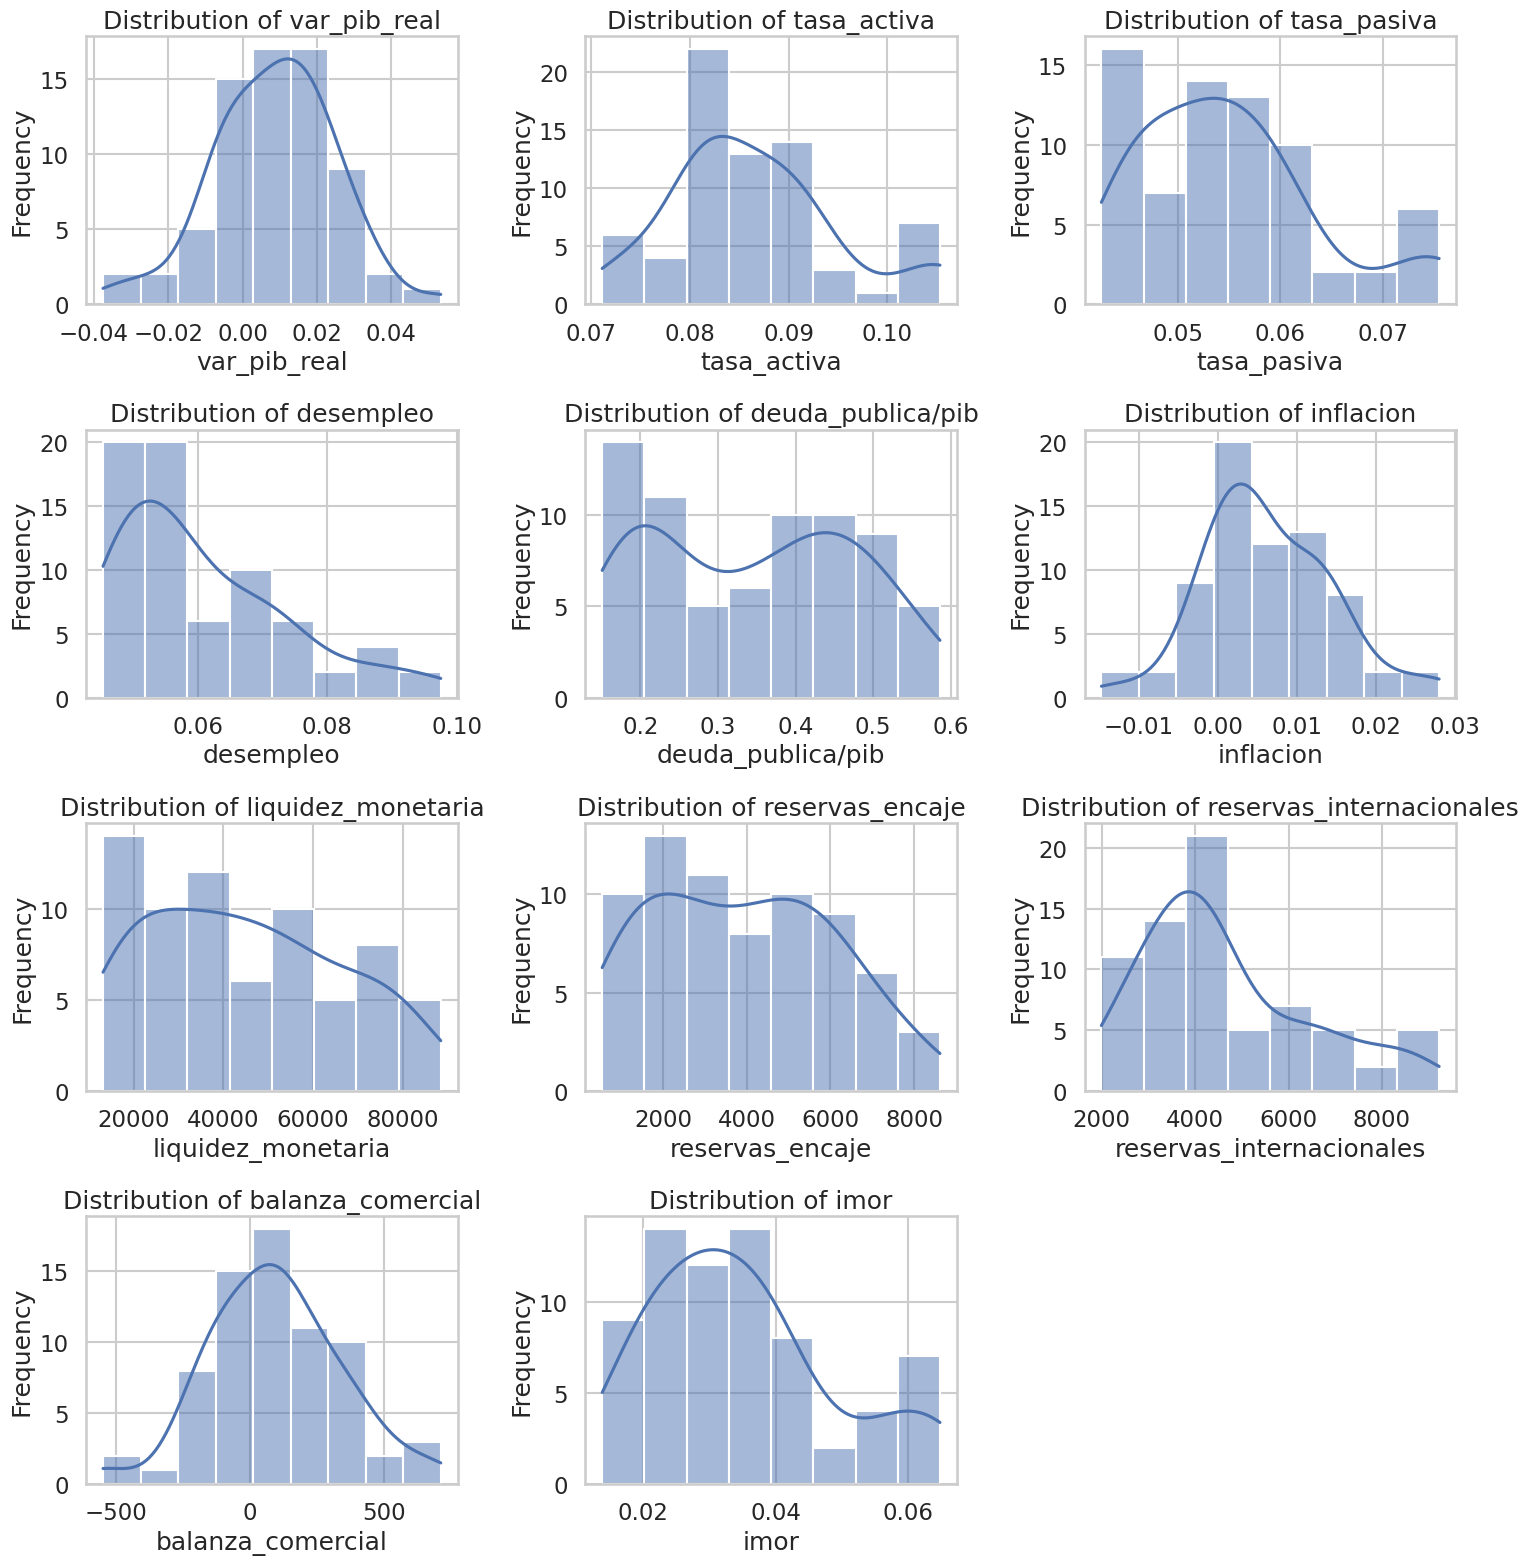

In [23]:
# Seleccionar columnas numéricas
numerical_cols = imor_windsorizada.select_dtypes(include=['number']).columns
num_cols = len(numerical_cols)

# Configurar tamaño de la cuadrícula (ajusta según tu número de variables)
cols = 3  # número de columnas por fila
rows = (num_cols + cols - 1) // cols  # calcula cuántas filas se necesitan

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Aplanar el arreglo de ejes para facilitar la iteración

# Dibujar cada histograma con KDE
for i, col in enumerate(numerical_cols):
    sns.histplot(imor_windsorizada[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Quitar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

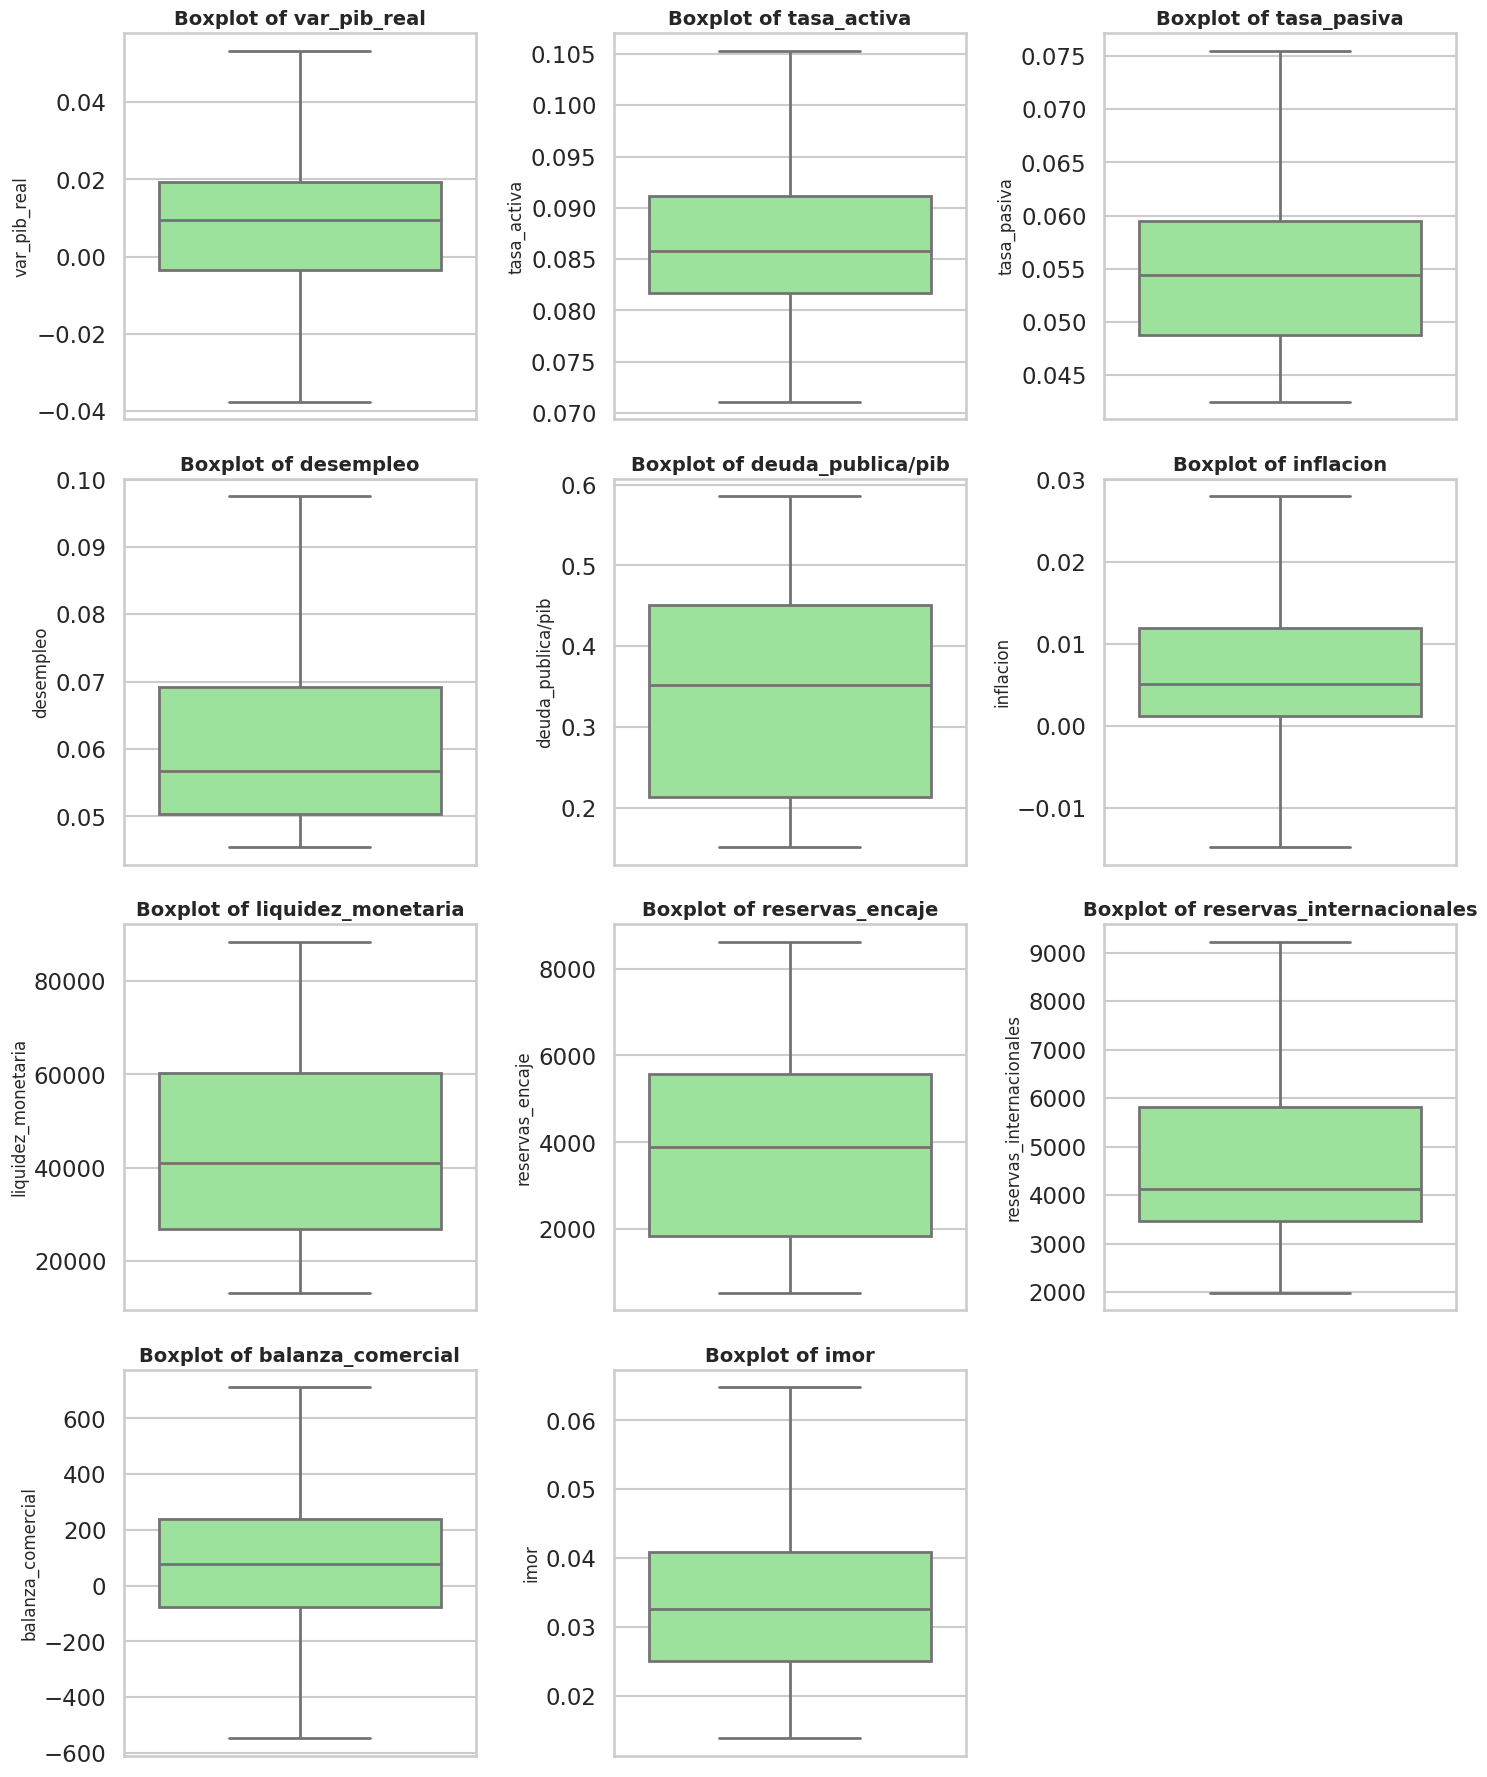

In [24]:
# Estilo elegante
sns.set_style("whitegrid")
sns.set_context("talk")

# Seleccionar columnas numéricas
numerical_cols = imor_windsorizada.select_dtypes(include=['number']).columns
num_cols = len(numerical_cols)

# Configurar tamaño de la cuadrícula
cols = 3  # columnas por fila
rows = (num_cols + cols - 1) // cols

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4.5 * rows))
axes = axes.flatten()

# Dibujar cada boxplot bonito
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        y=imor_windsorizada[col],
        ax=axes[i],
        color='lightgreen',          # Color del boxplot
        flierprops={
            'marker': 'o',            # Tipo de marcador para outliers
            'markerfacecolor': 'red', # Color del marcador (outlier)
            'markeredgecolor': 'black',
            'markersize': 6
        },
        linewidth=2
    )
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, weight='bold')
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xlabel('')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

El siguiente paso es analizar la correlación entre variables, esto permitirá dar una idea de los problemas de multicolinealidad que presente la base de datos.

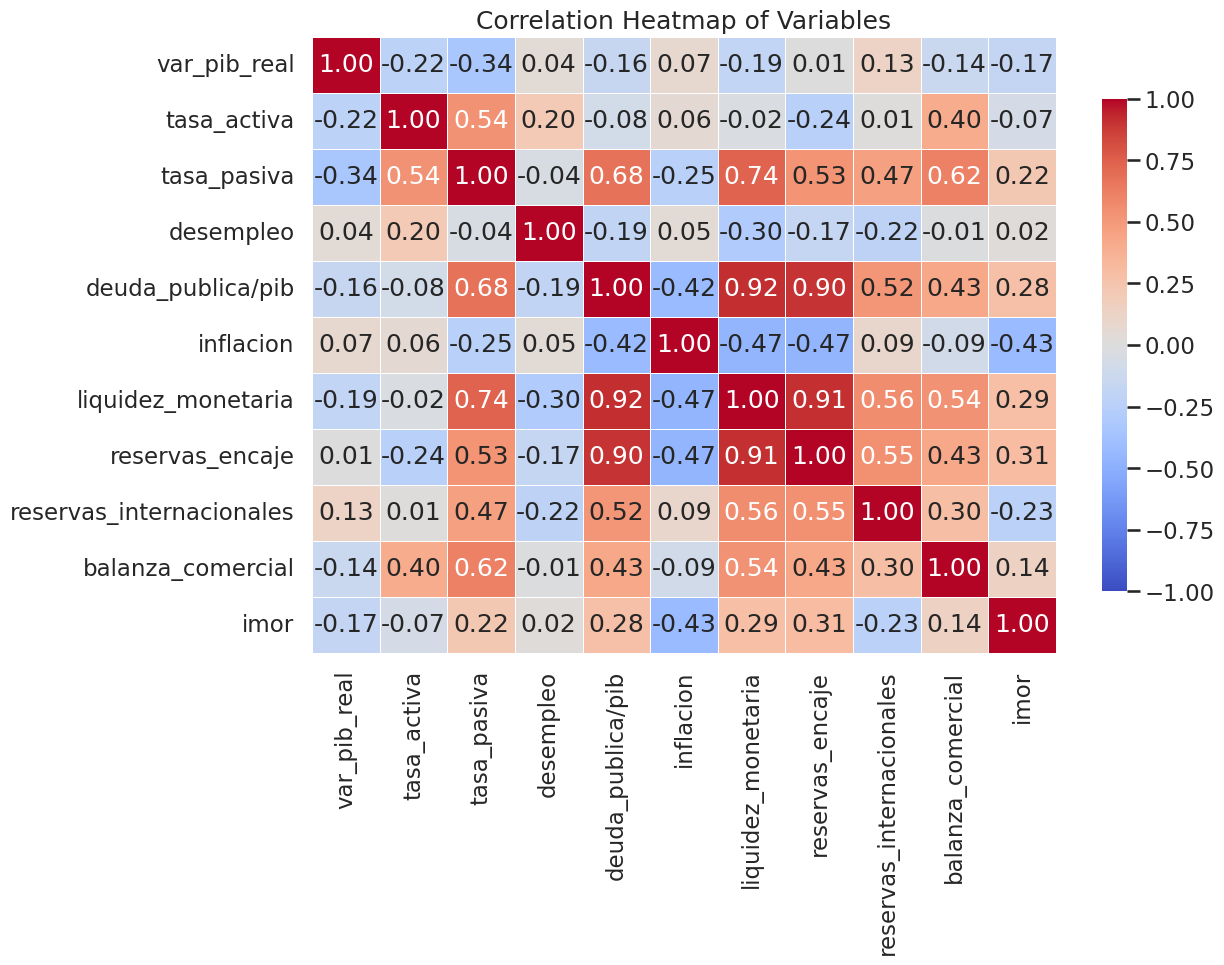

In [25]:
# Excluir las columnas categóricas (year, mes, trimestre) y calcular la correlación solo para las variables numéricas
numerical_cols = imor_windsorizada.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación solo para las variables numéricas
correlation_matrix = imor_windsorizada[numerical_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1,
            linewidths=0.5, cbar_kws={'shrink': 0.8})

# Títulos y etiquetas
plt.title('Correlation Heatmap of Variables')
plt.show()

Del gráfico de calor de las correlaciones entre variables, se destacan los siguientes hallazgos:

- var_pib_real, desempleo, inflación e imor son las que menos problemas de correlación múltiple presentan.
- Las demás variables presentan valores medianamente y extremadamente altos de correlación entre sí.

A continuación, se usará el VIF (Variance Inflation Factor) para cuantificar la multicolinealidad entre las variables, se usa el siguiente parámetro:

Si: VIF <= 5 No hay problemas de multicolinealidad
Si: 5 < VIF <= 10 Hay problemas moderados de multicolinealidad
Si: VIF > 10 Hay problemas de multicolinealidad.

In [26]:
# Asegúrate de que solo incluya variables numéricas (independientes)
X = imor_windsorizada.select_dtypes(include=[np.number]).dropna()

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Clasificación según el rango de VIF
def clasificar_vif(v):
    if v <= 5:
        return "Sin problemas"
    elif v <= 10:
        return "Problema moderado"
    else:
        return "Alta multicolinealidad"

vif_data["Diagnóstico"] = vif_data["VIF"].apply(clasificar_vif)

# Ordenar de mayor a menor por VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Mostrar tabla
print("Tabla de VIF con diagnóstico (ordenada de mayor a menor):")
display(vif_data)

Tabla de VIF con diagnóstico (ordenada de mayor a menor):


Variable         VIF             Diagnóstico
0                tasa_pasiva  403.764475  Alta multicolinealidad
1                tasa_activa  188.587954  Alta multicolinealidad
2         liquidez_monetaria  134.297246  Alta multicolinealidad
3          deuda_publica/pib   73.707333  Alta multicolinealidad
4            reservas_encaje   71.830168  Alta multicolinealidad
5                  desempleo   36.151931  Alta multicolinealidad
6   reservas_internacionales   22.905725  Alta multicolinealidad
7                       imor   11.948712  Alta multicolinealidad
8                  inflacion    2.861198           Sin problemas
9               var_pib_real    1.844817           Sin problemas
10         balanza_comercial    1.766260           Sin problemas

El análisis de la multicolineadlidad, empleando el VIF como métrica, muestra que var_pib_real, inflacion y balanza_comercial no presentan problemas de multicolinealidad.

La teoría indica que algoritmos como árboles de decisión y las redes neuronales no se ven afectados, en gran medida, por la multicolinealidad. No obstante, en este estudio compraremos los resultados obtenidos por estos algoritmos con una base de datos con problemas de multicolinealidad, otra base de datos con problemas moderados y otra sin problemas de multicolinelidad. De este modo, tendremos las siguientes bases de datos:

- base_datos_sin_problemas: Variables con VIF menor a 5
- base_datos_problemas_medio: Variables con VIF menor igual a 10
- base_datos_problemas_alto: Variables con VIF mayor a 10

In [27]:
#Copiar la base datos imor_windsorizada sin tratar la multicolinealidad en base_datos_problemas_alto
base_datos_problemas_alto = imor_windsorizada.copy()

A continuación se empezarán a eliminar las variables con mayor valor VIF. Estas son tasa_pasiva, tasa_activa, liquidez_monetaria (valores VIF por encima de 100 puntos).

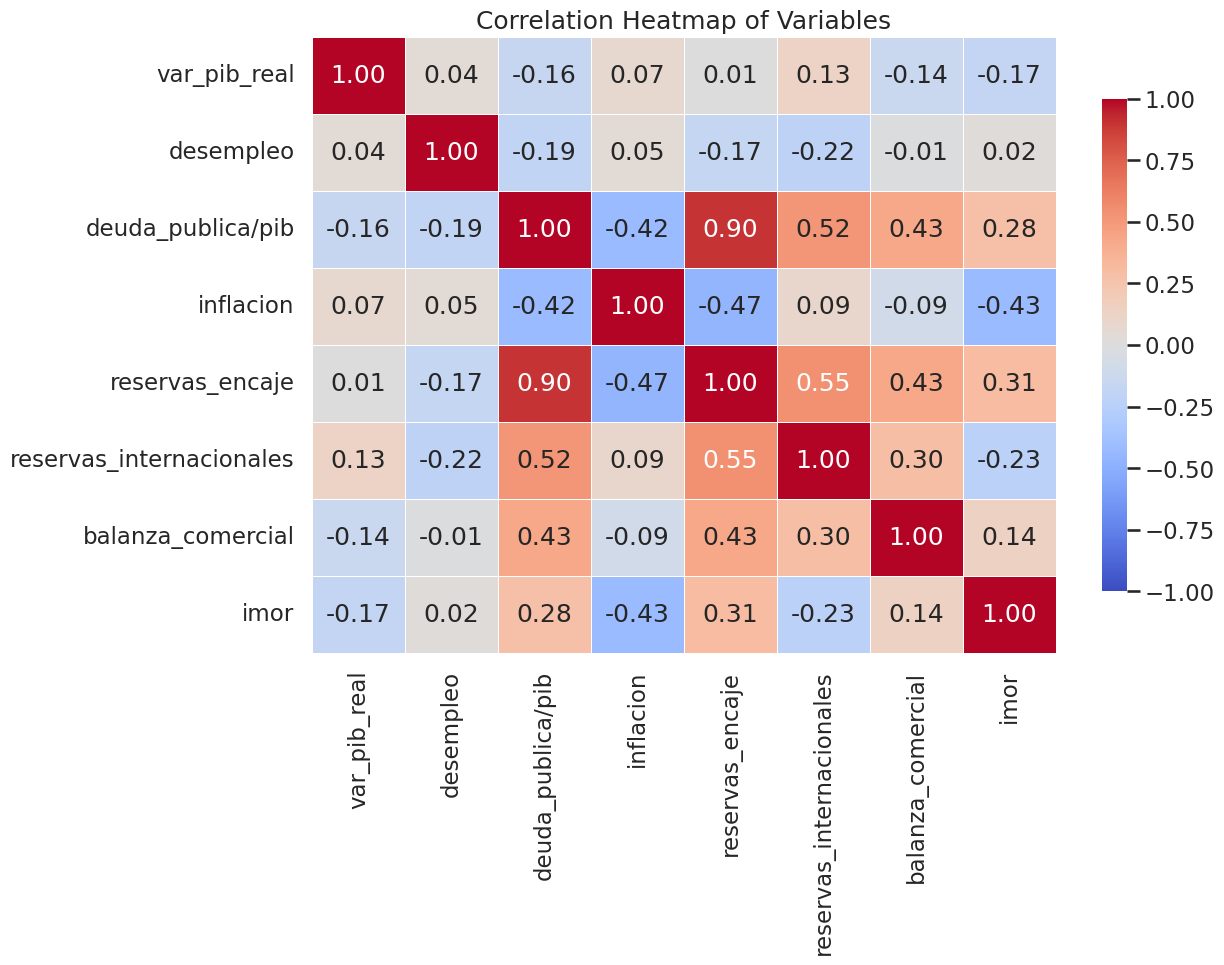

In [28]:
#Crear la variable base_datos_problemas_medio e ir probando configuraciones hasta tener variables con VIF menor o igual que 10
#Eliminar las variables con VIF mayor a 100
base_datos_problemas_medio = base_datos_problemas_alto.drop(
    columns=["tasa_pasiva", "tasa_activa", "liquidez_monetaria"]
).copy()

# Excluir las columnas categóricas (year, mes, trimestre) y calcular la correlación solo para las variables numéricas
numerical_cols = base_datos_problemas_medio.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación solo para las variables numéricas
correlation_matrix = base_datos_problemas_medio[numerical_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1,
            linewidths=0.5, cbar_kws={'shrink': 0.8})

# Títulos y etiquetas
plt.title('Correlation Heatmap of Variables')
plt.show()

In [29]:
# Asegúrate de que solo incluya variables numéricas (independientes)
X = base_datos_problemas_medio.select_dtypes(include=[np.number]).dropna()

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Clasificación según el rango de VIF
def clasificar_vif(v):
    if v <= 5:
        return "Sin problemas"
    elif v <= 10:
        return "Problema moderado"
    else:
        return "Alta multicolinealidad"

vif_data["Diagnóstico"] = vif_data["VIF"].apply(clasificar_vif)

# Ordenar de mayor a menor por VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Mostrar tabla
print("Tabla de VIF con diagnóstico (ordenada de mayor a menor):")
display(vif_data)

Tabla de VIF con diagnóstico (ordenada de mayor a menor):


Variable        VIF             Diagnóstico
0         deuda_publica/pib  43.534919  Alta multicolinealidad
1           reservas_encaje  29.108726  Alta multicolinealidad
2  reservas_internacionales  15.142692  Alta multicolinealidad
3                 desempleo  12.102772  Alta multicolinealidad
4                      imor   8.818732       Problema moderado
5                 inflacion   2.611125           Sin problemas
6              var_pib_real   1.578802           Sin problemas
7         balanza_comercial   1.437781           Sin problemas

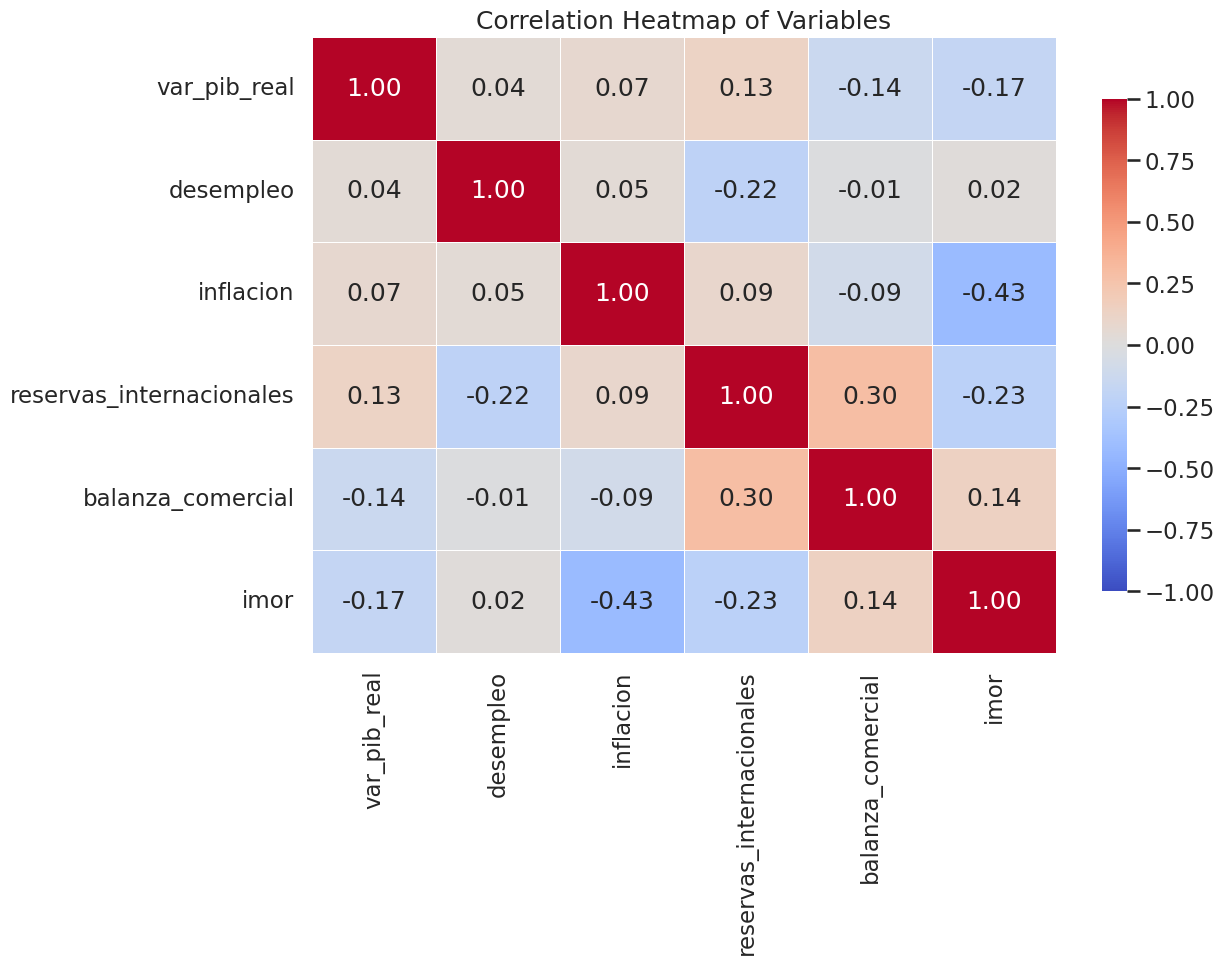

In [30]:
#De base_datos_problemas_medio, eliminar las variables con VIF mayor a 20
base_datos_problemas_medio = base_datos_problemas_medio.drop(columns=['deuda_publica/pib','reservas_encaje'])

# Excluir las columnas categóricas (year, mes, trimestre) y calcular la correlación solo para las variables numéricas
numerical_cols = base_datos_problemas_medio.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación solo para las variables numéricas
correlation_matrix = base_datos_problemas_medio[numerical_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1,
            linewidths=0.5, cbar_kws={'shrink': 0.8})

# Títulos y etiquetas
plt.title('Correlation Heatmap of Variables')
plt.show()

In [31]:
# Asegúrate de que solo incluya variables numéricas (independientes)
X = base_datos_problemas_medio.select_dtypes(include=[np.number]).dropna()

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Clasificación según el rango de VIF
def clasificar_vif(v):
    if v <= 5:
        return "Sin problemas"
    elif v <= 10:
        return "Problema moderado"
    else:
        return "Alta multicolinealidad"

vif_data["Diagnóstico"] = vif_data["VIF"].apply(clasificar_vif)

# Ordenar de mayor a menor por VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Mostrar tabla
print("Tabla de VIF con diagnóstico (ordenada de mayor a menor):")
display(vif_data)

Tabla de VIF con diagnóstico (ordenada de mayor a menor):


Variable        VIF             Diagnóstico
0                 desempleo  10.873253  Alta multicolinealidad
1                      imor   6.981959       Problema moderado
2  reservas_internacionales   6.107741       Problema moderado
3                 inflacion   1.860287           Sin problemas
4              var_pib_real   1.366002           Sin problemas
5         balanza_comercial   1.308079           Sin problemas

La tabla de VIF, muestra que desempleo es la variable con mayor multiculinealidad; no obstante, diversos estudios destacan la importancia de esta variable como predictura de la morosidad y por ende del riesgo de crédito. El Imor es la segunda mvariable con mayor VIF, no obstante, es importante para determinar nuesra variable dependiente; por lo tanto, se descartará a "reservas_internacionales".

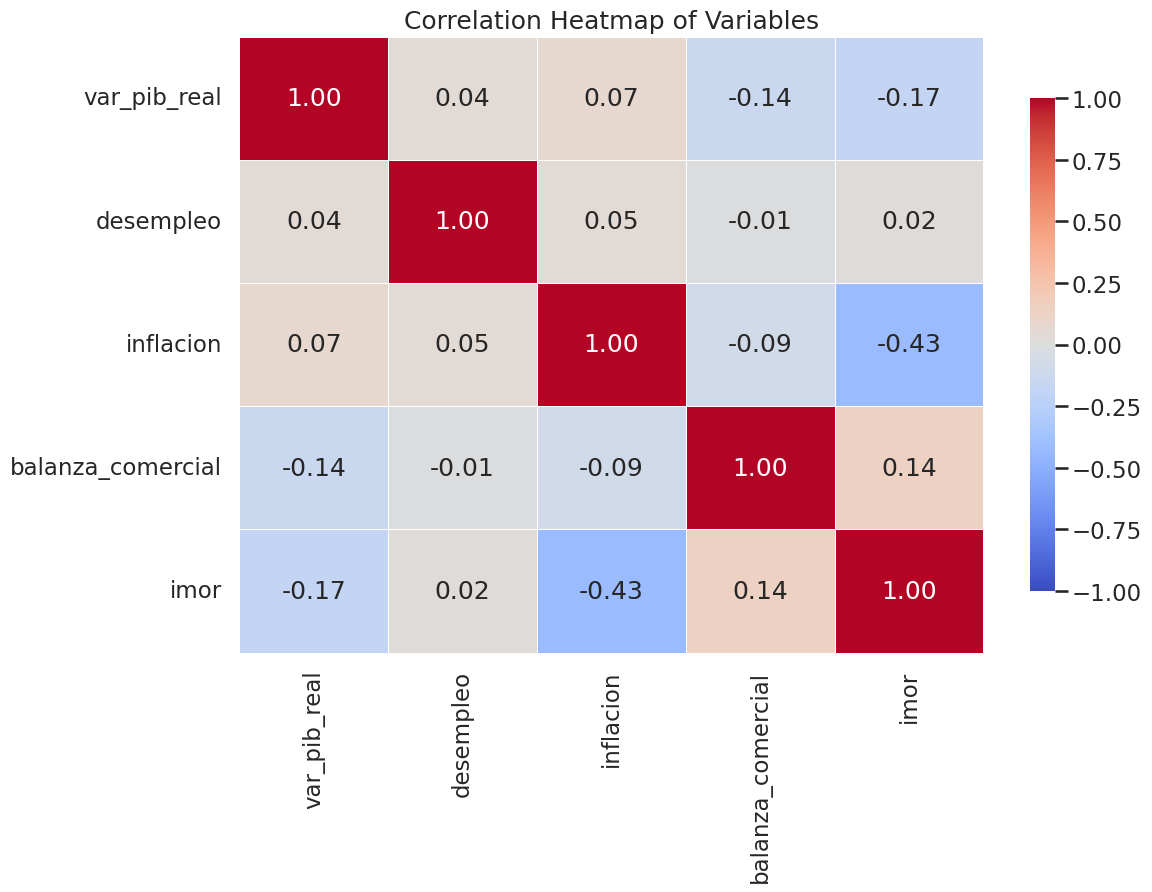

In [32]:
#De base_datos_problemas_medio, eliminar deuda_publica/pib
base_datos_problemas_medio = base_datos_problemas_medio.drop(columns=['reservas_internacionales'])

# Excluir las columnas categóricas (year, mes, trimestre) y calcular la correlación solo para las variables numéricas
numerical_cols = base_datos_problemas_medio.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación solo para las variables numéricas
correlation_matrix = base_datos_problemas_medio[numerical_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1,
            linewidths=0.5, cbar_kws={'shrink': 0.8})

# Títulos y etiquetas
plt.title('Correlation Heatmap of Variables')
plt.show()

In [33]:
# Asegúrate de que solo incluya variables numéricas (independientes)
X = base_datos_problemas_medio.select_dtypes(include=[np.number]).dropna()

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Clasificación según el rango de VIF
def clasificar_vif(v):
    if v <= 5:
        return "Sin problemas"
    elif v <= 10:
        return "Problema moderado"
    else:
        return "Alta multicolinealidad"

vif_data["Diagnóstico"] = vif_data["VIF"].apply(clasificar_vif)

# Ordenar de mayor a menor por VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Mostrar tabla
print("Tabla de VIF con diagnóstico (ordenada de mayor a menor):")
display(vif_data)

Tabla de VIF con diagnóstico (ordenada de mayor a menor):


Variable       VIF        Diagnóstico
0          desempleo  8.897130  Problema moderado
1               imor  6.793896  Problema moderado
2          inflacion  1.772640      Sin problemas
3       var_pib_real  1.307781      Sin problemas
4  balanza_comercial  1.180352      Sin problemas

El resultado nos deja una base de datos con VIF moderados y óptimos. De este modo, definimos nuestra segunda base de datos, sobre esta, se intentará obtener una base de datos sin problemas de multicolinealidad.

Dada la importancia de las variables que quedaron, se concluye que no se eliminarán más registros; por lo tanto, no es viable obtener una base de datos sin problemas de multicolinealidad; por lo tanto, aceptamos quedarnos con la base de datos con problemas y la base de datos con problemas moderados. Siendo la primera base_datos_a y la segunda base_datos_b

In [34]:
#Crear base_datos_a. Copiar la base de datos con problemas altos dentro de esta
base_datos_a = base_datos_problemas_alto.copy()

#Crear base_datos_b. Copiar la base de datos con problemas moderados dentro de esta.
base_datos_b = base_datos_problemas_medio.copy()

print(base_datos_a.info())
print(base_datos_b.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      70 non-null     object 
 1   mes                       70 non-null     object 
 2   trimestre                 70 non-null     object 
 3   var_pib_real              70 non-null     float64
 4   tasa_activa               70 non-null     float64
 5   tasa_pasiva               70 non-null     float64
 6   desempleo                 70 non-null     float64
 7   deuda_publica/pib         70 non-null     float64
 8   inflacion                 70 non-null     float64
 9   liquidez_monetaria        70 non-null     float64
 10  reservas_encaje           70 non-null     float64
 11  reservas_internacionales  70 non-null     float64
 12  balanza_comercial         70 non-null     float64
 13  imor                      70 non-null     float64
dtypes: float64(1

Fase 3. Preparación de datos.
En esta fase se realizarán las siguientes acciones.

- a) Seleccionar la variables relevantes (eliminar variables no necesrias para el modelo debido a su naturaleza, definir variables independientes y variable dependiente.

- b) Crear la variable riesgo de crédito en función del IMOR con los siguientes métodos de discretización. K-means y discretización por cuantiles. Esto nos dará como resultado dos bases de datos por cada base de datos antes mencionada, es decir, dos bases de datos por a y dos por b.

- c) Normalizar las bases de datos usando el método de Min-Max Scaling (Normalización Min - Max). Si bien este método es sensible a outliers, cabe recordar que las bases de datos a y b ya fueron tratadas para eliminar outliers con el método de windsorización; por lo tanto, esto no es una problemática.

In [35]:
#Eliminar year, mes y trimestre de las bases de datos base_datos_a y base_datos_b
base_datos_a = base_datos_a.drop(columns=['year', 'mes', 'trimestre'])
base_datos_b = base_datos_b.drop(columns=['year', 'mes', 'trimestre'])

print(base_datos_a.head(10))
print(base_datos_b.head(10))

   var_pib_real  tasa_activa  tasa_pasiva  desempleo  deuda_publica/pib  \
0      0.016396     0.105325       0.0561   0.070583             0.2948   
1      0.009231     0.105325       0.0564   0.060655             0.3049   
2      0.026183     0.104300       0.0596   0.068631             0.2180   
3      0.013584     0.095900       0.0545   0.063887             0.2120   
4      0.016696     0.093100       0.0529   0.070551             0.2100   
5      0.010568     0.091400       0.0509   0.073098             0.2220   
6     -0.001766     0.092400       0.0531   0.085821             0.2270   
7     -0.004575     0.092400       0.0563   0.083447             0.1600   
8     -0.004908     0.091500       0.0557   0.090642             0.1680   
9     -0.003637     0.091900       0.0524   0.078928             0.1640   

   inflacion  liquidez_monetaria  reservas_encaje  reservas_internacionales  \
0   0.012043        13120.844642       535.810000               3611.123821   
1   0.012079    

En ambas bases, tanto a como b, la variable imor se usará para determinar a la variable dependiente riesgo_credito que es una variable categórica; por lo tanto, en un principio, imor es nuestra variable dependiente y el resto las variables independientes.

- b) Modelar la variables riesgo_credito en función el IMOR usando discretización por medio de k-means y cuartiles. Cabe destacar que el número de categorías no puede ser menor a 2 ni mayor que 3; esto será definido mediante el uso de CODOS para determinar el valor óptimo de k en función de los limitantes planteados. Si k = 2, en la discretización por cuantiles se usará el mismo valor, igualmente si k = 3.

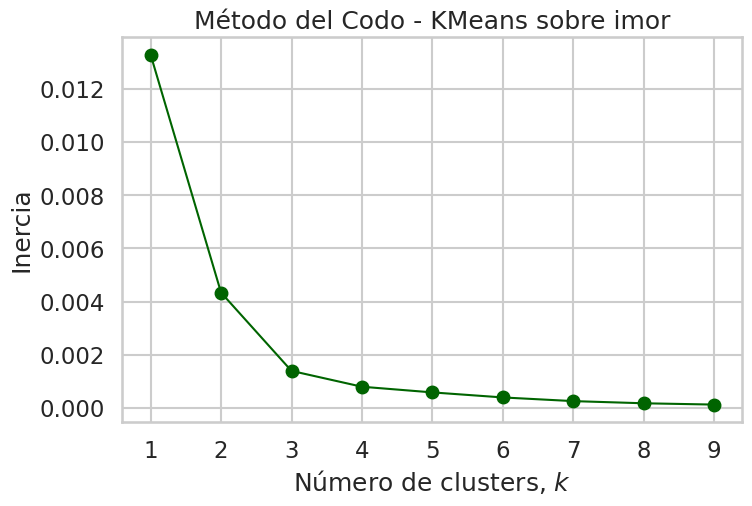

In [36]:
# Seleccionamos solo la variable "imor" como DataFrame
imor_data = base_datos_a[["imor"]]

# Rango de posibles valores de k
ks = range(1, 10)

# Lista para almacenar las inercias
inercias = []

# Calculamos la inercia para cada k
for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(imor_data)
    inercias.append(model.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 5))
plt.plot(ks, inercias, marker='o', linewidth=1.5, color='darkgreen')
plt.xlabel('Número de clusters, $k$')
plt.ylabel('Inercia')
plt.title('Método del Codo - KMeans sobre imor')
plt.xticks(ks)
plt.grid(True)
plt.show()

El método del CODO revela que un cambio de k a 3 generaría un mejor valor de la inercia pasando de 0.004 a menos de 0.002; por lo tanto, y dada la restricción, se procede a usar k = 3 para las categorías.

No obstante, también se crearán categorías con k = 2, y se analizará qué base de datos da mejor resultado con los algoritmos planteados.

In [37]:
#A continuación se crea la variable categórica riesgo_credito con k = 3

# Seleccionar la variable "imor" como DataFrame
imor_data = base_datos_a[["imor"]]

# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(imor_data)

# Obtener centros de los clusters y ordenarlos
centros = kmeans.cluster_centers_.flatten()
orden_clusters = np.argsort(centros)

# Crear un diccionario de mapeo para los nuevos valores
mapa_clusters = {original: nuevo for nuevo, original in enumerate(orden_clusters)}

# Asignar etiquetas reordenadas
base_datos_a_clusters = base_datos_a.copy()
base_datos_a_clusters["riesgo_credito"] = [mapa_clusters[etiqueta] for etiqueta in kmeans.labels_]
base_datos_a_clusters["riesgo_credito"] = base_datos_a_clusters["riesgo_credito"].astype(object)

# Mostrar resultados
base_datos_a_clusters.head(10)

var_pib_real  tasa_activa  tasa_pasiva  desempleo  deuda_publica/pib  \
0      0.016396     0.105325       0.0561   0.070583             0.2948   
1      0.009231     0.105325       0.0564   0.060655             0.3049   
2      0.026183     0.104300       0.0596   0.068631             0.2180   
3      0.013584     0.095900       0.0545   0.063887             0.2120   
4      0.016696     0.093100       0.0529   0.070551             0.2100   
5      0.010568     0.091400       0.0509   0.073098             0.2220   
6     -0.001766     0.092400       0.0531   0.085821             0.2270   
7     -0.004575     0.092400       0.0563   0.083447             0.1600   
8     -0.004908     0.091500       0.0557   0.090642             0.1680   
9     -0.003637     0.091900       0.0524   0.078928             0.1640   

   inflacion  liquidez_monetaria  reservas_encaje  reservas_internacionales  \
0   0.012043        13120.844642       535.810000               3611.123821   
1   0.012079        14318.343231       692.240000               3520.839814   
2   0.027990        14586.299642       671.149702               4143.540000   
3   0.027990        15440.572330       724.400052               6103.122911   
4   0.014619        16239.899157       634.303994               6511.445580   
5   0.001630        17461.111217      1239.022475               4472.809601   
6   0.022810        16450.974232       552.711737               3244.072594   
7   0.005692        16642.075088       746.288704               2675.015536   
8   0.002531        16871.393032       806.450341               4624.709272   
9   0.011521        18988.978915      1702.566804               3792.050944   

   balanza_comercial    imor riesgo_credito  
0         421.406568  0.0168              0  
1         -50.212382  0.0138              0  
2         207.322440  0.0207              0  
3         292.131890  0.0165              0  
4        -218.685900  0.0181              0  
5        -546.971943  0.0163              0  
6        -133.553894  0.0264              0  
7         121.484485  0.0319              1  
8         -46.804102  0.0359              1  
9          21.782750  0.0284              0

In [38]:
# Contar la cantidad de cada categoría
conteo = base_datos_a_clusters["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     28           40.00
1                     30           42.86
2                     12           17.14

In [39]:
#A continuación se crea la variable categórica riesgo_credito con k = 2

# Seleccionar la variable "imor" como DataFrame
imor_data = base_datos_a[["imor"]]

# Aplicar KMeans con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(imor_data)

# Obtener centros de los clusters y ordenarlos
centros = kmeans.cluster_centers_.flatten()
orden_clusters = np.argsort(centros)

# Crear un diccionario de mapeo para los nuevos valores
mapa_clusters = {original: nuevo for nuevo, original in enumerate(orden_clusters)}

# Asignar etiquetas reordenadas
nueva_base_a_clusters = base_datos_a.copy()
nueva_base_a_clusters["riesgo_credito"] = [mapa_clusters[etiqueta] for etiqueta in kmeans.labels_]
nueva_base_a_clusters["riesgo_credito"] = nueva_base_a_clusters["riesgo_credito"].astype(object)

# Mostrar resultados
nueva_base_a_clusters.head(10)

var_pib_real  tasa_activa  tasa_pasiva  desempleo  deuda_publica/pib  \
0      0.016396     0.105325       0.0561   0.070583             0.2948   
1      0.009231     0.105325       0.0564   0.060655             0.3049   
2      0.026183     0.104300       0.0596   0.068631             0.2180   
3      0.013584     0.095900       0.0545   0.063887             0.2120   
4      0.016696     0.093100       0.0529   0.070551             0.2100   
5      0.010568     0.091400       0.0509   0.073098             0.2220   
6     -0.001766     0.092400       0.0531   0.085821             0.2270   
7     -0.004575     0.092400       0.0563   0.083447             0.1600   
8     -0.004908     0.091500       0.0557   0.090642             0.1680   
9     -0.003637     0.091900       0.0524   0.078928             0.1640   

   inflacion  liquidez_monetaria  reservas_encaje  reservas_internacionales  \
0   0.012043        13120.844642       535.810000               3611.123821   
1   0.012079        14318.343231       692.240000               3520.839814   
2   0.027990        14586.299642       671.149702               4143.540000   
3   0.027990        15440.572330       724.400052               6103.122911   
4   0.014619        16239.899157       634.303994               6511.445580   
5   0.001630        17461.111217      1239.022475               4472.809601   
6   0.022810        16450.974232       552.711737               3244.072594   
7   0.005692        16642.075088       746.288704               2675.015536   
8   0.002531        16871.393032       806.450341               4624.709272   
9   0.011521        18988.978915      1702.566804               3792.050944   

   balanza_comercial    imor riesgo_credito  
0         421.406568  0.0168              0  
1         -50.212382  0.0138              0  
2         207.322440  0.0207              0  
3         292.131890  0.0165              0  
4        -218.685900  0.0181              0  
5        -546.971943  0.0163              0  
6        -133.553894  0.0264              0  
7         121.484485  0.0319              0  
8         -46.804102  0.0359              0  
9          21.782750  0.0284              0

In [40]:
# Contar la cantidad de cada categoría
conteo = nueva_base_a_clusters["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     57           81.43
1                     13           18.57

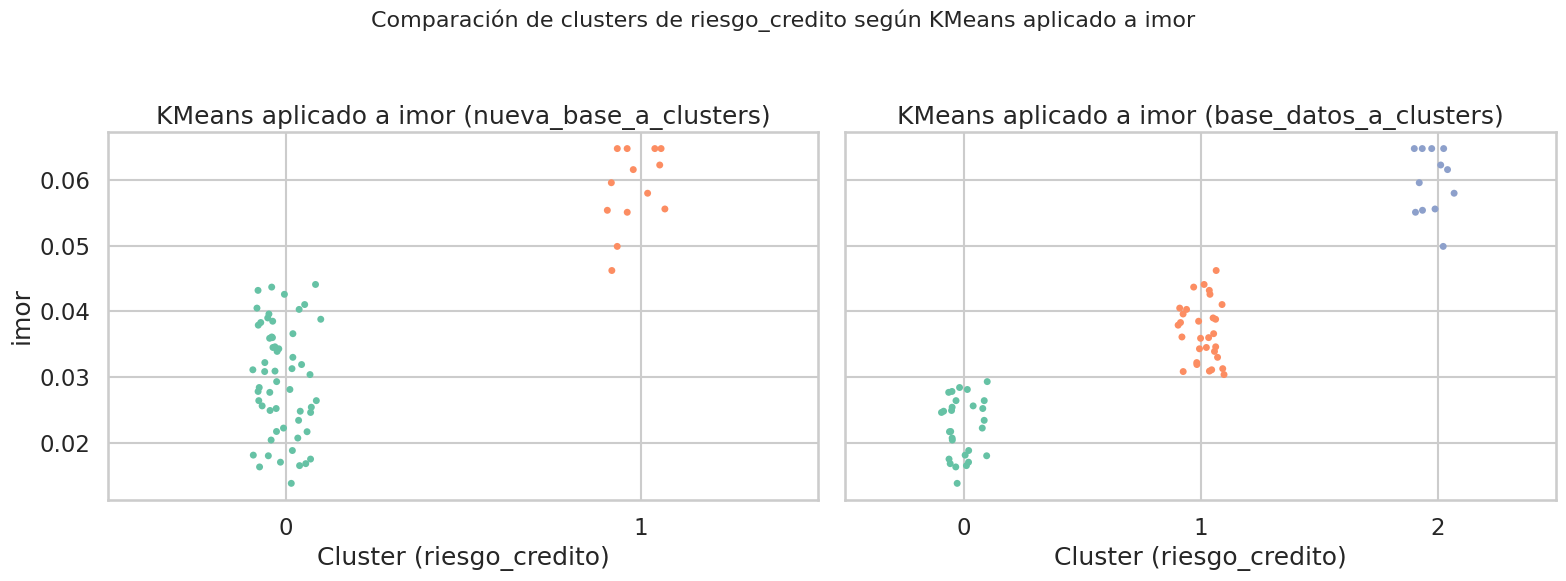

In [41]:
# Ignorar los FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear figura con 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Primer gráfico: nueva_base_a_clusters
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_a_clusters,
    jitter=True, palette="Set2", ax=axes[0]
)
axes[0].set_title("KMeans aplicado a imor (nueva_base_a_clusters)")
axes[0].set_xlabel("Cluster (riesgo_credito)")
axes[0].set_ylabel("imor")
axes[0].grid(True)

# Segundo gráfico: base_datos_a_clusters
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_a_clusters,
    jitter=True, palette="Set2", ax=axes[1]
)
axes[1].set_title("KMeans aplicado a imor (base_datos_a_clusters)")
axes[1].set_xlabel("Cluster (riesgo_credito)")
axes[1].set_ylabel("")  # Ya lo muestra el primero
axes[1].grid(True)

# Título general
fig.suptitle("Comparación de clusters de riesgo_credito según KMeans aplicado a imor", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título

plt.show()

Estas bases nuevas presentan un problema de desbalanceo de clases, por lo que se propone la creación de 2 nuevas bases de datos con clases riesgo_crédito balanceada usando el método SMOTE.

In [42]:
#Nueva base de datos con k = 3 riesgo_credito balanceada SMOTE

# Asegúrate de que riesgo_credito es numérica
y = base_datos_a_clusters["riesgo_credito"].astype(int)
X = base_datos_a_clusters.drop("riesgo_credito", axis=1)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Crear DataFrame balanceado
base_datos_a_balanceada = pd.DataFrame(X_balanced, columns=X.columns)
base_datos_a_balanceada["riesgo_credito"] = y_balanced.astype(object)  # Convertir de nuevo a string si lo deseas

# Verificar distribución
print(base_datos_a_balanceada["riesgo_credito"].value_counts())
base_datos_a_balanceada.head(10)


riesgo_credito
0    30
1    30
2    30
Name: count, dtype: int64


var_pib_real  tasa_activa  tasa_pasiva  desempleo  deuda_publica/pib  \
0      0.016396     0.105325       0.0561   0.070583             0.2948   
1      0.009231     0.105325       0.0564   0.060655             0.3049   
2      0.026183     0.104300       0.0596   0.068631             0.2180   
3      0.013584     0.095900       0.0545   0.063887             0.2120   
4      0.016696     0.093100       0.0529   0.070551             0.2100   
5      0.010568     0.091400       0.0509   0.073098             0.2220   
6     -0.001766     0.092400       0.0531   0.085821             0.2270   
7     -0.004575     0.092400       0.0563   0.083447             0.1600   
8     -0.004908     0.091500       0.0557   0.090642             0.1680   
9     -0.003637     0.091900       0.0524   0.078928             0.1640   

   inflacion  liquidez_monetaria  reservas_encaje  reservas_internacionales  \
0   0.012043        13120.844642       535.810000               3611.123821   
1   0.012079        14318.343231       692.240000               3520.839814   
2   0.027990        14586.299642       671.149702               4143.540000   
3   0.027990        15440.572330       724.400052               6103.122911   
4   0.014619        16239.899157       634.303994               6511.445580   
5   0.001630        17461.111217      1239.022475               4472.809601   
6   0.022810        16450.974232       552.711737               3244.072594   
7   0.005692        16642.075088       746.288704               2675.015536   
8   0.002531        16871.393032       806.450341               4624.709272   
9   0.011521        18988.978915      1702.566804               3792.050944   

   balanza_comercial    imor riesgo_credito  
0         421.406568  0.0168              0  
1         -50.212382  0.0138              0  
2         207.322440  0.0207              0  
3         292.131890  0.0165              0  
4        -218.685900  0.0181              0  
5        -546.971943  0.0163              0  
6        -133.553894  0.0264              0  
7         121.484485  0.0319              1  
8         -46.804102  0.0359              1  
9          21.782750  0.0284              0

In [43]:
# Contar la cantidad de cada categoría
conteo = base_datos_a_balanceada["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     30           33.33
1                     30           33.33
2                     30           33.33

In [44]:
#Nueva base de datos con k = 2 riesgo_credito balanceada SMOTE

# Definir las características y la variable objetivo
X = nueva_base_a_clusters.drop("riesgo_credito", axis=1)  # Características
y = nueva_base_a_clusters["riesgo_credito"].astype(int)  # Variable objetivo

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Crear el DataFrame balanceado
nueva_base_a_balanceada = X_balanced.copy()
nueva_base_a_balanceada["riesgo_credito"] = y_balanced.astype(object)

# Verificar la nueva distribución de clases
print(pd.Series(y_balanced).value_counts())

# Mostrar los primeros registros para verificar
nueva_base_a_balanceada.head(10)

riesgo_credito
0    57
1    57
Name: count, dtype: int64


var_pib_real  tasa_activa  tasa_pasiva  desempleo  deuda_publica/pib  \
0      0.016396     0.105325       0.0561   0.070583             0.2948   
1      0.009231     0.105325       0.0564   0.060655             0.3049   
2      0.026183     0.104300       0.0596   0.068631             0.2180   
3      0.013584     0.095900       0.0545   0.063887             0.2120   
4      0.016696     0.093100       0.0529   0.070551             0.2100   
5      0.010568     0.091400       0.0509   0.073098             0.2220   
6     -0.001766     0.092400       0.0531   0.085821             0.2270   
7     -0.004575     0.092400       0.0563   0.083447             0.1600   
8     -0.004908     0.091500       0.0557   0.090642             0.1680   
9     -0.003637     0.091900       0.0524   0.078928             0.1640   

   inflacion  liquidez_monetaria  reservas_encaje  reservas_internacionales  \
0   0.012043        13120.844642       535.810000               3611.123821   
1   0.012079        14318.343231       692.240000               3520.839814   
2   0.027990        14586.299642       671.149702               4143.540000   
3   0.027990        15440.572330       724.400052               6103.122911   
4   0.014619        16239.899157       634.303994               6511.445580   
5   0.001630        17461.111217      1239.022475               4472.809601   
6   0.022810        16450.974232       552.711737               3244.072594   
7   0.005692        16642.075088       746.288704               2675.015536   
8   0.002531        16871.393032       806.450341               4624.709272   
9   0.011521        18988.978915      1702.566804               3792.050944   

   balanza_comercial    imor riesgo_credito  
0         421.406568  0.0168              0  
1         -50.212382  0.0138              0  
2         207.322440  0.0207              0  
3         292.131890  0.0165              0  
4        -218.685900  0.0181              0  
5        -546.971943  0.0163              0  
6        -133.553894  0.0264              0  
7         121.484485  0.0319              0  
8         -46.804102  0.0359              0  
9          21.782750  0.0284              0

In [45]:
# Contar la cantidad de cada categoría
conteo = nueva_base_a_balanceada["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     57            50.0
1                     57            50.0

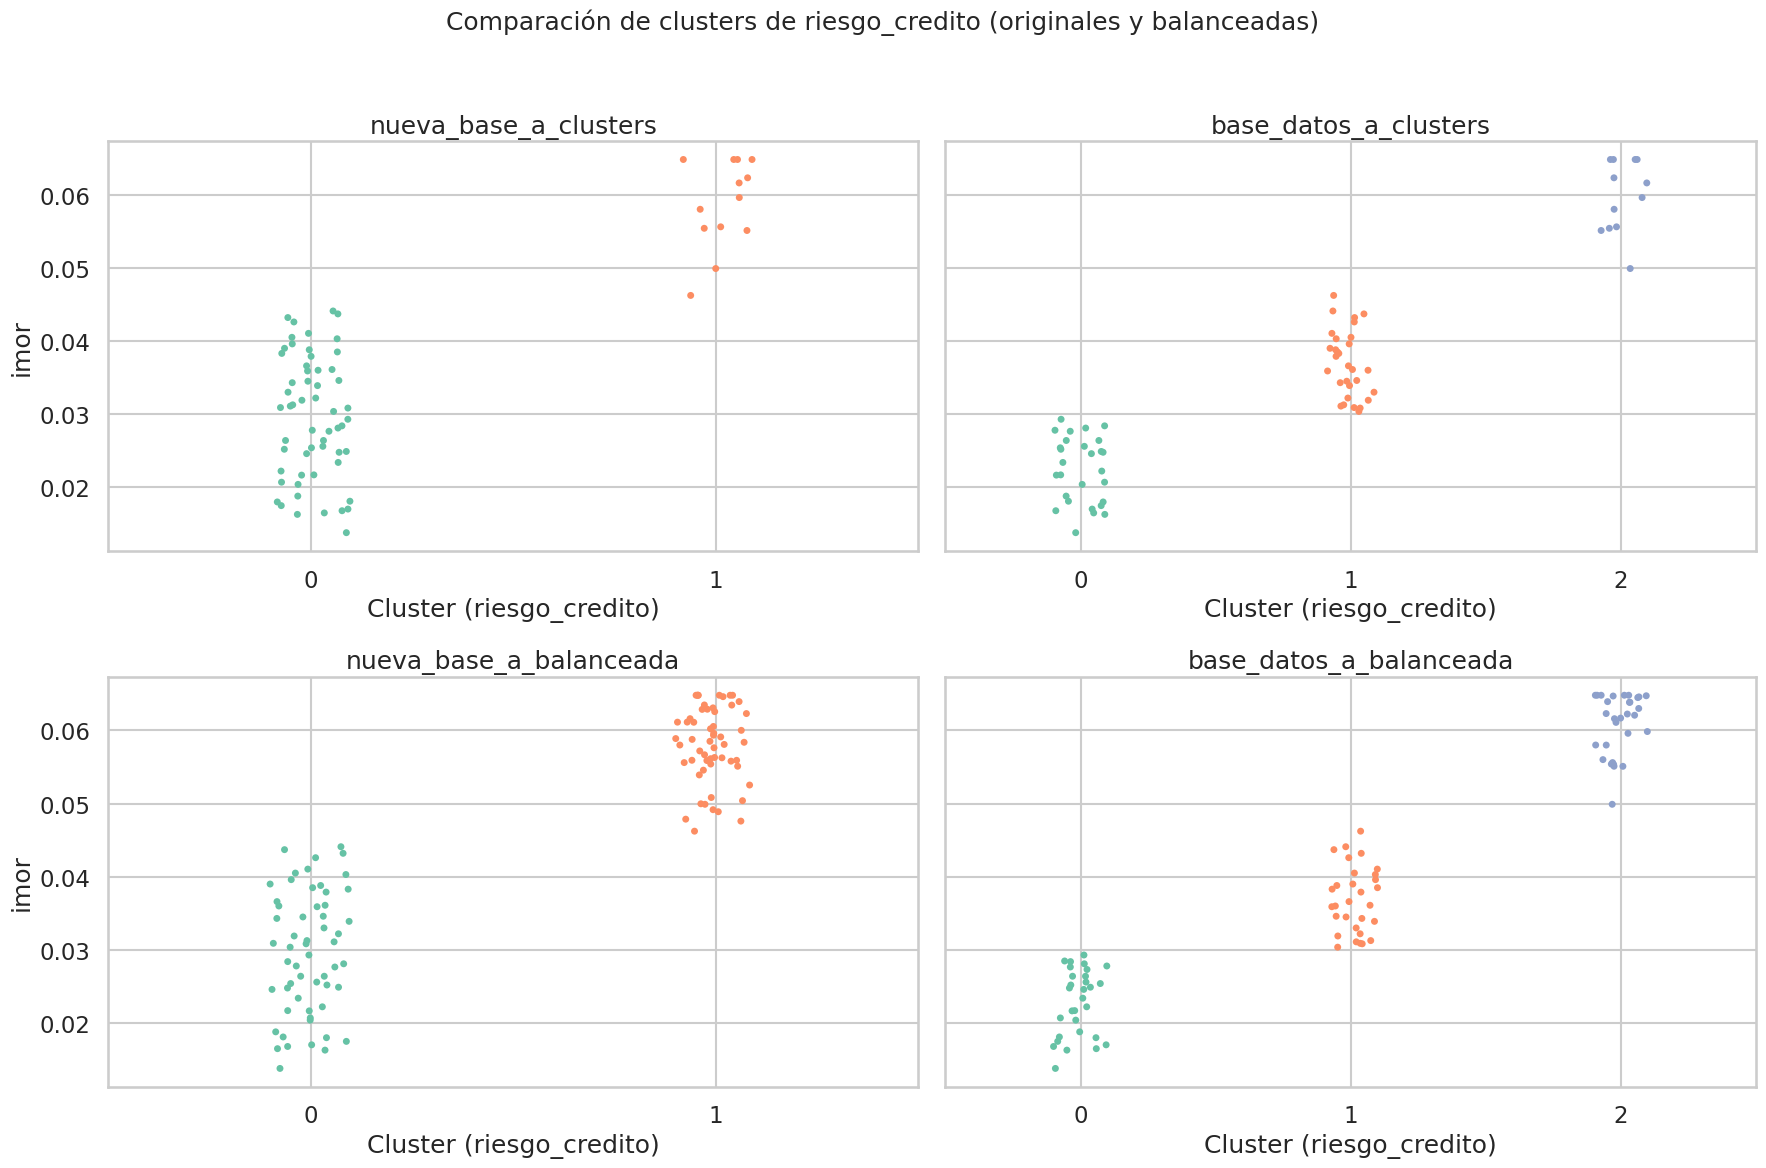

In [46]:
# Ignorar los FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)

# Primer gráfico: nueva_base_a_clusters
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_a_clusters,
    jitter=True, palette="Set2", ax=axes[0, 0]
)
axes[0, 0].set_title("nueva_base_a_clusters")
axes[0, 0].set_xlabel("Cluster (riesgo_credito)")
axes[0, 0].set_ylabel("imor")
axes[0, 0].grid(True)

# Segundo gráfico: base_datos_a_clusters
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_a_clusters,
    jitter=True, palette="Set2", ax=axes[0, 1]
)
axes[0, 1].set_title("base_datos_a_clusters")
axes[0, 1].set_xlabel("Cluster (riesgo_credito)")
axes[0, 1].set_ylabel("")
axes[0, 1].grid(True)

# Tercer gráfico: nueva_base_a_balanceada
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_a_balanceada,
    jitter=True, palette="Set2", ax=axes[1, 0]
)
axes[1, 0].set_title("nueva_base_a_balanceada")
axes[1, 0].set_xlabel("Cluster (riesgo_credito)")
axes[1, 0].set_ylabel("imor")
axes[1, 0].grid(True)

# Cuarto gráfico: base_datos_a_balanceada
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_a_balanceada,
    jitter=True, palette="Set2", ax=axes[1, 1]
)
axes[1, 1].set_title("base_datos_a_balanceada")
axes[1, 1].set_xlabel("Cluster (riesgo_credito)")
axes[1, 1].set_ylabel("")
axes[1, 1].grid(True)

# Título general
fig.suptitle("Comparación de clusters de riesgo_credito (originales y balanceadas)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste para título superior

plt.show()

In [47]:
# Usamos la variable 'imor' para crear las categorías en base a sus cuantiles
# Definimos los cuantiles de la variable 'imor' en 3 grupos (0, 1, 2)
quantiles = pd.qcut(base_datos_a['imor'], q=3, labels=[0, 1, 2])

# Creamos la nueva columna 'riesgo_credito' con las categorías de riesgo
base_datos_a_cuantiles = base_datos_a.copy()  # Crear una copia para no modificar la base original
base_datos_a_cuantiles['riesgo_credito'] = quantiles.astype(object)

# Verificar las primeras filas de la nueva base de datos con la columna 'riesgo_credito'
base_datos_a_cuantiles.head()

var_pib_real  tasa_activa  tasa_pasiva  desempleo  deuda_publica/pib  \
0      0.016396     0.105325       0.0561   0.070583             0.2948   
1      0.009231     0.105325       0.0564   0.060655             0.3049   
2      0.026183     0.104300       0.0596   0.068631             0.2180   
3      0.013584     0.095900       0.0545   0.063887             0.2120   
4      0.016696     0.093100       0.0529   0.070551             0.2100   

   inflacion  liquidez_monetaria  reservas_encaje  reservas_internacionales  \
0   0.012043        13120.844642       535.810000               3611.123821   
1   0.012079        14318.343231       692.240000               3520.839814   
2   0.027990        14586.299642       671.149702               4143.540000   
3   0.027990        15440.572330       724.400052               6103.122911   
4   0.014619        16239.899157       634.303994               6511.445580   

   balanza_comercial    imor riesgo_credito  
0         421.406568  0.0168              0  
1         -50.212382  0.0138              0  
2         207.322440  0.0207              0  
3         292.131890  0.0165              0  
4        -218.685900  0.0181              0

In [48]:
# Contar la cantidad de cada categoría
conteo = base_datos_a_cuantiles["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     23           32.86
1                     24           34.29
2                     23           32.86

In [49]:
# Usamos la variable 'imor' para crear las categorías en base a sus cuantiles
# Definimos los cuantiles de la variable 'imor' en 2 grupos (0, 1)
quantiles = pd.qcut(base_datos_a['imor'], q=2, labels=[0, 1])

# Creamos la nueva columna 'riesgo_credito' con las categorías de riesgo
nueva_base_a_cuantiles = base_datos_a.copy()  # Crear una copia para no modificar la base original
nueva_base_a_cuantiles['riesgo_credito'] = quantiles.astype(object)

# Verificar las primeras filas de la nueva base de datos con la columna 'riesgo_credito'
nueva_base_a_cuantiles.head()

var_pib_real  tasa_activa  tasa_pasiva  desempleo  deuda_publica/pib  \
0      0.016396     0.105325       0.0561   0.070583             0.2948   
1      0.009231     0.105325       0.0564   0.060655             0.3049   
2      0.026183     0.104300       0.0596   0.068631             0.2180   
3      0.013584     0.095900       0.0545   0.063887             0.2120   
4      0.016696     0.093100       0.0529   0.070551             0.2100   

   inflacion  liquidez_monetaria  reservas_encaje  reservas_internacionales  \
0   0.012043        13120.844642       535.810000               3611.123821   
1   0.012079        14318.343231       692.240000               3520.839814   
2   0.027990        14586.299642       671.149702               4143.540000   
3   0.027990        15440.572330       724.400052               6103.122911   
4   0.014619        16239.899157       634.303994               6511.445580   

   balanza_comercial    imor riesgo_credito  
0         421.406568  0.0168              0  
1         -50.212382  0.0138              0  
2         207.322440  0.0207              0  
3         292.131890  0.0165              0  
4        -218.685900  0.0181              0

In [50]:
# Contar la cantidad de cada categoría
conteo = nueva_base_a_cuantiles["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     35            50.0
1                     35            50.0

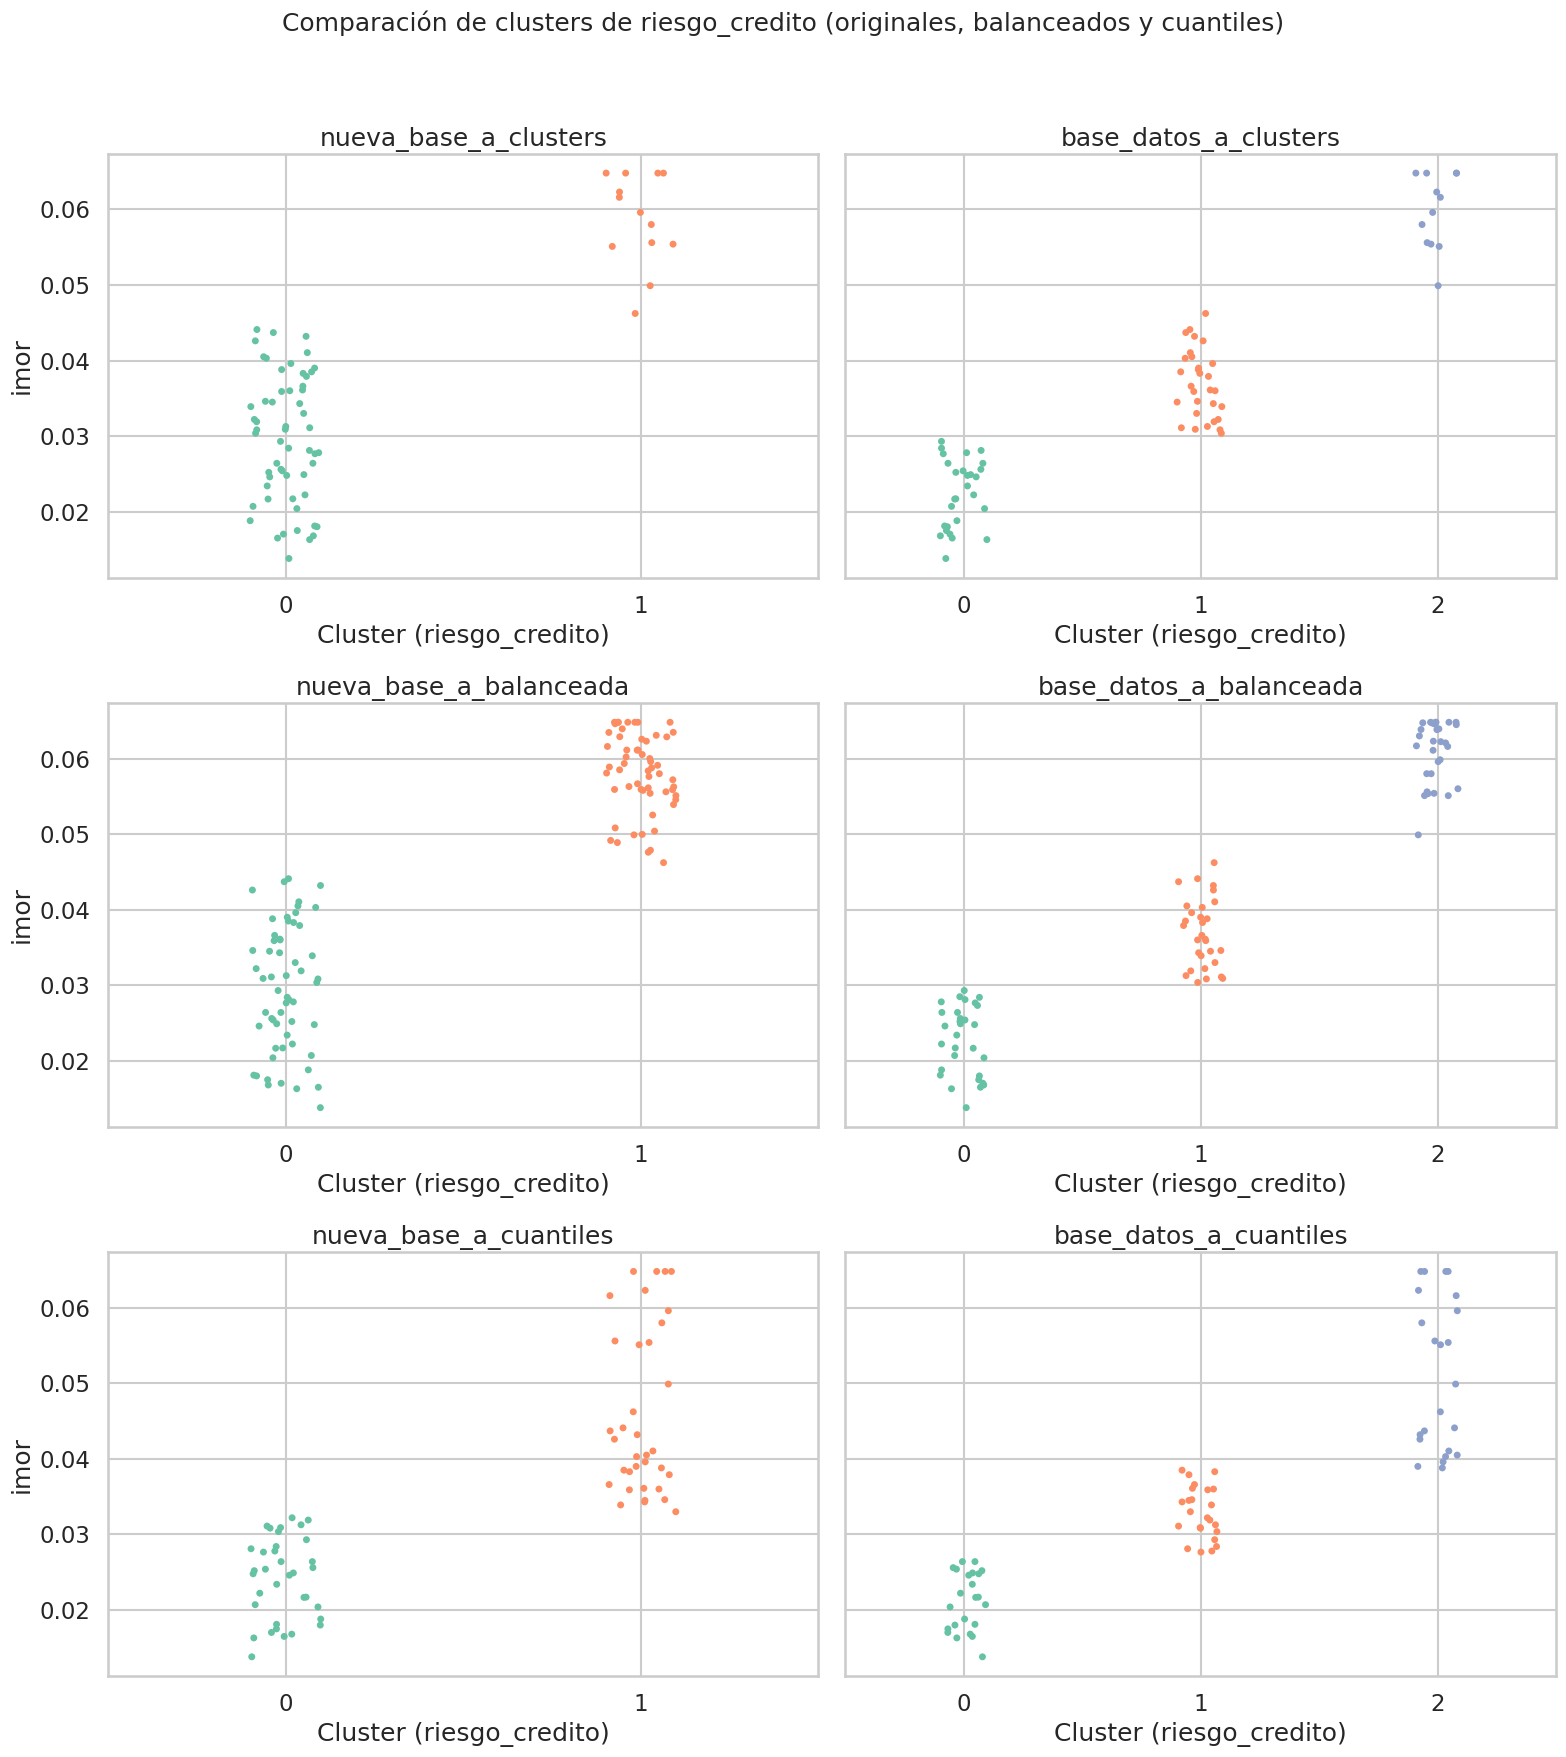

In [51]:
# Ignorar los FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear figura con 2 columnas y 3 filas
fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=True)

# Primer gráfico: nueva_base_a_clusters (izquierda)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_a_clusters,
    jitter=True, palette="Set2", ax=axes[0, 0]
)
axes[0, 0].set_title("nueva_base_a_clusters")
axes[0, 0].set_xlabel("Cluster (riesgo_credito)")
axes[0, 0].set_ylabel("imor")
axes[0, 0].grid(True)

# Segundo gráfico: base_datos_a_clusters (derecha)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_a_clusters,
    jitter=True, palette="Set2", ax=axes[0, 1]
)
axes[0, 1].set_title("base_datos_a_clusters")
axes[0, 1].set_xlabel("Cluster (riesgo_credito)")
axes[0, 1].set_ylabel("")
axes[0, 1].grid(True)

# Tercer gráfico: nueva_base_a_balanceada (izquierda)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_a_balanceada,
    jitter=True, palette="Set2", ax=axes[1, 0]
)
axes[1, 0].set_title("nueva_base_a_balanceada")
axes[1, 0].set_xlabel("Cluster (riesgo_credito)")
axes[1, 0].set_ylabel("imor")
axes[1, 0].grid(True)

# Cuarto gráfico: base_datos_a_balanceada (derecha)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_a_balanceada,
    jitter=True, palette="Set2", ax=axes[1, 1]
)
axes[1, 1].set_title("base_datos_a_balanceada")
axes[1, 1].set_xlabel("Cluster (riesgo_credito)")
axes[1, 1].set_ylabel("")
axes[1, 1].grid(True)

# Quinto gráfico: nueva_base_a_cuantiles (izquierda)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_a_cuantiles,
    jitter=True, palette="Set2", ax=axes[2, 0]
)
axes[2, 0].set_title("nueva_base_a_cuantiles")
axes[2, 0].set_xlabel("Cluster (riesgo_credito)")
axes[2, 0].set_ylabel("imor")
axes[2, 0].grid(True)

# Sexto gráfico: base_datos_a_cuantiles (derecha)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_a_cuantiles,
    jitter=True, palette="Set2", ax=axes[2, 1]
)
axes[2, 1].set_title("base_datos_a_cuantiles")
axes[2, 1].set_xlabel("Cluster (riesgo_credito)")
axes[2, 1].set_ylabel("")
axes[2, 1].grid(True)

# Título general
fig.suptitle("Comparación de clusters de riesgo_credito (originales, balanceados y cuantiles)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

En total se crearon 12 bases de datos. La siguiente etapa es hacer lo mismo pero partiendo de la base_b, aquella que posee menos variables porque no tiene problemas graves de multicolinealidad.

In [52]:
#A continuación se crea la variable categórica riesgo_credito con k = 3

# Seleccionar la variable "imor" como DataFrame
imor_data = base_datos_b[["imor"]]

# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(imor_data)

# Obtener centros de los clusters y ordenarlos
centros = kmeans.cluster_centers_.flatten()
orden_clusters = np.argsort(centros)

# Crear un diccionario de mapeo para los nuevos valores
mapa_clusters = {original: nuevo for nuevo, original in enumerate(orden_clusters)}

# Asignar etiquetas reordenadas
base_datos_b_clusters = base_datos_b.copy()
base_datos_b_clusters["riesgo_credito"] = [mapa_clusters[etiqueta] for etiqueta in kmeans.labels_]
base_datos_b_clusters["riesgo_credito"] = base_datos_b_clusters["riesgo_credito"].astype(object)

# Mostrar resultados
base_datos_b_clusters.head(10)

var_pib_real  desempleo  inflacion  balanza_comercial    imor  \
0      0.016396   0.070583   0.012043         421.406568  0.0168   
1      0.009231   0.060655   0.012079         -50.212382  0.0138   
2      0.026183   0.068631   0.027990         207.322440  0.0207   
3      0.013584   0.063887   0.027990         292.131890  0.0165   
4      0.016696   0.070551   0.014619        -218.685900  0.0181   
5      0.010568   0.073098   0.001630        -546.971943  0.0163   
6     -0.001766   0.085821   0.022810        -133.553894  0.0264   
7     -0.004575   0.083447   0.005692         121.484485  0.0319   
8     -0.004908   0.090642   0.002531         -46.804102  0.0359   
9     -0.003637   0.078928   0.011521          21.782750  0.0284   

  riesgo_credito  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              1  
8              1  
9              0

In [53]:
# Contar la cantidad de cada categoría
conteo = base_datos_b_clusters["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     28           40.00
1                     30           42.86
2                     12           17.14

In [54]:
#A continuación se crea la variable categórica riesgo_credito con k = 2

# Seleccionar la variable "imor" como DataFrame
imor_data = base_datos_b[["imor"]]

# Aplicar KMeans con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(imor_data)

# Obtener centros de los clusters y ordenarlos
centros = kmeans.cluster_centers_.flatten()
orden_clusters = np.argsort(centros)

# Crear un diccionario de mapeo para los nuevos valores
mapa_clusters = {original: nuevo for nuevo, original in enumerate(orden_clusters)}

# Asignar etiquetas reordenadas
nueva_base_b_clusters = base_datos_b.copy()
nueva_base_b_clusters["riesgo_credito"] = [mapa_clusters[etiqueta] for etiqueta in kmeans.labels_]
nueva_base_b_clusters["riesgo_credito"] = nueva_base_b_clusters["riesgo_credito"].astype(object)

# Mostrar resultados
nueva_base_b_clusters.head(10)

var_pib_real  desempleo  inflacion  balanza_comercial    imor  \
0      0.016396   0.070583   0.012043         421.406568  0.0168   
1      0.009231   0.060655   0.012079         -50.212382  0.0138   
2      0.026183   0.068631   0.027990         207.322440  0.0207   
3      0.013584   0.063887   0.027990         292.131890  0.0165   
4      0.016696   0.070551   0.014619        -218.685900  0.0181   
5      0.010568   0.073098   0.001630        -546.971943  0.0163   
6     -0.001766   0.085821   0.022810        -133.553894  0.0264   
7     -0.004575   0.083447   0.005692         121.484485  0.0319   
8     -0.004908   0.090642   0.002531         -46.804102  0.0359   
9     -0.003637   0.078928   0.011521          21.782750  0.0284   

  riesgo_credito  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

In [55]:
# Contar la cantidad de cada categoría
conteo = nueva_base_b_clusters["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     57           81.43
1                     13           18.57

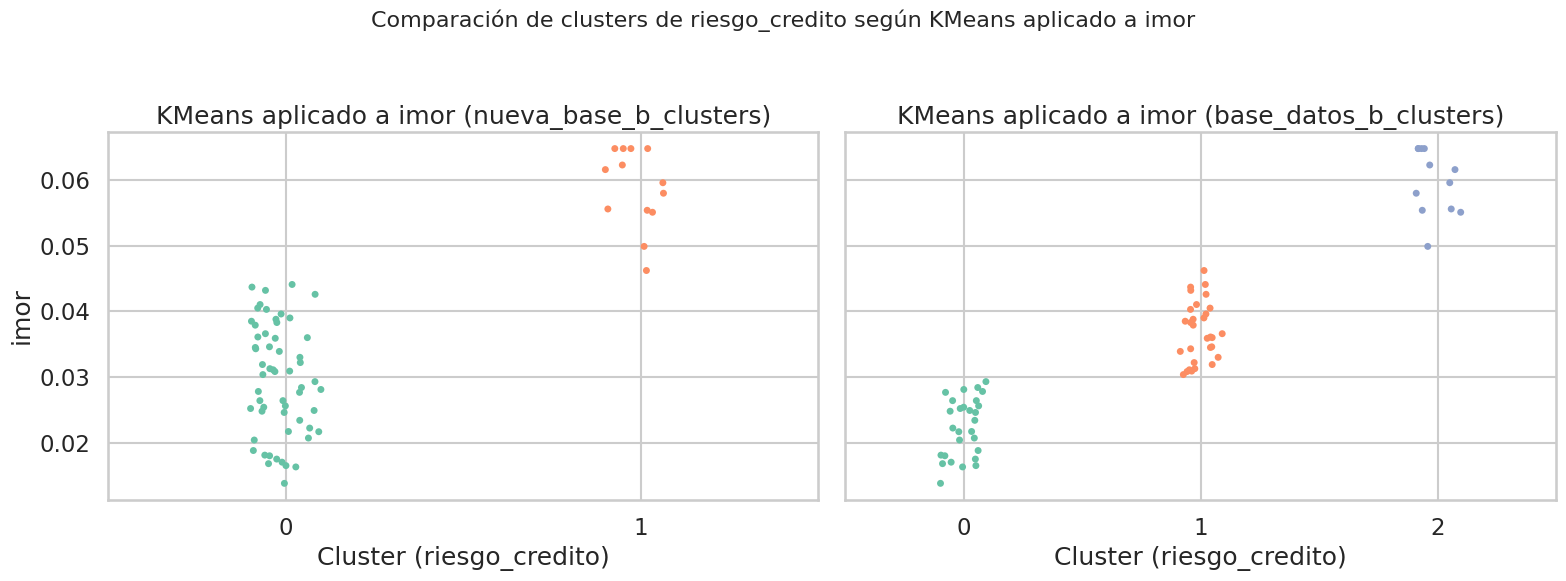

In [56]:
# Ignorar los FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear figura con 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Primer gráfico: nueva_base_b_clusters
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_b_clusters,
    jitter=True, palette="Set2", ax=axes[0]
)
axes[0].set_title("KMeans aplicado a imor (nueva_base_b_clusters)")
axes[0].set_xlabel("Cluster (riesgo_credito)")
axes[0].set_ylabel("imor")
axes[0].grid(True)

# Segundo gráfico: base_datos_b_clusters
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_b_clusters,
    jitter=True, palette="Set2", ax=axes[1]
)
axes[1].set_title("KMeans aplicado a imor (base_datos_b_clusters)")
axes[1].set_xlabel("Cluster (riesgo_credito)")
axes[1].set_ylabel("")  # Ya lo muestra el primero
axes[1].grid(True)

# Título general
fig.suptitle("Comparación de clusters de riesgo_credito según KMeans aplicado a imor", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título

plt.show()

In [57]:
#Nueva base de datos con k = 3 riesgo_credito balanceada SMOTE

# Asegúrate de que riesgo_credito es numérica
y = base_datos_b_clusters["riesgo_credito"].astype(int)
X = base_datos_b_clusters.drop("riesgo_credito", axis=1)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Crear DataFrame balanceado
base_datos_b_balanceada = pd.DataFrame(X_balanced, columns=X.columns)
base_datos_b_balanceada["riesgo_credito"] = y_balanced.astype(object)  # Convertir de nuevo a string si lo deseas

# Verificar distribución
print(base_datos_b_balanceada["riesgo_credito"].value_counts())
base_datos_b_balanceada.head(10)

riesgo_credito
0    30
1    30
2    30
Name: count, dtype: int64


var_pib_real  desempleo  inflacion  balanza_comercial    imor  \
0      0.016396   0.070583   0.012043         421.406568  0.0168   
1      0.009231   0.060655   0.012079         -50.212382  0.0138   
2      0.026183   0.068631   0.027990         207.322440  0.0207   
3      0.013584   0.063887   0.027990         292.131890  0.0165   
4      0.016696   0.070551   0.014619        -218.685900  0.0181   
5      0.010568   0.073098   0.001630        -546.971943  0.0163   
6     -0.001766   0.085821   0.022810        -133.553894  0.0264   
7     -0.004575   0.083447   0.005692         121.484485  0.0319   
8     -0.004908   0.090642   0.002531         -46.804102  0.0359   
9     -0.003637   0.078928   0.011521          21.782750  0.0284   

  riesgo_credito  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              1  
8              1  
9              0

In [58]:
# Contar la cantidad de cada categoría
conteo = base_datos_b_balanceada["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     30           33.33
1                     30           33.33
2                     30           33.33

In [59]:
#Nueva base de datos con k = 2 riesgo_credito balanceada SMOTE

# Asegúrate de que riesgo_credito es numérica
y = nueva_base_b_clusters["riesgo_credito"].astype(int)
X = nueva_base_b_clusters.drop("riesgo_credito", axis=1)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Crear DataFrame balanceado
nueva_base_b_balanceada = pd.DataFrame(X_balanced, columns=X.columns)
nueva_base_b_balanceada["riesgo_credito"] = y_balanced.astype(object)  # Convertir de nuevo a string si lo deseas

# Verificar distribución
print(nueva_base_b_balanceada["riesgo_credito"].value_counts())
nueva_base_b_balanceada.head(10)

riesgo_credito
0    57
1    57
Name: count, dtype: int64


var_pib_real  desempleo  inflacion  balanza_comercial    imor  \
0      0.016396   0.070583   0.012043         421.406568  0.0168   
1      0.009231   0.060655   0.012079         -50.212382  0.0138   
2      0.026183   0.068631   0.027990         207.322440  0.0207   
3      0.013584   0.063887   0.027990         292.131890  0.0165   
4      0.016696   0.070551   0.014619        -218.685900  0.0181   
5      0.010568   0.073098   0.001630        -546.971943  0.0163   
6     -0.001766   0.085821   0.022810        -133.553894  0.0264   
7     -0.004575   0.083447   0.005692         121.484485  0.0319   
8     -0.004908   0.090642   0.002531         -46.804102  0.0359   
9     -0.003637   0.078928   0.011521          21.782750  0.0284   

  riesgo_credito  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

In [60]:
# Contar la cantidad de cada categoría
conteo = nueva_base_b_balanceada["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     57            50.0
1                     57            50.0

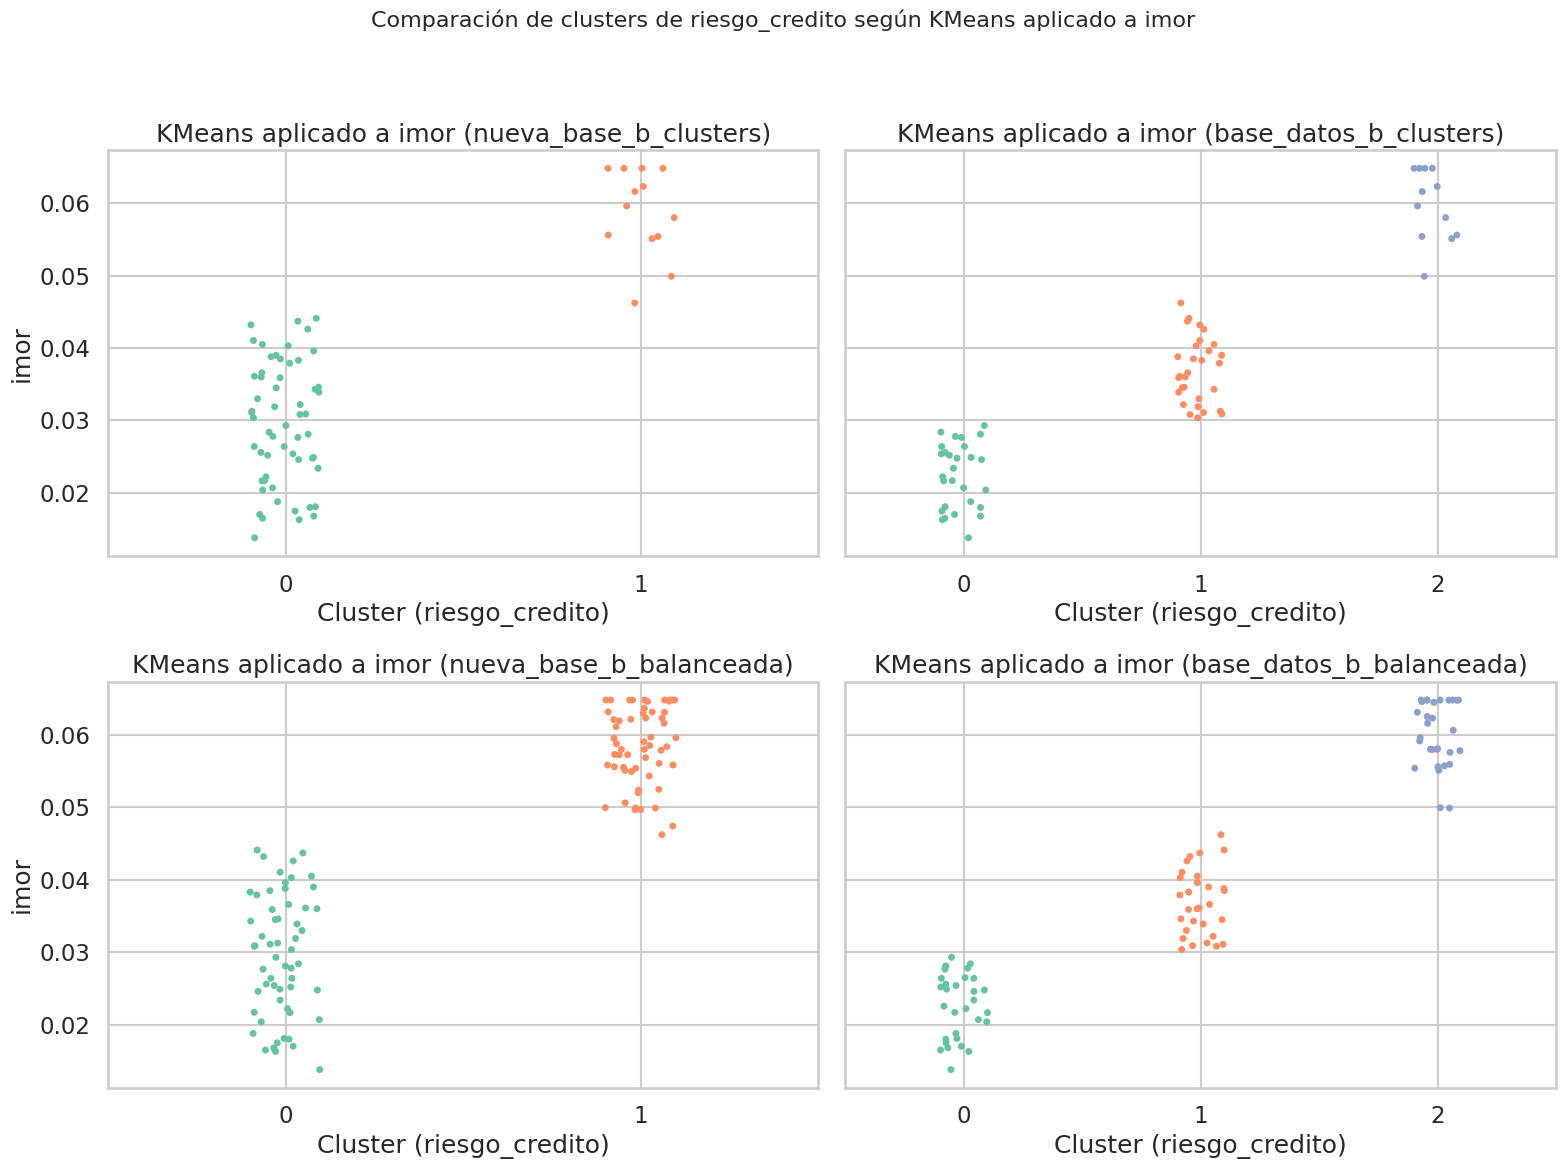

In [61]:
# Ignorar los FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear figura con 2 columnas y 2 filas
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)

# Primer gráfico: nueva_base_b_clusters (columna izquierda)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_b_clusters,
    jitter=True, palette="Set2", ax=axes[0, 0]
)
axes[0, 0].set_title("KMeans aplicado a imor (nueva_base_b_clusters)")
axes[0, 0].set_xlabel("Cluster (riesgo_credito)")
axes[0, 0].set_ylabel("imor")
axes[0, 0].grid(True)

# Segundo gráfico: base_datos_b_clusters (columna derecha)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_b_clusters,
    jitter=True, palette="Set2", ax=axes[0, 1]
)
axes[0, 1].set_title("KMeans aplicado a imor (base_datos_b_clusters)")
axes[0, 1].set_xlabel("Cluster (riesgo_credito)")
axes[0, 1].set_ylabel("")
axes[0, 1].grid(True)

# Tercer gráfico: nueva_base_b_balanceada (columna izquierda)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_b_balanceada,
    jitter=True, palette="Set2", ax=axes[1, 0]
)
axes[1, 0].set_title("KMeans aplicado a imor (nueva_base_b_balanceada)")
axes[1, 0].set_xlabel("Cluster (riesgo_credito)")
axes[1, 0].set_ylabel("imor")
axes[1, 0].grid(True)

# Cuarto gráfico: base_datos_b_balanceada (columna derecha)
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_b_balanceada,
    jitter=True, palette="Set2", ax=axes[1, 1]
)
axes[1, 1].set_title("KMeans aplicado a imor (base_datos_b_balanceada)")
axes[1, 1].set_xlabel("Cluster (riesgo_credito)")
axes[1, 1].set_ylabel("")
axes[1, 1].grid(True)

# Título general
fig.suptitle("Comparación de clusters de riesgo_credito según KMeans aplicado a imor", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título

plt.show()

In [62]:
# Usamos la variable 'imor' para crear las categorías en base a sus cuantiles
# Definimos los cuantiles de la variable 'imor' en 3 grupos (0, 1, 2)
quantiles = pd.qcut(base_datos_b['imor'], q=3, labels=[0, 1, 2])

# Creamos la nueva columna 'riesgo_credito' con las categorías de riesgo
base_datos_b_cuantiles = base_datos_b.copy()  # Crear una copia para no modificar la base original
base_datos_b_cuantiles['riesgo_credito'] = quantiles.astype(object)

# Verificar las primeras filas de la nueva base de datos con la columna 'riesgo_credito'
base_datos_b_cuantiles.head()

var_pib_real  desempleo  inflacion  balanza_comercial    imor  \
0      0.016396   0.070583   0.012043         421.406568  0.0168   
1      0.009231   0.060655   0.012079         -50.212382  0.0138   
2      0.026183   0.068631   0.027990         207.322440  0.0207   
3      0.013584   0.063887   0.027990         292.131890  0.0165   
4      0.016696   0.070551   0.014619        -218.685900  0.0181   

  riesgo_credito  
0              0  
1              0  
2              0  
3              0  
4              0

In [63]:
# Contar la cantidad de cada categoría
conteo = base_datos_b_cuantiles["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     23           32.86
1                     24           34.29
2                     23           32.86

In [64]:
# Usamos la variable 'imor' para crear las categorías en base a sus cuantiles
# Definimos los cuantiles de la variable 'imor' en 2 grupos (0, 1)
quantiles = pd.qcut(base_datos_b['imor'], q=2, labels=[0, 1])

# Creamos la nueva columna 'riesgo_credito' con las categorías de riesgo
nueva_base_b_cuantiles = base_datos_b.copy()  # Crear una copia para no modificar la base original
nueva_base_b_cuantiles['riesgo_credito'] = quantiles.astype(object)

# Verificar las primeras filas de la nueva base de datos con la columna 'riesgo_credito'
base_datos_b_cuantiles.head()

var_pib_real  desempleo  inflacion  balanza_comercial    imor  \
0      0.016396   0.070583   0.012043         421.406568  0.0168   
1      0.009231   0.060655   0.012079         -50.212382  0.0138   
2      0.026183   0.068631   0.027990         207.322440  0.0207   
3      0.013584   0.063887   0.027990         292.131890  0.0165   
4      0.016696   0.070551   0.014619        -218.685900  0.0181   

  riesgo_credito  
0              0  
1              0  
2              0  
3              0  
4              0

In [65]:
# Contar la cantidad de cada categoría
conteo = nueva_base_b_cuantiles["riesgo_credito"].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Crear la tabla resumen
tabla_riesgo = pd.DataFrame({
    "Cantidad": conteo,
    "Porcentaje (%)": porcentaje.round(2)
})

# Mostrar la tabla
tabla_riesgo

Cantidad  Porcentaje (%)
riesgo_credito                          
0                     35            50.0
1                     35            50.0

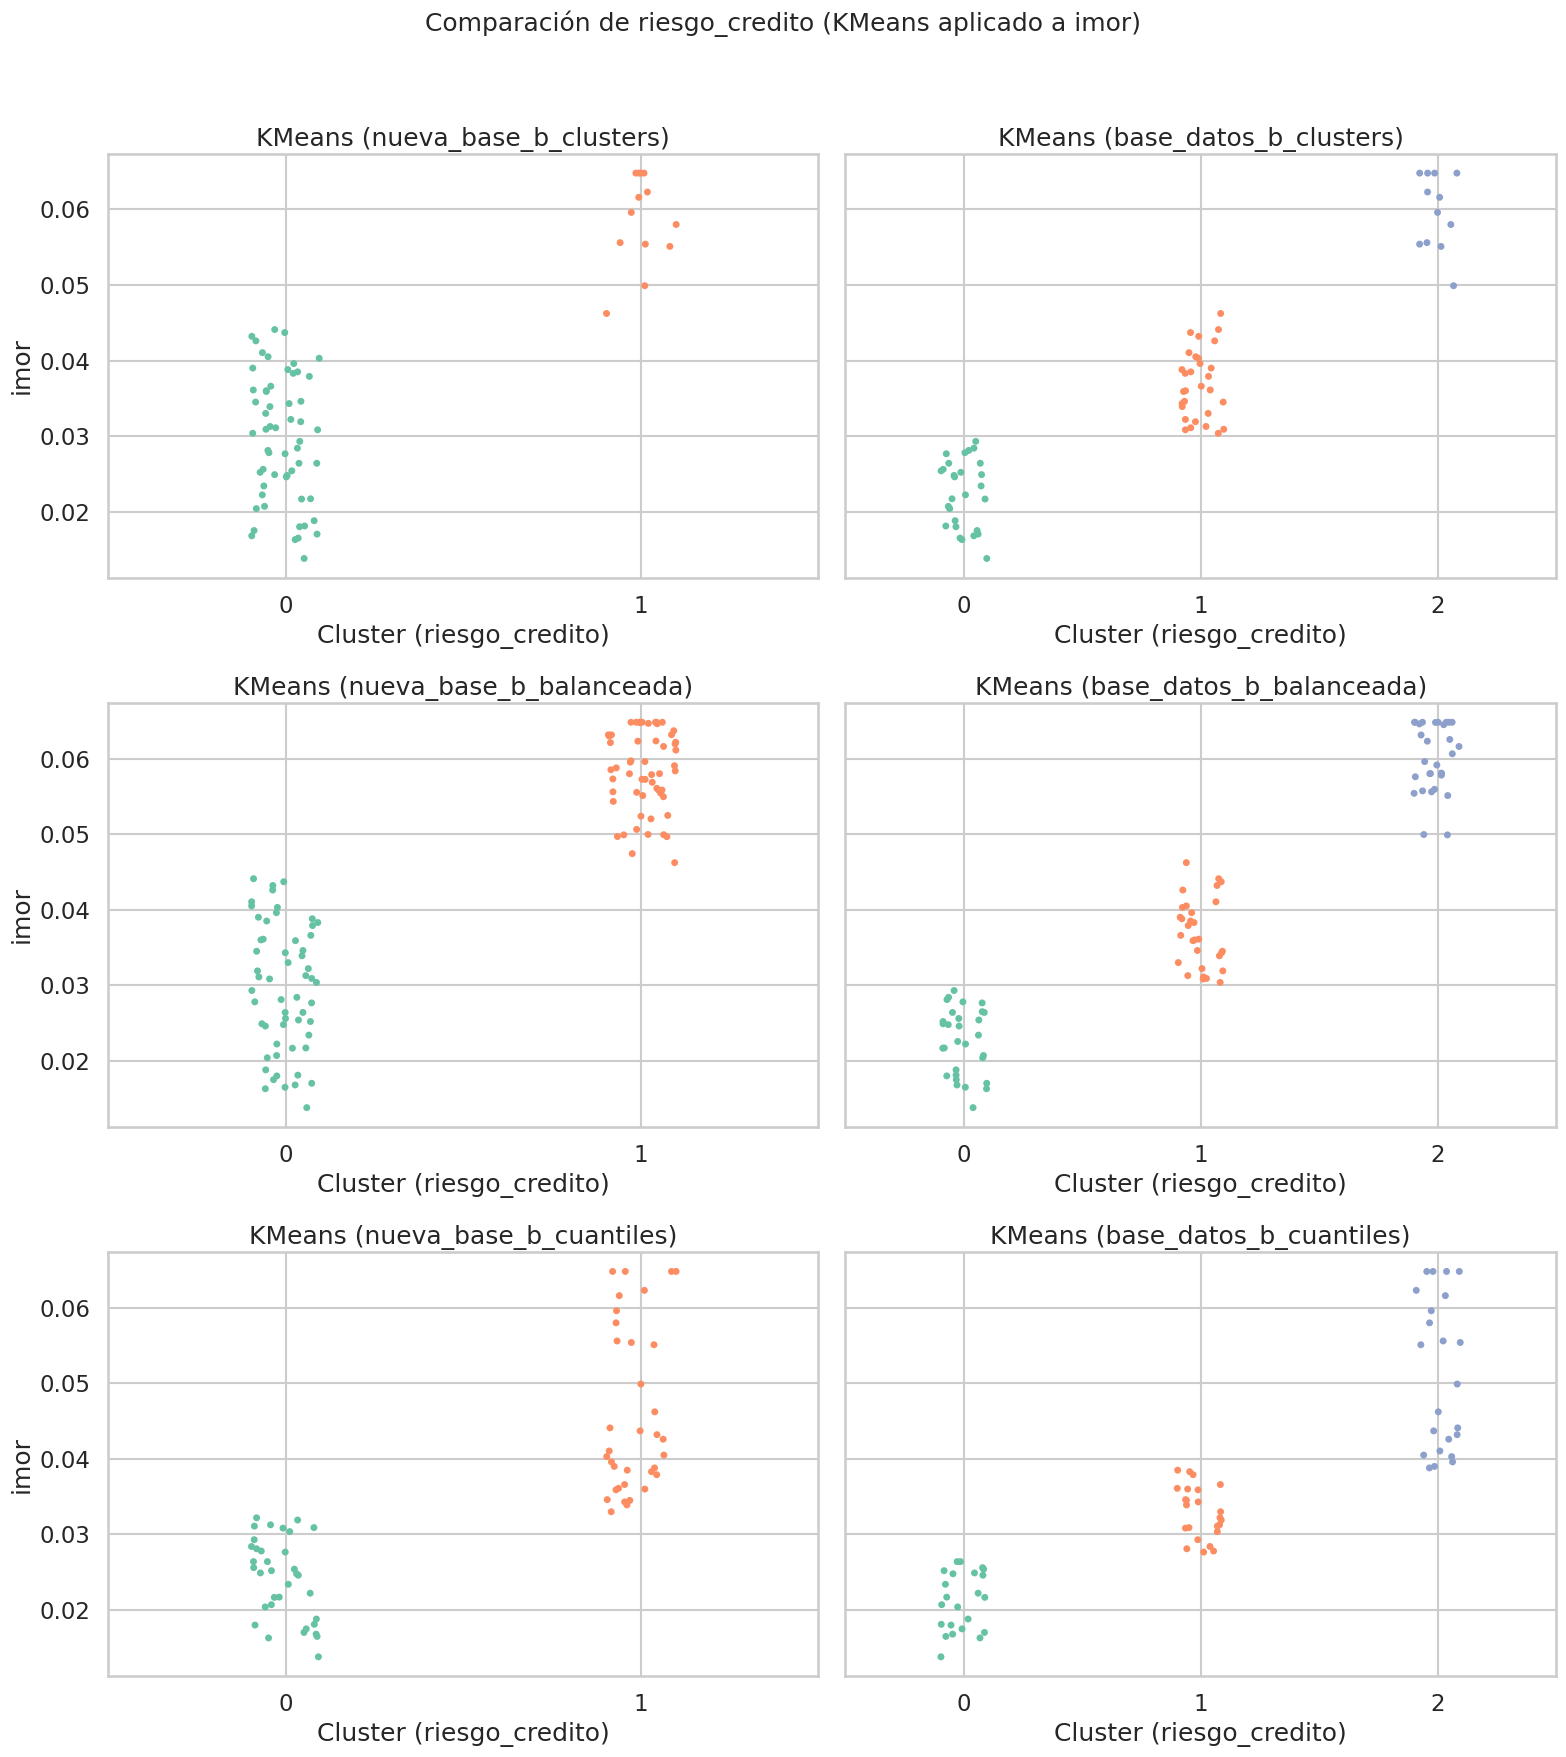

In [66]:
# Ignorar los FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear figura con 2 columnas y 3 filas (6 subplots)
fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=True)

# Fila 1
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_b_clusters,
    jitter=True, palette="Set2", ax=axes[0, 0]
)
axes[0, 0].set_title("KMeans (nueva_base_b_clusters)")
axes[0, 0].set_xlabel("Cluster (riesgo_credito)")
axes[0, 0].set_ylabel("imor")
axes[0, 0].grid(True)

sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_b_clusters,
    jitter=True, palette="Set2", ax=axes[0, 1]
)
axes[0, 1].set_title("KMeans (base_datos_b_clusters)")
axes[0, 1].set_xlabel("Cluster (riesgo_credito)")
axes[0, 1].set_ylabel("")
axes[0, 1].grid(True)

# Fila 2
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_b_balanceada,
    jitter=True, palette="Set2", ax=axes[1, 0]
)
axes[1, 0].set_title("KMeans (nueva_base_b_balanceada)")
axes[1, 0].set_xlabel("Cluster (riesgo_credito)")
axes[1, 0].set_ylabel("imor")
axes[1, 0].grid(True)

sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_b_balanceada,
    jitter=True, palette="Set2", ax=axes[1, 1]
)
axes[1, 1].set_title("KMeans (base_datos_b_balanceada)")
axes[1, 1].set_xlabel("Cluster (riesgo_credito)")
axes[1, 1].set_ylabel("")
axes[1, 1].grid(True)

# Fila 3
sns.stripplot(
    x="riesgo_credito", y="imor",
    data=nueva_base_b_cuantiles,
    jitter=True, palette="Set2", ax=axes[2, 0]
)
axes[2, 0].set_title("KMeans (nueva_base_b_cuantiles)")
axes[2, 0].set_xlabel("Cluster (riesgo_credito)")
axes[2, 0].set_ylabel("imor")
axes[2, 0].grid(True)

sns.stripplot(
    x="riesgo_credito", y="imor",
    data=base_datos_b_cuantiles,
    jitter=True, palette="Set2", ax=axes[2, 1]
)
axes[2, 1].set_title("KMeans (base_datos_b_cuantiles)")
axes[2, 1].set_xlabel("Cluster (riesgo_credito)")
axes[2, 1].set_ylabel("")
axes[2, 1].grid(True)

# Título general
fig.suptitle("Comparación de riesgo_credito (KMeans aplicado a imor)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

Se han creado 12 tablas a partir de las 2 tablas a y b. A continuación, se guardarán con nuevos nombres.

In [67]:
# Crear las nuevas bases eliminando la variable 'imor'
base_1 = base_datos_a_clusters.drop(columns=['imor']).copy()
base_2 = base_datos_a_balanceada.drop(columns=['imor']).copy()
base_3 = base_datos_a_cuantiles.drop(columns=['imor']).copy()
base_4 = base_datos_b_clusters.drop(columns=['imor']).copy()
base_5 = base_datos_b_balanceada.drop(columns=['imor']).copy()
base_6 = base_datos_b_cuantiles.drop(columns=['imor']).copy()
base_1_a = nueva_base_a_clusters.drop(columns=['imor']).copy()
base_2_b = nueva_base_a_balanceada.drop(columns=['imor']).copy()
base_3_c = nueva_base_a_cuantiles.drop(columns=['imor']).copy()
base_4_d = nueva_base_b_clusters.drop(columns=['imor']).copy()
base_5_e = nueva_base_b_balanceada.drop(columns=['imor']).copy()
base_6_f = nueva_base_b_cuantiles.drop(columns=['imor']).copy()

El siguiente paso es normalizar cada una de estas 12 bases por dos métodos, Min-Max y Z-Normalization. Esto dará como resultado 24 bases de datos.

In [68]:
# Función para normalizar solo variables numéricas continuas (excluyendo categóricas)
def normalizar_minmax(df):
    df_normalizada = df.copy()

    # Identificamos columnas numéricas que no sean categóricas
    columnas_a_normalizar = df_normalizada.select_dtypes(include=["float64", "int64"]).columns
    columnas_a_normalizar = [col for col in columnas_a_normalizar if col != "riesgo_credito"]

    # Aplicamos MinMaxScaler solo a las columnas seleccionadas
    scaler = MinMaxScaler()
    df_normalizada[columnas_a_normalizar] = scaler.fit_transform(df_normalizada[columnas_a_normalizar])

    return df_normalizada

# Aplicar la función a cada base
base_1_norm = normalizar_minmax(base_1)
base_2_norm = normalizar_minmax(base_2)
base_3_norm = normalizar_minmax(base_3)
base_4_norm = normalizar_minmax(base_4)
base_5_norm = normalizar_minmax(base_5)
base_6_norm = normalizar_minmax(base_6)
base_1_a_norm = normalizar_minmax(base_1_a)
base_2_b_norm = normalizar_minmax(base_2_b)
base_3_c_norm = normalizar_minmax(base_3_c)
base_4_d_norm = normalizar_minmax(base_4_d)
base_5_e_norm = normalizar_minmax(base_5_e)
base_6_f_norm = normalizar_minmax(base_6_f)

In [69]:
from sklearn.preprocessing import StandardScaler

# Función para normalizar con Z-Score solo variables numéricas continuas (excluyendo categóricas)
def normalizar_zscore(df):
    df_normalizada = df.copy()

    # Identificamos columnas numéricas que no sean categóricas
    columnas_a_normalizar = df_normalizada.select_dtypes(include=["float64", "int64"]).columns
    columnas_a_normalizar = [col for col in columnas_a_normalizar if col != "riesgo_credito"]

    # Aplicamos StandardScaler solo a las columnas seleccionadas
    scaler = StandardScaler()
    df_normalizada[columnas_a_normalizar] = scaler.fit_transform(df_normalizada[columnas_a_normalizar])

    return df_normalizada

# Aplicar la función con nuevos nombres
base_1_norm_z = normalizar_zscore(base_1)
base_2_norm_z = normalizar_zscore(base_2)
base_3_norm_z = normalizar_zscore(base_3)
base_4_norm_z = normalizar_zscore(base_4)
base_5_norm_z = normalizar_zscore(base_5)
base_6_norm_z = normalizar_zscore(base_6)
base_1_a_norm_z = normalizar_zscore(base_1_a)
base_2_b_norm_z = normalizar_zscore(base_2_b)
base_3_c_norm_z = normalizar_zscore(base_3_c)
base_4_d_norm_z = normalizar_zscore(base_4_d)
base_5_e_norm_z = normalizar_zscore(base_5_e)
base_6_f_norm_z = normalizar_zscore(base_6_f)

In [70]:
# Listas de todas las variables a analizar
bases_norm = [
    base_1_norm, base_2_norm, base_3_norm, base_4_norm, base_5_norm, base_6_norm,
    base_1_a_norm, base_2_b_norm, base_3_c_norm, base_4_d_norm, base_5_e_norm, base_6_f_norm
]

bases_norm_z = [
    base_1_norm_z, base_2_norm_z, base_3_norm_z, base_4_norm_z, base_5_norm_z, base_6_norm_z,
    base_1_a_norm_z, base_2_b_norm_z, base_3_c_norm_z, base_4_d_norm_z, base_5_e_norm_z, base_6_f_norm_z
]

nombres_norm = [
    "base_1_norm", "base_2_norm", "base_3_norm", "base_4_norm", "base_5_norm", "base_6_norm",
    "base_1_a_norm", "base_2_b_norm", "base_3_c_norm", "base_4_d_norm", "base_5_e_norm", "base_6_f_norm"
]

nombres_norm_z = [
    "base_1_norm_z", "base_2_norm_z", "base_3_norm_z", "base_4_norm_z", "base_5_norm_z", "base_6_norm_z",
    "base_1_a_norm_z", "base_2_b_norm_z", "base_3_c_norm_z", "base_4_d_norm_z", "base_5_e_norm_z", "base_6_f_norm_z"
]

# Mostrar info de las bases normalizadas min-max
for nombre, df in zip(nombres_norm, bases_norm):
    print(f"\nInformación de {nombre}:")
    df.info()

# Mostrar info de las bases normalizadas z-score
for nombre, df in zip(nombres_norm_z, bases_norm_z):
    print(f"\nInformación de {nombre}:")
    df.info()


Información de base_1_norm:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   var_pib_real              70 non-null     float64
 1   tasa_activa               70 non-null     float64
 2   tasa_pasiva               70 non-null     float64
 3   desempleo                 70 non-null     float64
 4   deuda_publica/pib         70 non-null     float64
 5   inflacion                 70 non-null     float64
 6   liquidez_monetaria        70 non-null     float64
 7   reservas_encaje           70 non-null     float64
 8   reservas_internacionales  70 non-null     float64
 9   balanza_comercial         70 non-null     float64
 10  riesgo_credito            70 non-null     object 
dtypes: float64(10), object(1)
memory usage: 6.1+ KB

Información de base_2_norm:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
D

In [71]:
# Listas de variables y nombres
bases_norm = [
    base_1_norm, base_2_norm, base_3_norm, base_4_norm, base_5_norm, base_6_norm,
    base_1_a_norm, base_2_b_norm, base_3_c_norm, base_4_d_norm, base_5_e_norm, base_6_f_norm
]

bases_norm_z = [
    base_1_norm_z, base_2_norm_z, base_3_norm_z, base_4_norm_z, base_5_norm_z, base_6_norm_z,
    base_1_a_norm_z, base_2_b_norm_z, base_3_c_norm_z, base_4_d_norm_z, base_5_e_norm_z, base_6_f_norm_z
]

nombres_norm = [
    "base_1_norm", "base_2_norm", "base_3_norm", "base_4_norm", "base_5_norm", "base_6_norm",
    "base_1_a_norm", "base_2_b_norm", "base_3_c_norm", "base_4_d_norm", "base_5_e_norm", "base_6_f_norm"
]

nombres_norm_z = [
    "base_1_norm_z", "base_2_norm_z", "base_3_norm_z", "base_4_norm_z", "base_5_norm_z", "base_6_norm_z",
    "base_1_a_norm_z", "base_2_b_norm_z", "base_3_c_norm_z", "base_4_d_norm_z", "base_5_e_norm_z", "base_6_f_norm_z"
]

# Mostrar describe() para min-max
for nombre, df in zip(nombres_norm, bases_norm):
    print(f"\n Estadísticas descriptivas de {nombre}:")
    print(df.describe())

# Mostrar describe() para z-score
for nombre, df in zip(nombres_norm_z, bases_norm_z):
    print(f"\n Estadísticas descriptivas de {nombre}:")
    print(df.describe())


 Estadísticas descriptivas de base_1_norm:
       var_pib_real  tasa_activa  tasa_pasiva  desempleo  deuda_publica/pib  \
count     70.000000    70.000000    70.000000  70.000000          70.000000   
mean       0.506184     0.451591     0.379004   0.299486           0.442894   
std        0.179059     0.250965     0.265933   0.256136           0.304074   
min        0.000000     0.000000     0.000000   0.000000           0.000000   
25%        0.375000     0.309715     0.189394   0.094778           0.143711   
50%        0.517325     0.428050     0.360606   0.215745           0.463325   
75%        0.625000     0.585829     0.513636   0.456867           0.689239   
max        1.000000     1.000000     1.000000   1.000000           1.000000   

       inflacion  liquidez_monetaria  reservas_encaje  \
count  70.000000           70.000000        70.000000   
mean    0.492002            0.418834         0.412473   
std     0.190940            0.284753         0.270484   
min     0.000000

base_1_norm - Mejor K: 20 con precisión promedio: 0.5429
base_2_norm - Mejor K: 2 con precisión promedio: 0.6556
base_3_norm - Mejor K: 1 con precisión promedio: 0.5286
base_4_norm - Mejor K: 20 con precisión promedio: 0.6286
base_5_norm - Mejor K: 15 con precisión promedio: 0.6778
base_6_norm - Mejor K: 17 con precisión promedio: 0.5000
base_1_a_norm - Mejor K: 14 con precisión promedio: 0.8286
base_2_b_norm - Mejor K: 1 con precisión promedio: 0.7652
base_3_c_norm - Mejor K: 4 con precisión promedio: 0.8286
base_4_d_norm - Mejor K: 8 con precisión promedio: 0.8143
base_5_e_norm - Mejor K: 1 con precisión promedio: 0.7992
base_6_f_norm - Mejor K: 9 con precisión promedio: 0.7429
base_1_norm_z - Mejor K: 20 con precisión promedio: 0.5714
base_2_norm_z - Mejor K: 1 con precisión promedio: 0.6778
base_3_norm_z - Mejor K: 1 con precisión promedio: 0.5000
base_4_norm_z - Mejor K: 20 con precisión promedio: 0.6429
base_5_norm_z - Mejor K: 12 con precisión promedio: 0.6778
base_6_norm_z - Me

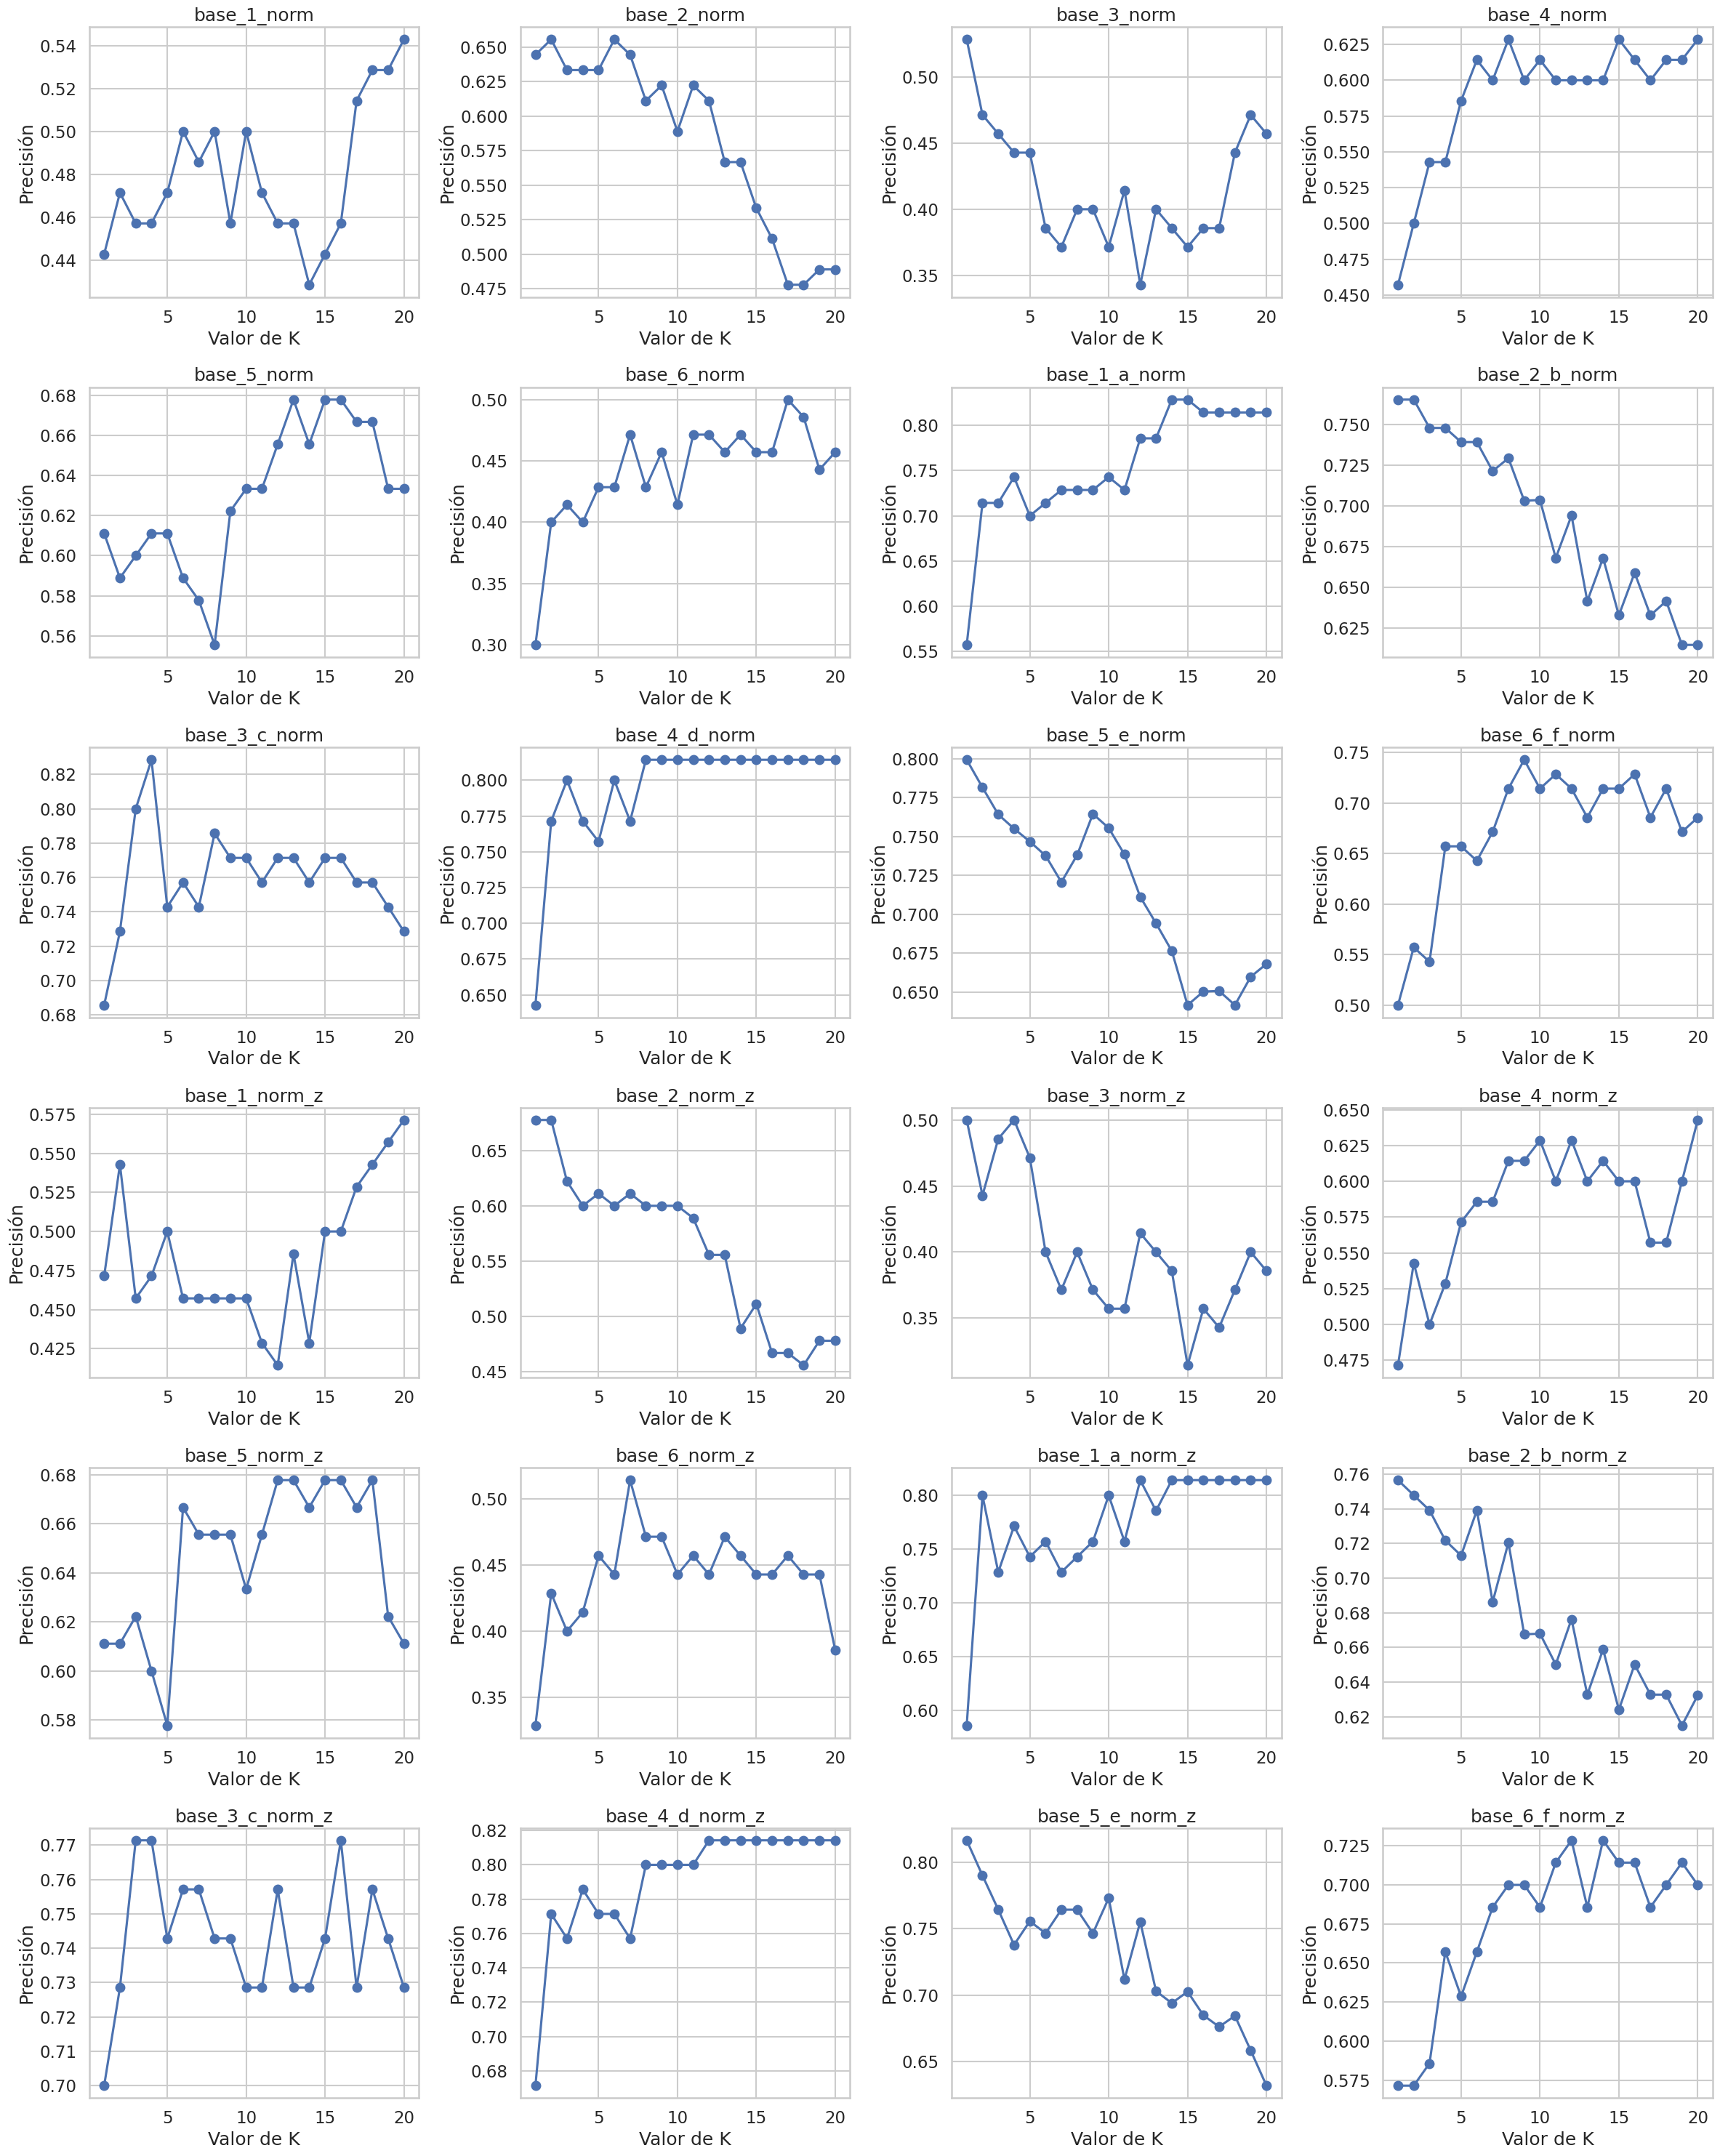

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Lista completa de bases normalizadas (Min-Max y Z-Score)
bases = [
    (base_1_norm, "base_1_norm"), (base_2_norm, "base_2_norm"), (base_3_norm, "base_3_norm"),
    (base_4_norm, "base_4_norm"), (base_5_norm, "base_5_norm"), (base_6_norm, "base_6_norm"),
    (base_1_a_norm, "base_1_a_norm"), (base_2_b_norm, "base_2_b_norm"), (base_3_c_norm, "base_3_c_norm"),
    (base_4_d_norm, "base_4_d_norm"), (base_5_e_norm, "base_5_e_norm"), (base_6_f_norm, "base_6_f_norm"),
    (base_1_norm_z, "base_1_norm_z"), (base_2_norm_z, "base_2_norm_z"), (base_3_norm_z, "base_3_norm_z"),
    (base_4_norm_z, "base_4_norm_z"), (base_5_norm_z, "base_5_norm_z"), (base_6_norm_z, "base_6_norm_z"),
    (base_1_a_norm_z, "base_1_a_norm_z"), (base_2_b_norm_z, "base_2_b_norm_z"), (base_3_c_norm_z, "base_3_c_norm_z"),
    (base_4_d_norm_z, "base_4_d_norm_z"), (base_5_e_norm_z, "base_5_e_norm_z"), (base_6_f_norm_z, "base_6_f_norm_z")
]

# Crear figura con subplots (6 filas x 4 columnas para 24 bases)
fig, axes = plt.subplots(6, 4, figsize=(24, 30))
axes = axes.flatten()

# Evaluar y graficar para cada base
for i, (df, nombre) in enumerate(bases):
    # Asegurar que riesgo_credito sea categórica
    df["riesgo_credito"] = df["riesgo_credito"].astype("category")

    X = df.drop("riesgo_credito", axis=1)
    y = df["riesgo_credito"]
    k_range = range(1, 21)
    k_scores = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
        k_scores.append(scores.mean())

    # Gráfico para cada base
    axes[i].plot(k_range, k_scores, marker='o')
    axes[i].set_title(nombre)
    axes[i].set_xlabel("Valor de K")
    axes[i].set_ylabel("Precisión")
    axes[i].grid(True)

    # Mejor K y su precisión
    best_k = k_range[np.argmax(k_scores)]
    best_score = max(k_scores)
    print(f"{nombre} - Mejor K: {best_k} con precisión promedio: {best_score:.4f}")

# Ajustar diseño
plt.tight_layout()
plt.show()

In [73]:
# Lista de bases con sus respectivos mejores K
bases_knn = [
    (base_1_norm, 20, "base_1_norm"),
    (base_2_norm, 2, "base_2_norm"),
    (base_3_norm, 1, "base_3_norm"),
    (base_4_norm, 20, "base_4_norm"),
    (base_5_norm, 15, "base_5_norm"),
    (base_6_norm, 17, "base_6_norm"),
    (base_1_a_norm, 14, "base_1_a_norm"),
    (base_2_b_norm, 1, "base_2_b_norm"),
    (base_3_c_norm, 4, "base_3_c_norm"),
    (base_4_d_norm, 8, "base_4_d_norm"),
    (base_5_e_norm, 1, "base_5_e_norm"),
    (base_6_f_norm, 9, "base_6_f_norm"),
    (base_1_norm_z, 20, "base_1_norm_z"),
    (base_2_norm_z, 1, "base_2_norm_z"),
    (base_3_norm_z, 1, "base_3_norm_z"),
    (base_4_norm_z, 20, "base_4_norm_z"),
    (base_5_norm_z, 12, "base_5_norm_z"),
    (base_6_norm_z, 7, "base_6_norm_z"),
    (base_1_a_norm_z, 12, "base_1_a_norm_z"),
    (base_2_b_norm_z, 1, "base_2_b_norm_z"),
    (base_3_c_norm_z, 3, "base_3_c_norm_z"),
    (base_4_d_norm_z, 12, "base_4_d_norm_z"),
    (base_5_e_norm_z, 1, "base_5_e_norm_z"),
    (base_6_f_norm_z, 12, "base_6_f_norm_z"),
]

# Aplicar KNN a cada base y mostrar precisión
for base, k, nombre in bases_knn:
    # Dividir características y objetivo
    X = base.drop('riesgo_credito', axis=1)
    y = base['riesgo_credito']

    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar y entrenar modelo
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Predecir y calcular precisión
    y_pred = knn_model.predict(X_test)
    precision = accuracy_score(y_test, y_pred)

    print(f'Precisión del modelo KNN con K={k} en {nombre}: {precision:.4f}')

Precisión del modelo KNN con K=20 en base_1_norm: 0.7143
Precisión del modelo KNN con K=2 en base_2_norm: 0.7778
Precisión del modelo KNN con K=1 en base_3_norm: 0.6429
Precisión del modelo KNN con K=20 en base_4_norm: 0.7143
Precisión del modelo KNN con K=15 en base_5_norm: 0.7778
Precisión del modelo KNN con K=17 en base_6_norm: 0.4286
Precisión del modelo KNN con K=14 en base_1_a_norm: 0.7857
Precisión del modelo KNN con K=1 en base_2_b_norm: 0.9565
Precisión del modelo KNN con K=4 en base_3_c_norm: 0.8571
Precisión del modelo KNN con K=8 en base_4_d_norm: 0.7857
Precisión del modelo KNN con K=1 en base_5_e_norm: 0.8261
Precisión del modelo KNN con K=9 en base_6_f_norm: 0.8571
Precisión del modelo KNN con K=20 en base_1_norm_z: 0.6429
Precisión del modelo KNN con K=1 en base_2_norm_z: 0.7778
Precisión del modelo KNN con K=1 en base_3_norm_z: 0.7143
Precisión del modelo KNN con K=20 en base_4_norm_z: 0.7143
Precisión del modelo KNN con K=12 en base_5_norm_z: 0.5556
Precisión del mode

In [74]:
# Lista de bases para aplicar árbol de decisión
bases_arbol = [
    (base_1_norm, "base_1_norm"),
    (base_2_norm, "base_2_norm"),
    (base_3_norm, "base_3_norm"),
    (base_4_norm, "base_4_norm"),
    (base_5_norm, "base_5_norm"),
    (base_6_norm, "base_6_norm"),
    (base_1_a_norm, "base_1_a_norm"),
    (base_2_b_norm, "base_2_b_norm"),
    (base_3_c_norm, "base_3_c_norm"),
    (base_4_d_norm, "base_4_d_norm"),
    (base_5_e_norm, "base_5_e_norm"),
    (base_6_f_norm, "base_6_f_norm"),
    (base_1_norm_z, "base_1_norm_z"),
    (base_2_norm_z, "base_2_norm_z"),
    (base_3_norm_z, "base_3_norm_z"),
    (base_4_norm_z, "base_4_norm_z"),
    (base_5_norm_z, "base_5_norm_z"),
    (base_6_norm_z, "base_6_norm_z"),
    (base_1_a_norm_z, "base_1_a_norm_z"),
    (base_2_b_norm_z, "base_2_b_norm_z"),
    (base_3_c_norm_z, "base_3_c_norm_z"),
    (base_4_d_norm_z, "base_4_d_norm_z"),
    (base_5_e_norm_z, "base_5_e_norm_z"),
    (base_6_f_norm_z, "base_6_f_norm_z"),
]

# Aplicar árbol de decisión a cada base
for base, nombre in bases_arbol:
    X = base.drop(columns=["riesgo_credito"])
    y = base["riesgo_credito"]

    # División 80/20 con estratificación
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Inicializar y entrenar modelo de árbol
    arbol_modelo = DecisionTreeClassifier(random_state=42)
    arbol_modelo.fit(X_train, y_train)

    # Predicción y evaluación
    y_pred = arbol_modelo.predict(X_test)
    precision = accuracy_score(y_test, y_pred)

    print(f"Precisión del Árbol de Decisión en {nombre}: {precision:.4f}")

Precisión del Árbol de Decisión en base_1_norm: 0.8571
Precisión del Árbol de Decisión en base_2_norm: 0.5556
Precisión del Árbol de Decisión en base_3_norm: 0.7143
Precisión del Árbol de Decisión en base_4_norm: 0.6429
Precisión del Árbol de Decisión en base_5_norm: 0.4444
Precisión del Árbol de Decisión en base_6_norm: 0.3571
Precisión del Árbol de Decisión en base_1_a_norm: 0.7857
Precisión del Árbol de Decisión en base_2_b_norm: 0.8261
Precisión del Árbol de Decisión en base_3_c_norm: 0.6429
Precisión del Árbol de Decisión en base_4_d_norm: 0.7857
Precisión del Árbol de Decisión en base_5_e_norm: 0.7826
Precisión del Árbol de Decisión en base_6_f_norm: 0.3571
Precisión del Árbol de Decisión en base_1_norm_z: 0.8571
Precisión del Árbol de Decisión en base_2_norm_z: 0.5556
Precisión del Árbol de Decisión en base_3_norm_z: 0.7143
Precisión del Árbol de Decisión en base_4_norm_z: 0.6429
Precisión del Árbol de Decisión en base_5_norm_z: 0.4444
Precisión del Árbol de Decisión en base_6_n

In [75]:
# Ignorar warnings
warnings.simplefilter('ignore')

# Lista de bases normalizadas (con y sin Z-score)
bases = [
    ("base_1_norm", base_1_norm),
    ("base_2_norm", base_2_norm),
    ("base_3_norm", base_3_norm),
    ("base_4_norm", base_4_norm),
    ("base_5_norm", base_5_norm),
    ("base_6_norm", base_6_norm),
    ("base_1_a_norm", base_1_a_norm),
    ("base_2_b_norm", base_2_b_norm),
    ("base_3_c_norm", base_3_c_norm),
    ("base_4_d_norm", base_4_d_norm),
    ("base_5_e_norm", base_5_e_norm),
    ("base_6_f_norm", base_6_f_norm),
    ("base_1_norm_z", base_1_norm_z),
    ("base_2_norm_z", base_2_norm_z),
    ("base_3_norm_z", base_3_norm_z),
    ("base_4_norm_z", base_4_norm_z),
    ("base_5_norm_z", base_5_norm_z),
    ("base_6_norm_z", base_6_norm_z),
    ("base_1_a_norm_z", base_1_a_norm_z),
    ("base_2_b_norm_z", base_2_b_norm_z),
    ("base_3_c_norm_z", base_3_c_norm_z),
    ("base_4_d_norm_z", base_4_d_norm_z),
    ("base_5_e_norm_z", base_5_e_norm_z),
    ("base_6_f_norm_z", base_6_f_norm_z),
]

# Aplicar MLPClassifier a cada base normalizada
for nombre, base in bases:
    print(f"Entrenando MLPClassifier con {nombre}...")

    # Separar características y variable objetivo
    X = base.drop(columns=["riesgo_credito"])
    y = base["riesgo_credito"]

    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar y entrenar el modelo MLP
    mlp_model = MLPClassifier(random_state=42, max_iter=1000)
    mlp_model.fit(X_train, y_train)

    # Predecir y calcular precisión
    y_pred = mlp_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Precisión en {nombre}: {accuracy:.4f}\n")

Entrenando MLPClassifier con base_1_norm...
Precisión en base_1_norm: 0.7857

Entrenando MLPClassifier con base_2_norm...
Precisión en base_2_norm: 0.8333

Entrenando MLPClassifier con base_3_norm...
Precisión en base_3_norm: 0.7143

Entrenando MLPClassifier con base_4_norm...
Precisión en base_4_norm: 0.7143

Entrenando MLPClassifier con base_5_norm...
Precisión en base_5_norm: 0.7778

Entrenando MLPClassifier con base_6_norm...
Precisión en base_6_norm: 0.5714

Entrenando MLPClassifier con base_1_a_norm...
Precisión en base_1_a_norm: 0.7857

Entrenando MLPClassifier con base_2_b_norm...
Precisión en base_2_b_norm: 0.9565

Entrenando MLPClassifier con base_3_c_norm...
Precisión en base_3_c_norm: 0.7857

Entrenando MLPClassifier con base_4_d_norm...
Precisión en base_4_d_norm: 0.7143

Entrenando MLPClassifier con base_5_e_norm...
Precisión en base_5_e_norm: 0.7826

Entrenando MLPClassifier con base_6_f_norm...
Precisión en base_6_f_norm: 0.7857

Entrenando MLPClassifier con base_1_norm

In [76]:
# Lista de bases normalizadas con Z-score
bases_z = [
    ("base_2_b_norm", base_2_b_norm),
    ("base_2_b_norm_z", base_2_b_norm_z),
    ("base_5_e_norm_z", base_5_e_norm_z)
]

# Crear una lista para almacenar resultados
resultados = []

# Definir validación cruzada estratificada con condiciones fijas
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Aplicar MLPClassifier con validación cruzada a cada base
for nombre, base in bases_z:
    print(f"Aplicando validación cruzada con {nombre}...")

    X = base.drop(columns=["riesgo_credito"])
    y = base["riesgo_credito"]

    mlp_model = MLPClassifier(random_state=42, max_iter=10000)

    cv_scores = cross_val_score(mlp_model, X, y, cv=cv, scoring='accuracy')

    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)

    resultados.append({
        "Base de Datos": nombre,
        "Precisión Promedio": round(mean_accuracy, 4),
        "Desviación Estándar": round(std_accuracy, 4)
    })

# Convertir resultados a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar la tabla
print(df_resultados)

Aplicando validación cruzada con base_2_b_norm...
Aplicando validación cruzada con base_2_b_norm_z...
Aplicando validación cruzada con base_5_e_norm_z...
     Base de Datos  Precisión Promedio  Desviación Estándar
0    base_2_b_norm              0.9379               0.0462
1  base_2_b_norm_z              0.9198               0.0785
2  base_5_e_norm_z              0.8601               0.0838


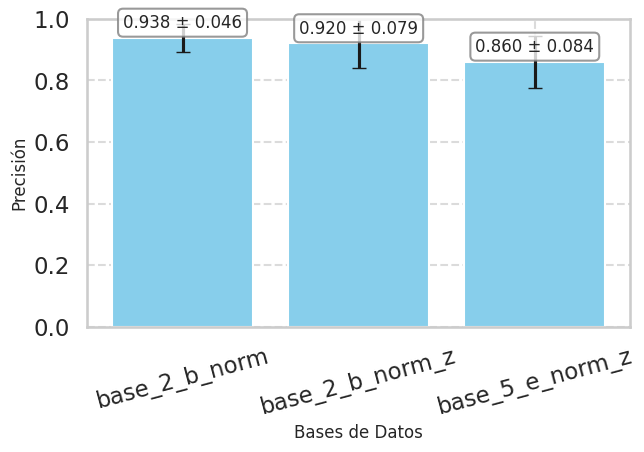

In [77]:
# Gráfico de barras
plt.figure(figsize=(7, 4))
bars = plt.bar(df_resultados["Base de Datos"], df_resultados["Precisión Promedio"],
               yerr=df_resultados["Desviación Estándar"], capsize=5, color='skyblue')

plt.ylabel("Precisión", fontsize=12)
plt.xlabel("Bases de Datos", fontsize=12)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=15)

# Añadir cuadros de texto encima de cada barra
for bar, precision, desviacion in zip(bars, df_resultados["Precisión Promedio"], df_resultados["Desviación Estándar"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,  # Un poco por encima de la barra
        f"{precision:.3f} ± {desviacion:.3f}",
        ha='center', va='bottom',
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8)
    )

plt.show()

In [78]:
# Separar características y variable objetivo
X = base_2_b_norm.drop(columns=["riesgo_credito"])
y = base_2_b_norm["riesgo_credito"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo MLP
mlp_model = MLPClassifier(random_state=42, max_iter=1000)
mlp_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Precisión en el conjunto de prueba: 0.9565

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        11

    accuracy                           0.96        23
   macro avg       0.96      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23

Matriz de confusión:
 [[11  1]
 [ 0 11]]


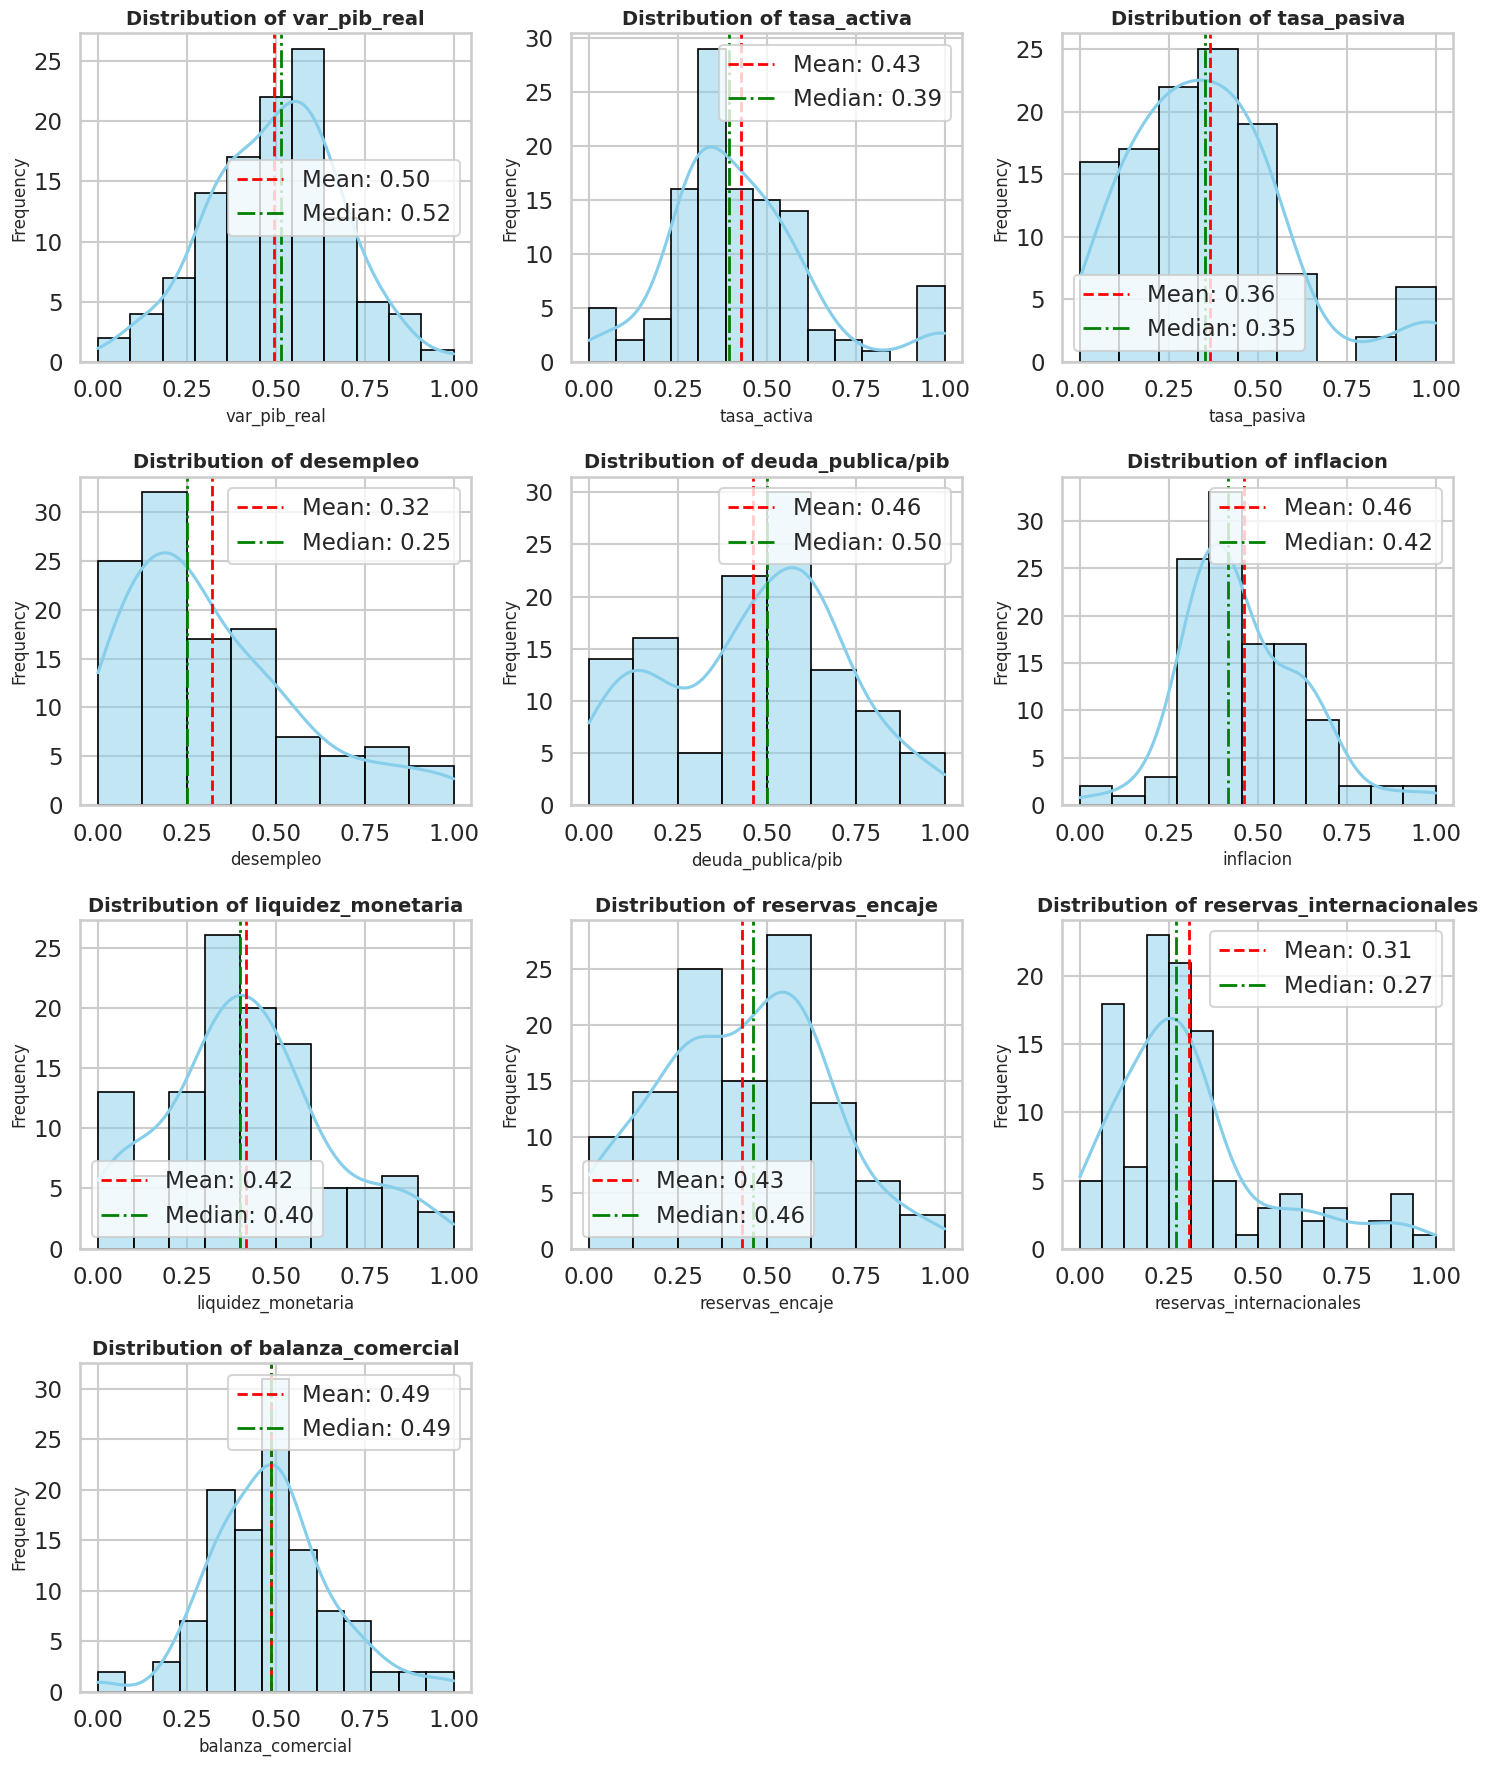

In [79]:
# Estilo más elegante
sns.set_style("whitegrid")
sns.set_context("talk")

# Seleccionar columnas numéricas
numerical_cols = base_2_b_norm.select_dtypes(include=['number']).columns
num_cols = len(numerical_cols)

# Configurar tamaño de la cuadrícula
cols = 3  # columnas por fila
rows = (num_cols + cols - 1) // cols

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4.5 * rows))
axes = axes.flatten()

# Dibujar cada histograma con KDE, media y mediana
for i, col in enumerate(numerical_cols):
    data = base_2_b_norm[col].dropna()
    mean = data.mean()
    median = data.median()

    sns.histplot(data, kde=True, ax=axes[i], color='skyblue', edgecolor='black', linewidth=1.2)

    # Media
    axes[i].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')

    # Mediana
    axes[i].axvline(median, color='green', linestyle='-.', linewidth=2, label=f'Median: {median:.2f}')

    axes[i].set_title(f'Distribution of {col}', fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].legend()

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

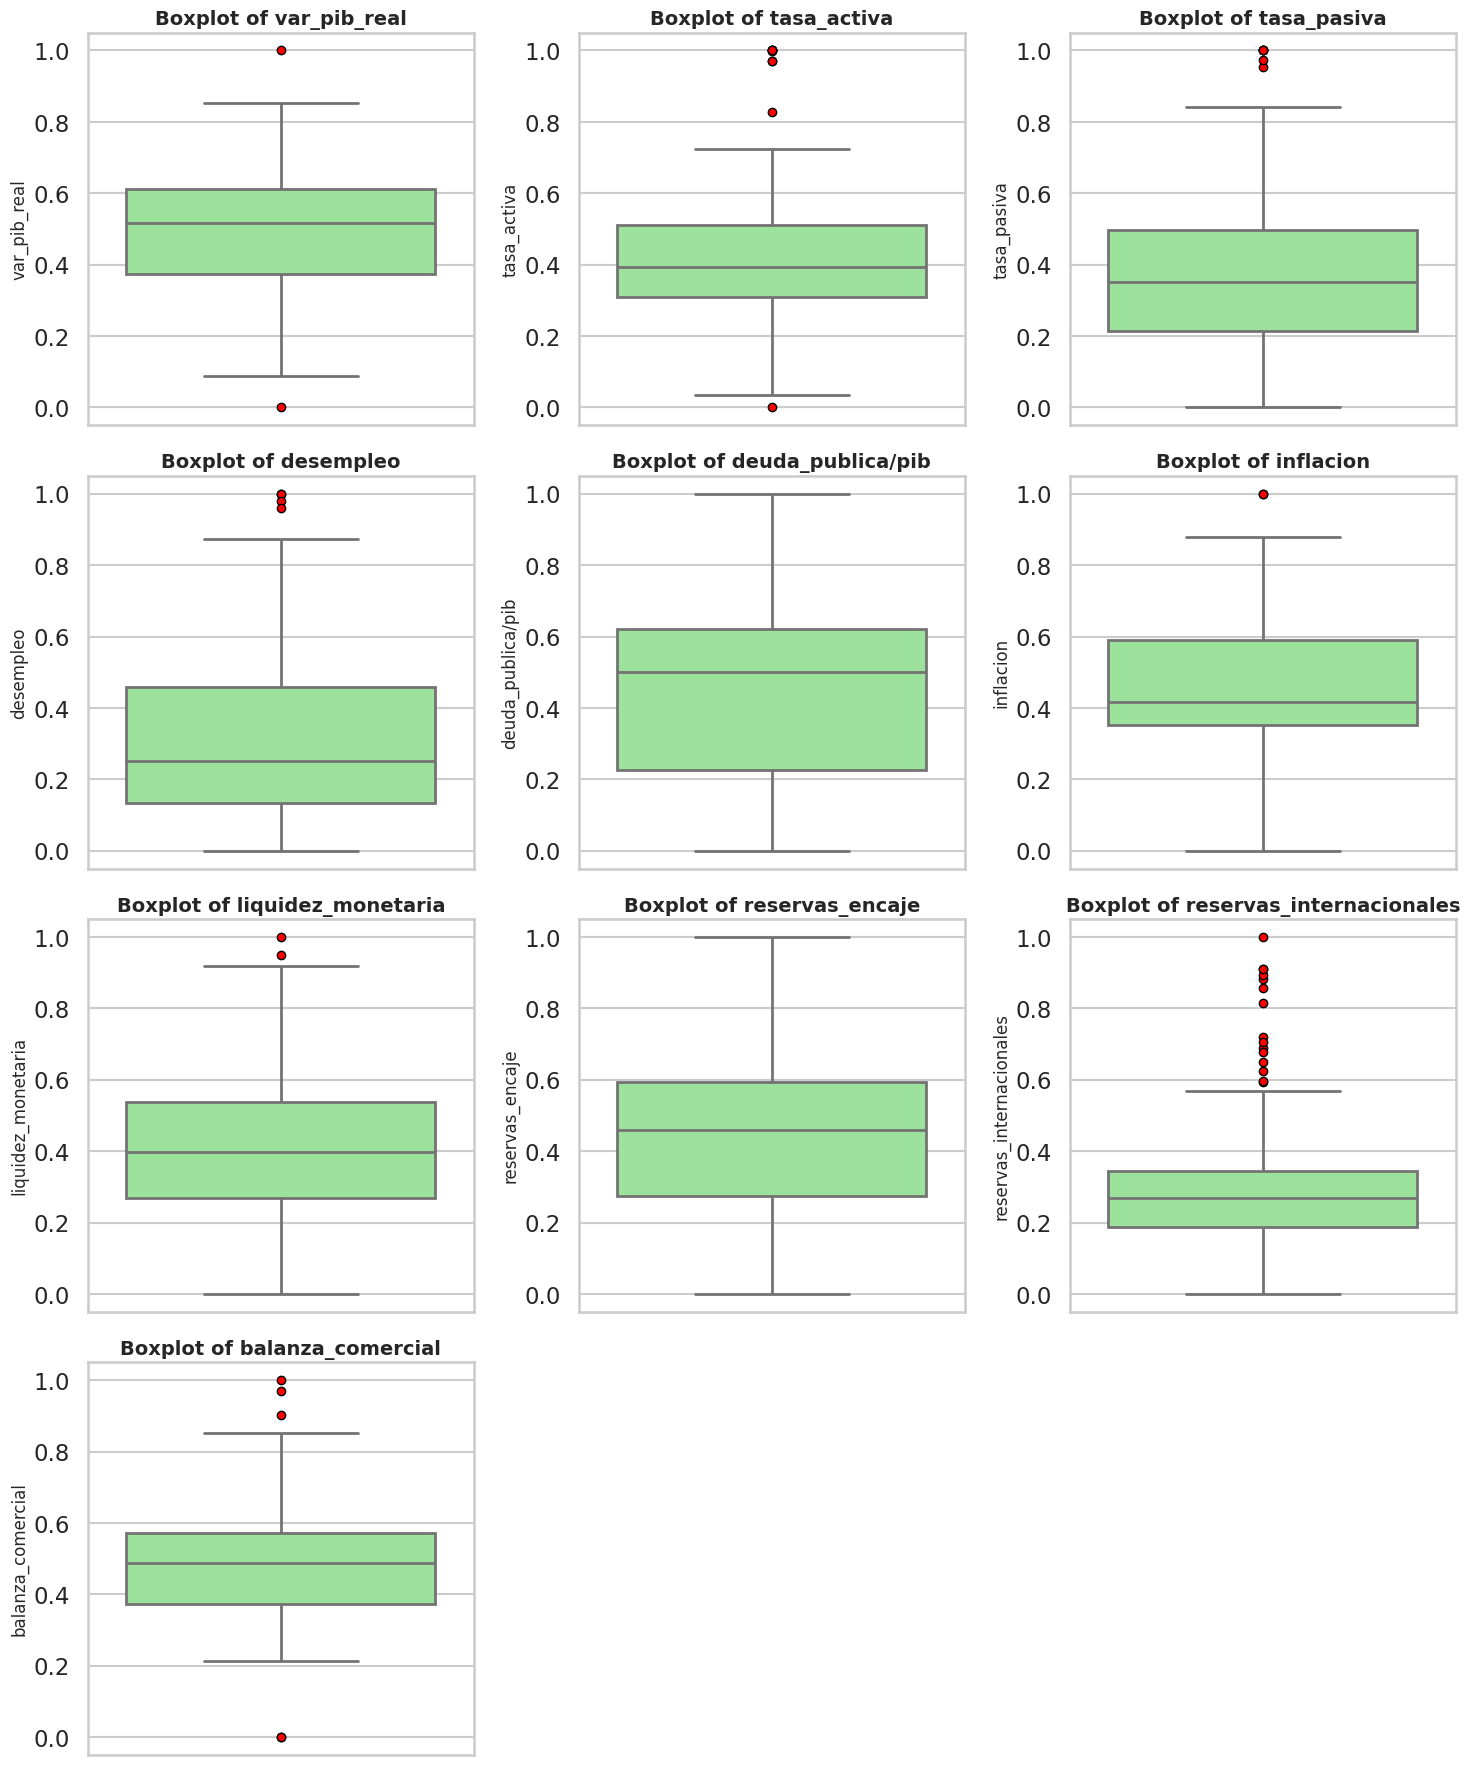

In [80]:
# Estilo elegante
sns.set_style("whitegrid")
sns.set_context("talk")

# Seleccionar columnas numéricas
numerical_cols = base_2_b_norm.select_dtypes(include=['number']).columns
num_cols = len(numerical_cols)

# Configurar tamaño de la cuadrícula
cols = 3  # columnas por fila
rows = (num_cols + cols - 1) // cols

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4.5 * rows))
axes = axes.flatten()

# Dibujar cada boxplot bonito
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        y=base_2_b_norm[col],
        ax=axes[i],
        color='lightgreen',          # Color del boxplot
        flierprops={
            'marker': 'o',            # Tipo de marcador para outliers
            'markerfacecolor': 'red', # Color del marcador (outlier)
            'markeredgecolor': 'black',
            'markersize': 6
        },
        linewidth=2
    )
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, weight='bold')
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xlabel('')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [81]:
# Variables a windsorizar
variables = [
    'var_pib_real',
    'tasa_activa',
    'tasa_pasiva',
    'desempleo',
    'inflacion',
    'liquidez_monetaria',
    'reservas_internacionales',
    'balanza_comercial'
]

# Crear copia del DataFrame para no modificar el original
base_final = base_2_b_norm.copy()

# Aplicar windsorización basada en IQR para cada variable
for col in variables:
    Q1 = base_final[col].quantile(0.25)
    Q3 = base_final[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    base_final[col] = np.clip(base_final[col], lower_bound, upper_bound)

# base_final ahora tiene las variables windsorizadas

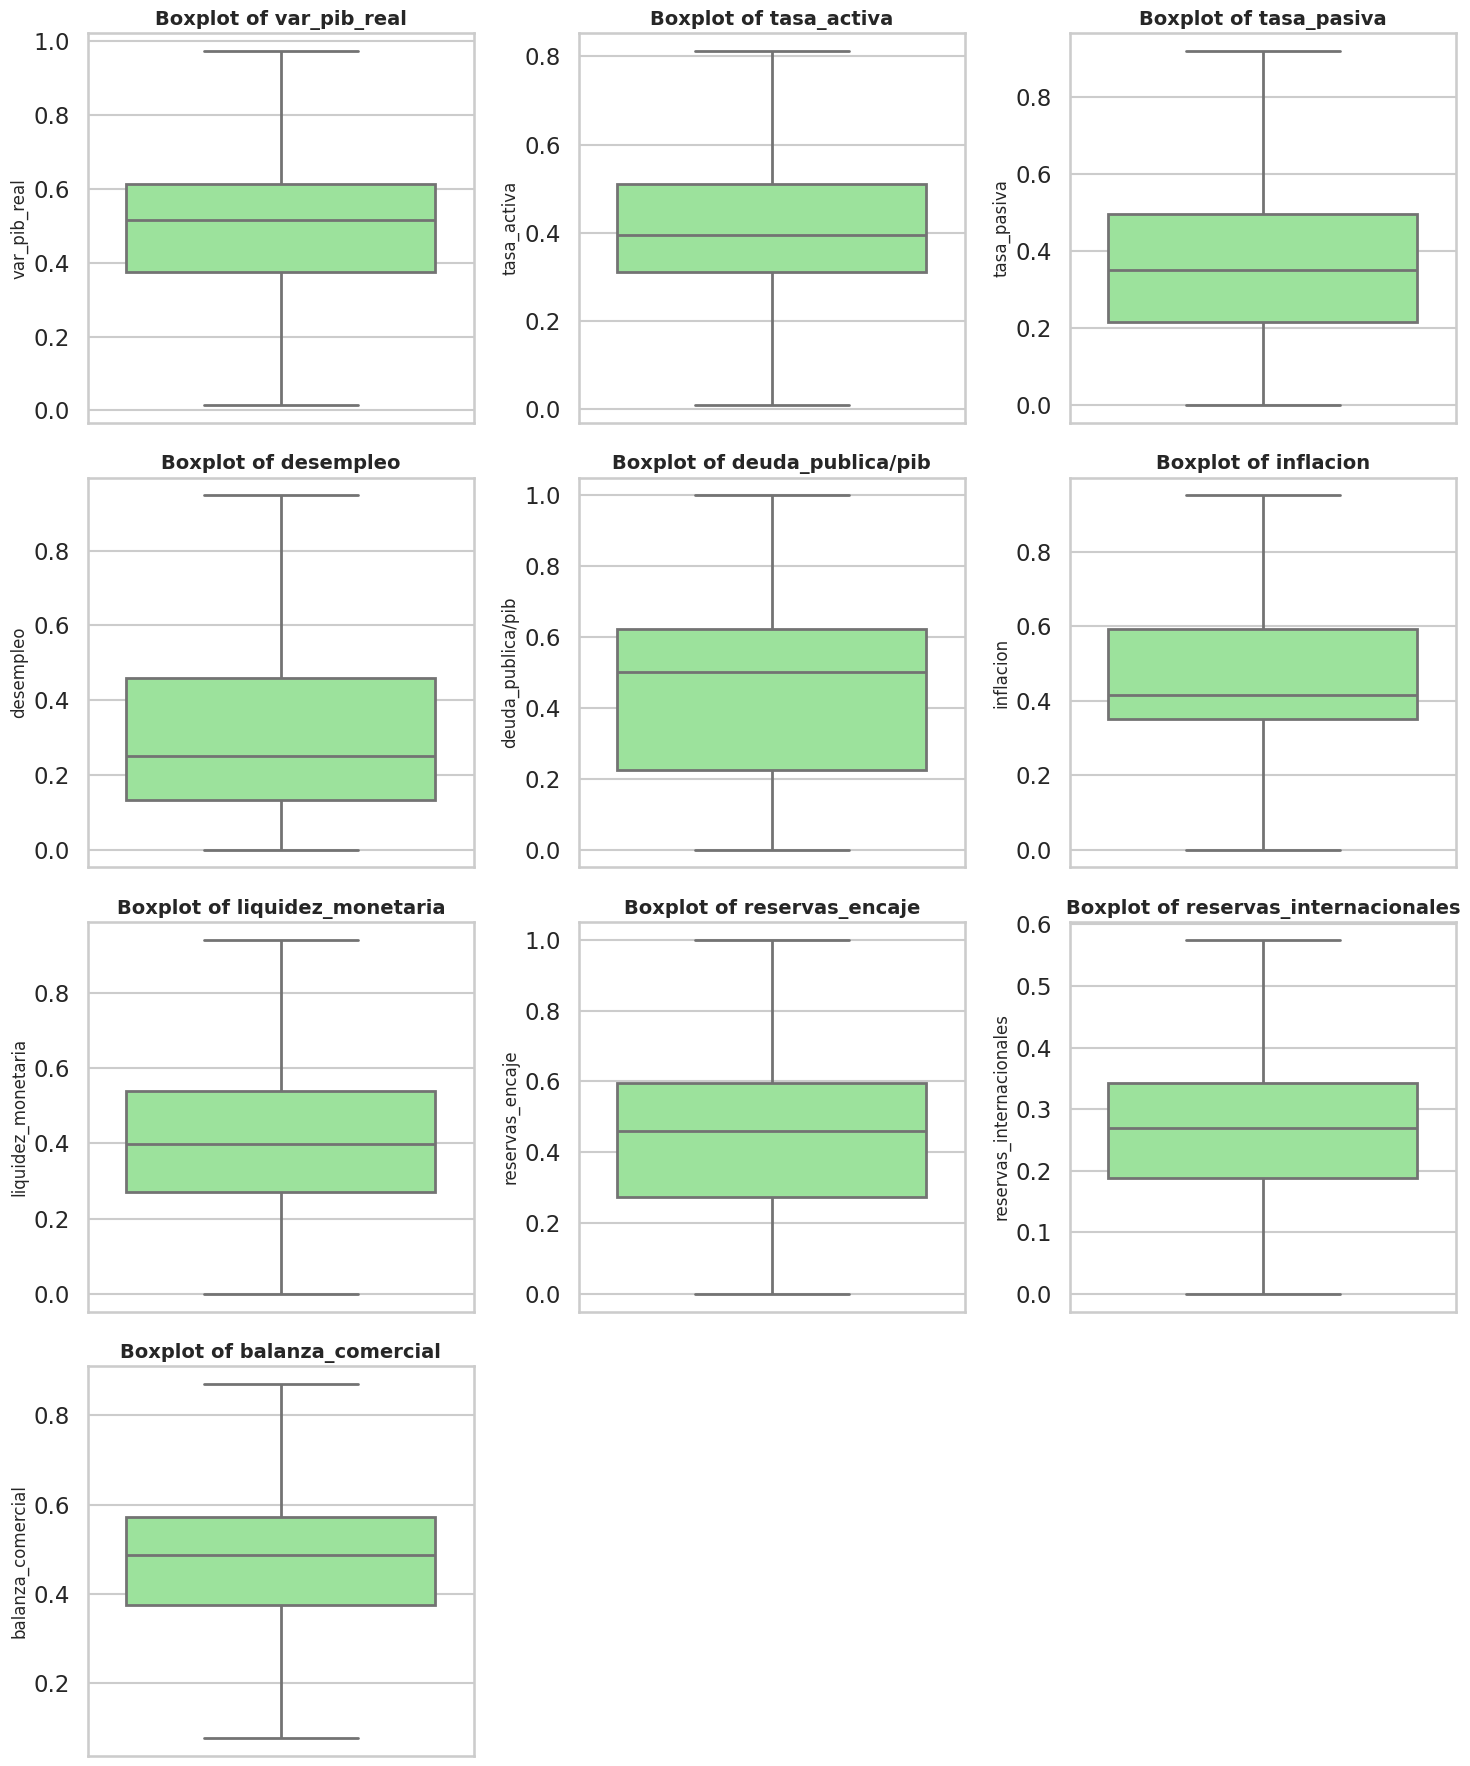

In [82]:
# Estilo elegante
sns.set_style("whitegrid")
sns.set_context("talk")

# Seleccionar columnas numéricas
numerical_cols = base_final.select_dtypes(include=['number']).columns
num_cols = len(numerical_cols)

# Configurar tamaño de la cuadrícula
cols = 3  # columnas por fila
rows = (num_cols + cols - 1) // cols

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4.5 * rows))
axes = axes.flatten()

# Dibujar cada boxplot bonito
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        y=base_final[col],
        ax=axes[i],
        color='lightgreen',          # Color del boxplot
        flierprops={
            'marker': 'o',            # Tipo de marcador para outliers
            'markerfacecolor': 'red', # Color del marcador (outlier)
            'markeredgecolor': 'black',
            'markersize': 6
        },
        linewidth=2
    )
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, weight='bold')
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xlabel('')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [83]:
# Separar características y variable objetivo
X_final = base_final.drop(columns=["riesgo_credito"])
y_final = base_final["riesgo_credito"]

# Dividir en entrenamiento y prueba
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo MLP
mlp_model_final = MLPClassifier(random_state=42, max_iter=1000)
mlp_model_final.fit(X_train_final, y_train_final)

# Predecir y calcular precisión
y_pred_final = mlp_model_final.predict(X_test_final)
accuracy_final = accuracy_score(y_test_final, y_pred_final)

print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Precisión en el conjunto de prueba: 0.9565

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        11

    accuracy                           0.96        23
   macro avg       0.96      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23

Matriz de confusión:
 [[11  1]
 [ 0 11]]


In [84]:
# Lista de bases de datos para validación cruzada
bases_validacion = [
    ("base_2_b_norm", base_2_b_norm),
    ("base_final", base_final)
]

# Crear una lista para almacenar los resultados
resultados_cv = []

# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Aplicar validación cruzada a cada base
for nombre, base in bases_validacion:
    print(f"Aplicando validación cruzada con {nombre}...")

    X_prueba = base.drop(columns=["riesgo_credito"])
    y_prueba = base["riesgo_credito"]

    mlp_model = MLPClassifier(random_state=42, max_iter=10000)

    # Validación cruzada estratificada
    cv_scores = cross_val_score(mlp_model, X_prueba, y_prueba, cv=cv, scoring='accuracy')

    # Calcular precisión promedio y desviación estándar
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)

    resultados_cv.append({
        "Base de Datos": nombre,
        "Precisión Promedio": round(mean_accuracy, 4),
        "Desviación Estándar": round(std_accuracy, 4)
    })

# Convertir resultados a DataFrame
df_resultados_cv = pd.DataFrame(resultados_cv)

# Mostrar la tabla de resultados
print(df_resultados_cv)

Aplicando validación cruzada con base_2_b_norm...
Aplicando validación cruzada con base_final...
   Base de Datos  Precisión Promedio  Desviación Estándar
0  base_2_b_norm              0.9379               0.0462
1     base_final              0.9289               0.0618


El resultado muestra que base_2_b_norm tiene mejor rendimiento en función de la validación cruzada; por lo tanto, nos quedamos con el modelo inicial.

Precisión (Accuracy):   0.9583
Precisión (Precision):  0.9231
Sensibilidad (Recall):  1.0000
Especificidad:         0.9167

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

Matriz de confusión:
 [[11  1]
 [ 0 12]]

 Precisión en entrenamiento: 0.9778
 Precisión en prueba:       0.9583


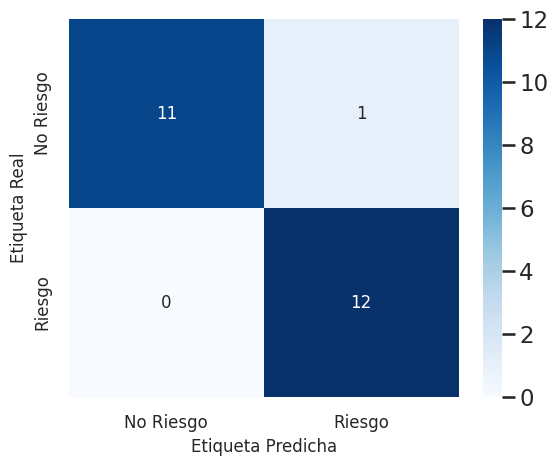

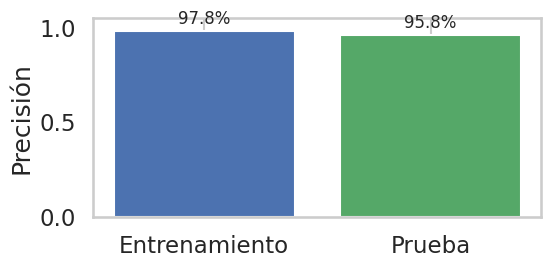

In [85]:
"""Aplicamos nuevamente el modelo seleccionado para canfigurar los valores x, y"""

# Separar características y variable objetivo
X = base_2_b_norm.drop(columns=["riesgo_credito"])
y = base_2_b_norm["riesgo_credito"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

# Inicializar y entrenar el modelo MLP
mlp_model = MLPClassifier(random_state=42, max_iter=1000)
mlp_model.fit(X_train, y_train)

# Predicción
y_pred = mlp_model.predict(X_test)

# Métricas básicas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Sensitivity
conf_mat = confusion_matrix(y_test, y_pred)

# Especificidad = TN / (TN + FP)
tn, fp, fn, tp = conf_mat.ravel()
specificity = tn / (tn + fp)

# Mostrar métricas
print(f"Precisión (Accuracy):   {accuracy:.4f}")
print(f"Precisión (Precision):  {precision:.4f}")
print(f"Sensibilidad (Recall):  {recall:.4f}")
print(f"Especificidad:         {specificity:.4f}")

print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", conf_mat)

# Evaluación de overfitting: precisión en entrenamiento vs prueba
train_acc = mlp_model.score(X_train, y_train)
test_acc = mlp_model.score(X_test, y_test)
print(f"\n Precisión en entrenamiento: {train_acc:.4f}")
print(f" Precisión en prueba:       {test_acc:.4f}")

# Graficar matriz de confusión elegante
plt.figure(figsize=(6, 5))

# Crear el heatmap con etiquetas de tamaño 12
ax = sns.heatmap(
    conf_mat,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Riesgo", "Riesgo"],
    yticklabels=["No Riesgo", "Riesgo"],
    annot_kws={"fontsize": 12}  # Tamaño del texto dentro del heatmap
)

# Etiquetas de ejes con tamaño 12
ax.set_xlabel("Etiqueta Predicha", fontsize=12)
ax.set_ylabel("Etiqueta Real", fontsize=12)

# Ticks con tamaño 12
ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

# Evaluación gráfica del overfitting
plt.figure(figsize=(6, 3))
plt.bar(['Entrenamiento', 'Prueba'], [train_acc, test_acc], color=['#4c72b0', '#55a868'])
plt.ylim(0.0, 1.05)
plt.ylabel("Precisión")
for i, acc in enumerate([train_acc, test_acc]):
    plt.text(i, acc + 0.02, f"{acc*100:.1f}%", ha='center', va='bottom', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [86]:
import numpy as np

# Extraer pesos y sesgos
W1 = mlp_model.coefs_[0]      # (n_features, 100)
b1 = mlp_model.intercepts_[0] # (100,)
W2 = mlp_model.coefs_[1]      # (100, 1)
b2 = mlp_model.intercepts_[1] # (1,)

# Seleccionar una muestra (primera fila del test set)
x = X_test.iloc[0].values.reshape(1, -1)  # (1, n_features)
print("Vector de entrada (X[0]):\n", x)

# Forward pass manual
# Capa oculta: h = ReLU(x @ W1 + b1)
z1 = np.dot(x, W1) + b1
h = np.maximum(0, z1)

# Capa de salida: y_hat = sigmoid(h @ W2 + b2)
z2 = np.dot(h, W2) + b2
y_hat = 1 / (1 + np.exp(-z2))

print("\nResultado de activación oculta (h):\n", h)
print("\nValor bruto de salida (z2):", z2[0][0])
print(f"\nProbabilidad estimada (sigmoide): {y_hat[0][0]:.4f}")
print(f"Clase predicha: {int(y_hat[0][0] > 0.5)}")

Vector de entrada (X[0]):
 [[0.32715994 0.30964557 0.22840305 0.20747892 0.58640864 0.29037271
  0.45389142 0.50950671 0.11037117 0.39619474]]

Resultado de activación oculta (h):
 [[0.         0.         0.         0.23431795 0.28754813 0.48898958
  0.         0.22442651 0.         0.         0.         0.33103981
  0.4730813  0.         0.7785209  0.88568791 0.         0.40607286
  0.2582718  0.41031734 0.42226005 0.         0.         0.46648912
  0.426189   0.         0.         0.26840152 0.         0.
  0.         0.07947634 0.3399636  0.         0.         0.21220076
  0.         0.97036819 0.         0.         0.         0.12770087
  0.         0.11206154 0.         0.64445872 0.         0.
  0.46166895 0.         0.4950441  0.3383223  0.49052409 0.31843976
  0.54058881 0.11362483 0.43739827 0.         0.         0.
  0.         0.27642074 0.13220092 0.         0.         0.26092912
  0.         0.21887366 0.         0.3711872  0.         0.51930198
  0.         0.28316591 0.5

In [87]:
# Supongamos que usaste:
X = base_2_b_norm.drop(columns=["riesgo_credito"])

# Esto te da los nombres de las variables en orden:
variables = X.columns.tolist()

# Mostrar variables con su índice
for idx, nombre in enumerate(variables):
    print(f"{idx}: {nombre}")

0: var_pib_real
1: tasa_activa
2: tasa_pasiva
3: desempleo
4: deuda_publica/pib
5: inflacion
6: liquidez_monetaria
7: reservas_encaje
8: reservas_internacionales
9: balanza_comercial


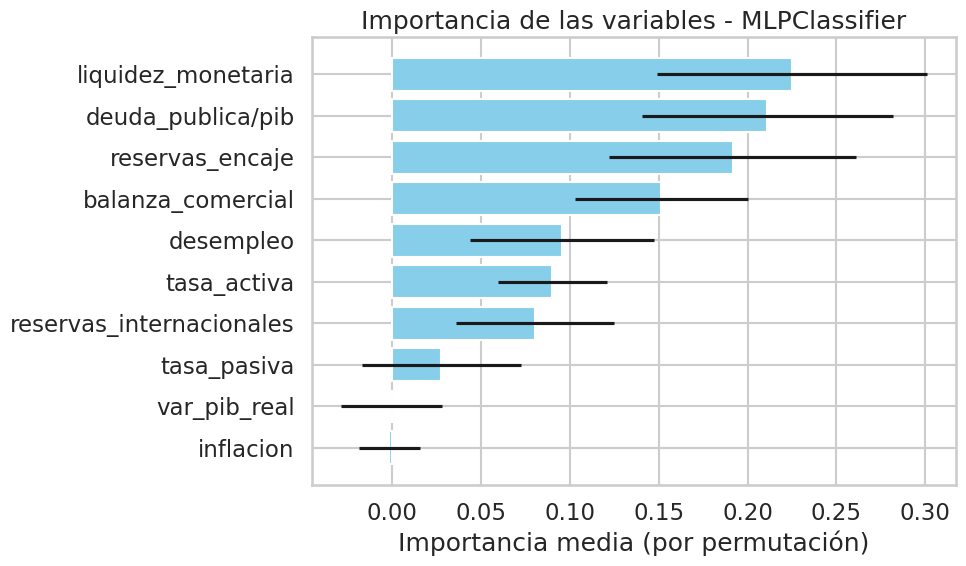

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

# Calculamos la importancia por permutación
result = permutation_importance(mlp_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Obtenemos las medias y desviaciones estándar
importances = result.importances_mean
std = result.importances_std

# Creamos un DataFrame con los resultados
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances, 'Std': std})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficamos
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std'], color='skyblue')
plt.xlabel("Importancia media (por permutación)")
plt.title("Importancia de las variables - MLPClassifier")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Precisión media: 0.9379 ± 0.0462


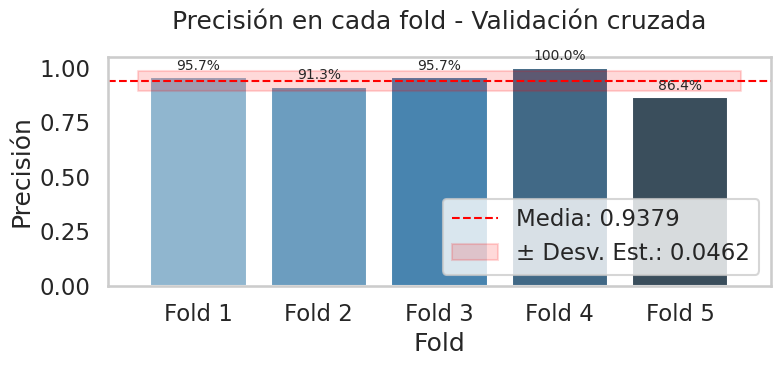

In [89]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

# Separar características y variable objetivo
X = base_2_b_norm.drop(columns=["riesgo_credito"])
y = base_2_b_norm["riesgo_credito"]

# Inicializar modelo
mlp_model = MLPClassifier(random_state=42, max_iter=10000)

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp_model, X, y.astype(int), cv=cv, scoring='accuracy')

# Resultados de media y desviación estándar
mean_score = cv_scores.mean()
std_score = cv_scores.std()

print(f"Precisión media: {mean_score:.4f} ± {std_score:.4f}")

# Gráfico de barras con promedio y desviación estándar
plt.figure(figsize=(8, 4))
bars = sns.barplot(x=[f"Fold {i+1}" for i in range(len(cv_scores))], y=cv_scores, palette="Blues_d")
plt.ylim(0.0, 1.05)
plt.title("Precisión en cada fold - Validación cruzada", pad=20)
plt.ylabel("Precisión")
plt.xlabel("Fold")
plt.grid(axis='y')

# Etiquetas de porcentaje en cada barra
for i, score in enumerate(cv_scores):
    plt.text(i, score + 0.02, f"{score * 100:.1f}%", ha='center', va='bottom', fontsize=10)

# Línea horizontal del promedio
plt.axhline(mean_score, color='red', linestyle='--', linewidth=1.5, label=f"Media: {mean_score:.4f}")
plt.fill_between([-0.5, len(cv_scores)-0.5],
                 mean_score - std_score,
                 mean_score + std_score,
                 color='red',
                 alpha=0.15,
                 label=f"± Desv. Est.: {std_score:.4f}")

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits

Mejores parámetros encontrados (validación cruzada):
{'activation': 'relu', 'alpha': np.float64(8.445996510213929e-05), 'batch_size': 64, 'early_stopping': True, 'hidden_layer_sizes': (16, 16, 16, 16, 16), 'learning_rate': 'invscaling', 'learning_rate_init': np.float64(0.0019388659342762073), 'max_fun': 10778, 'max_iter': 993, 'momentum': np.float64(0.971139218767508), 'n_iter_no_change': 19, 'nesterovs_momentum': True, 'power_t': np.float64(0.3254563637146569), 'shuffle': False, 'solver': 'lbfgs', 'tol': np.float64(0.00015774551357145903), 'validation_fraction': np.float64(0.14597319882382676), 'verbose': False, 'warm_start': False}
Mejor precisión media (validación cruzada): 0.9444

Evaluación del mejor modelo en el conjunto de prueba:
Precisión en el conjunto de prueba: 0.9167

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
       

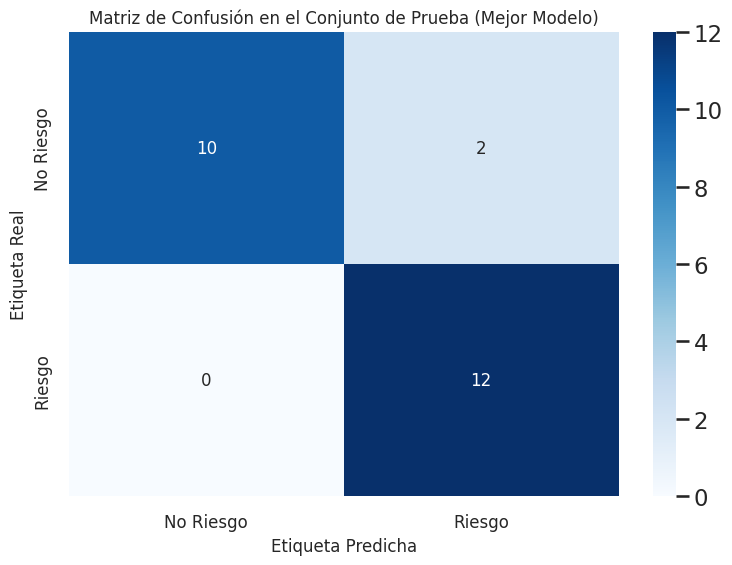

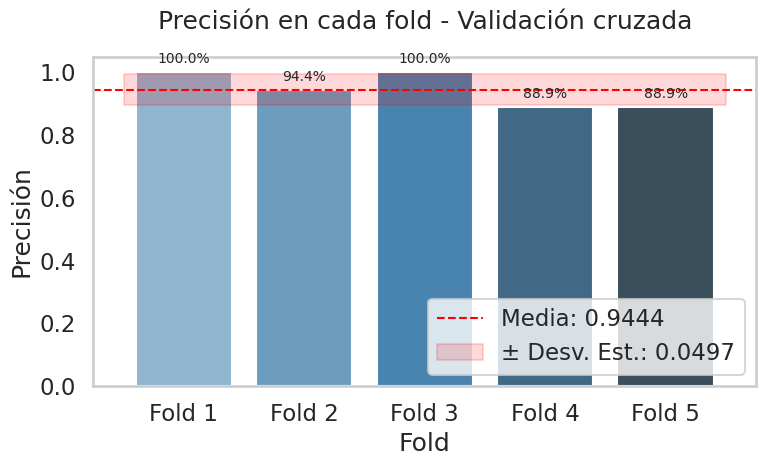


Precisión en entrenamiento: 1.0000
Precisión en prueba:       0.9167


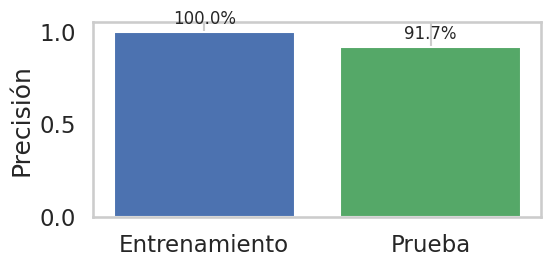

In [90]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform, loguniform, randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Separar características y variable objetivo
X = base_2_b_norm.drop(columns=["riesgo_credito"])
y = base_2_b_norm["riesgo_credito"]

# División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.21, random_state=42, stratify=y
)

# Crear combinaciones de hidden_layer_sizes
hidden_layer_sizes = []
for n_layers in range(1, 6):
    for n_neurons in [16, 32, 64, 128]:
        hidden_layer_sizes.append(tuple([n_neurons] * n_layers))

# Espacio de búsqueda
param_dist = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': loguniform(1e-5, 1.0),
    'batch_size': ['auto', 32, 64, 128],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': loguniform(1e-4, 0.1),
    'power_t': uniform(0.3, 0.4),
    'max_iter': randint(500, 2001),
    'shuffle': [True, False],
    'tol': loguniform(1e-5, 1e-3),
    'verbose': [False],
    'warm_start': [False, True],
    'momentum': uniform(0.8, 0.2),
    'nesterovs_momentum': [True, False],
    'early_stopping': [False, True],
    'validation_fraction': uniform(0.1, 0.4),
    'n_iter_no_change': randint(5, 21),
    'max_fun': randint(10000, 25001)
}

# Configuración de la búsqueda
n_iter_search = 200
cv_folds = 5

random_search = RandomizedSearchCV(
    MLPClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=n_iter_search,
    cv=StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42),
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

# Ejecutar búsqueda
random_search.fit(X_train, y_train)

# Mejor modelo y resultados
best_params = random_search.best_params_
best_score_cv = random_search.best_score_

print(f"\nMejores parámetros encontrados (validación cruzada):\n{best_params}")
print(f"Mejor precisión media (validación cruzada): {best_score_cv:.4f}")

# Entrenar el mejor modelo
best_mlp = MLPClassifier(**best_params, random_state=42)
best_mlp.fit(X_train, y_train)

# Evaluación en test
y_pred_test = best_mlp.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
matrix_test = confusion_matrix(y_test, y_pred_test)

print("\nEvaluación del mejor modelo en el conjunto de prueba:")
print(f"Precisión en el conjunto de prueba: {accuracy_test:.4f}")
print("\nReporte de clasificación:\n", report_test)
print("Matriz de confusión:\n", matrix_test)

# === GRÁFICA 1: Matriz de confusión ===
plt.figure(figsize=(8, 6))

# Crear el heatmap
ax = sns.heatmap(
    matrix_test,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["No Riesgo", "Riesgo"],
    yticklabels=["No Riesgo", "Riesgo"],
    annot_kws={"fontsize": 12}  # Tamaño de los números en las celdas
)

# Títulos y etiquetas con fuente 12
ax.set_title('Matriz de Confusión en el Conjunto de Prueba (Mejor Modelo)', fontsize=12)
ax.set_xlabel('Etiqueta Predicha', fontsize=12)
ax.set_ylabel('Etiqueta Real', fontsize=12)

# Ticks de eje con fuente 12
ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

# === GRÁFICA 2: Precisión en cada fold ===
cv_scores = random_search.cv_results_['mean_test_score'][
    random_search.cv_results_['rank_test_score'] == 1
]  # Se toma solo el mejor rank

# También podemos mostrar todas las puntuaciones individuales por fold
split_scores = [random_search.cv_results_[f'split{i}_test_score'][random_search.best_index_]
                for i in range(cv_folds)]

mean_score = np.mean(split_scores)
std_score = np.std(split_scores)

plt.figure(figsize=(8, 5))
bars = sns.barplot(x=[f"Fold {i+1}" for i in range(cv_folds)], y=split_scores, palette="Blues_d")
plt.ylim(0.0, 1.05)
plt.title("Precisión en cada fold - Validación cruzada", pad=20)
plt.ylabel("Precisión")
plt.xlabel("Fold")
plt.grid(axis='y')

# Etiquetas numéricas
for i, score in enumerate(split_scores):
    plt.text(i, score + 0.02, f"{score * 100:.1f}%", ha='center', va='bottom', fontsize=10)

# Línea horizontal de la media
plt.axhline(mean_score, color='red', linestyle='--', linewidth=1.5, label=f"Media: {mean_score:.4f}")
plt.fill_between([-0.5, len(split_scores)-0.5],
                 mean_score - std_score,
                 mean_score + std_score,
                 color='red',
                 alpha=0.15,
                 label=f"± Desv. Est.: {std_score:.4f}")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# === EVALUACIÓN DE OVERFITTING ===
train_acc = best_mlp.score(X_train, y_train)
test_acc = best_mlp.score(X_test, y_test)

print(f"\nPrecisión en entrenamiento: {train_acc:.4f}")
print(f"Precisión en prueba:       {test_acc:.4f}")

# Evaluación gráfica del overfitting
plt.figure(figsize=(6, 3))
plt.bar(['Entrenamiento', 'Prueba'], [train_acc, test_acc], color=['#4c72b0', '#55a868'])
plt.ylim(0.0, 1.05)
plt.ylabel("Precisión")
for i, acc in enumerate([train_acc, test_acc]):
    plt.text(i, acc + 0.02, f"{acc*100:.1f}%", ha='center', va='bottom', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Precisión (Accuracy):   0.9583
Precisión (Precision):  0.9231
Sensibilidad (Recall):  1.0000
Especificidad:         0.9167

 Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

 Matriz de confusión:
 [[11  1]
 [ 0 12]]

 Precisión en entrenamiento: 0.9778
 Precisión en prueba:       0.9583


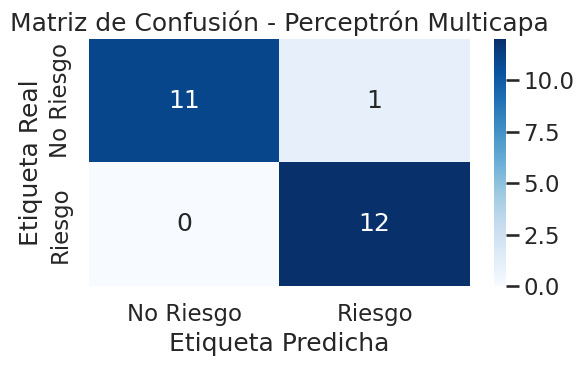

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Separar características y variable objetivo
X = base_2_b_norm.drop(columns=["riesgo_credito"])
y = base_2_b_norm["riesgo_credito"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

# Inicializar y entrenar el modelo MLP
mlp_model = MLPClassifier(random_state=42, max_iter=1000)
mlp_model.fit(X_train, y_train)

# Predicción
y_pred = mlp_model.predict(X_test)

# Métricas básicas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Sensitivity
conf_mat = confusion_matrix(y_test, y_pred)

# Especificidad = TN / (TN + FP)
tn, fp, fn, tp = conf_mat.ravel()
specificity = tn / (tn + fp)

# Mostrar métricas
print(f"Precisión (Accuracy):   {accuracy:.4f}")
print(f"Precisión (Precision):  {precision:.4f}")
print(f"Sensibilidad (Recall):  {recall:.4f}")
print(f"Especificidad:         {specificity:.4f}")

print("\n Reporte de clasificación:\n", classification_report(y_test, y_pred))
print(" Matriz de confusión:\n", conf_mat)

# Evaluación de overfitting: precisión en entrenamiento vs prueba
train_acc = mlp_model.score(X_train, y_train)
test_acc = mlp_model.score(X_test, y_test)
print(f"\n Precisión en entrenamiento: {train_acc:.4f}")
print(f" Precisión en prueba:       {test_acc:.4f}")

# Graficar matriz de confusión elegante
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Riesgo", "Riesgo"],
            yticklabels=["No Riesgo", "Riesgo"])
plt.title("Matriz de Confusión - Perceptrón Multicapa")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()